We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [124]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-07-02 19:59:38--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.222.81, 13.227.222.127, 13.227.222.75, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.222.81|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [125]:
import pandas as pd
import numpy  as np

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [126]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-07-02    2      7  2020    319      28             Afghanistan    AF   
1 2020-07-01    1      7  2020    279      13             Afghanistan    AF   
2 2020-06-30   30      6  2020    271      12             Afghanistan    AF   
3 2020-06-29   29      6  2020    351      18             Afghanistan    AF   
4 2020-06-28   28      6  2020    165      20             Afghanistan    AF   
5 2020-06-27   27      6  2020    276       8             Afghanistan    AF   
6 2020-06-26   26      6  2020    460      36             Afghanistan    AF   
7 2020-06-25   25      6  2020    234      21             Afghanistan    AF   
8 2020-06-24   24      6  2020    338      20             Afghanistan    AF   
9 2020-06-23   23      6  2020    310      17             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  
0                  AFG   38041757.0         Asia  
1                  AFG   38041757.0         Asia  
2                  AFG   38041757.0         Asia  
3                  AFG   38041757.0         Asia  
4                  AFG   38041757.0         Asia  
5                  AFG   38041757.0         Asia  
6                  AFG   38041757.0         Asia  
7                  AFG   38041757.0         Asia  
8                  AFG   38041757.0         Asia  
9                  AFG   38041757.0         Asia

Last check of our source dataframe.

In [127]:
df.count()

dateRep                    27191
day                        27191
month                      27191
year                       27191
cases                      27191
deaths                     27191
countriesAndTerritories    27191
geoId                      27191
countryterritoryCode       27127
popData2019                27127
continentExp               27191
dtype: int64

We pivot to a country by column format.

In [128]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                            \
geoId         AD     AE     AF   AG   AI    AL     AM    AO      AR     AT   
dateRep                                                                      
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN    0.0   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN    0.0   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN    0.0   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN    0.0   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN    0.0   
...          ...    ...    ...  ...  ...   ...    ...   ...     ...    ...   
2020-06-28   0.0  387.0  165.0  0.0  0.0  61.0  736.0  32.0  5287.0   64.0   
2020-06-29   0.0  437.0  351.0  0.0  0.0  72.0  482.0  23.0     0.0   63.0   
2020-06-30   0.0  449.0  271.0  1.0  0.0  64.0    0.0   9.0  4524.0   41.0   
2020-07-01   0.0  421.0  279.0  0.0  0.0  69.0  415.0   8.0  2262.0  111.0   
2020-07-02   0.0  402.0  319.0  0.0  0.0  45.0  523.0   7.0  2667.0   37.0   

            ... deaths                                                 
geoId       ...     VC   VE   VG   VI   VN   XK   YE     ZA   ZM   ZW  
dateRep     ...                                                        
2019-12-31  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-01  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-02  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-03  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-04  ...    NaN  NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
...         ...    ...  ...  ...  ...  ...  ...  ...    ...  ...  ...  
2020-06-28  ...    0.0  1.0  0.0  0.0  0.0  4.0  3.0   73.0  0.0  0.0  
2020-06-29  ...    0.0  2.0  0.0  0.0  0.0  1.0  6.0   43.0  1.0  0.0  
2020-06-30  ...    0.0  4.0  0.0  0.0  0.0  0.0  2.0   73.0  0.0  1.0  
2020-07-01  ...    0.0  3.0  0.0  0.0  0.0  2.0  8.0  128.0  2.0  0.0  
2020-07-02  ...    0.0  3.0  0.0  0.0  0.0  3.0  6.0   92.0  6.0  0.0  

[185 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [129]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-06-28   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-29   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-30   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-07-01   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-07-02   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-06-28 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-29 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-30 NaN  NaN NaN NaN NaN NaN NaN  
2021-07-01 NaN  NaN NaN NaN NaN NaN NaN  
2021-07-02 NaN  NaN NaN NaN NaN NaN NaN  

[550 rows x 420 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [130]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    550.000000
mean     274.500000
std      158.915596
min        0.000000
25%      137.250000
50%      274.500000
75%      411.750000
max      549.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [131]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [132]:
country  = 'NL'
measure  = 'cases'
smeasure = 'scases'
rmeasure = 'rcases'
pmeasure = 'pcases'

p1measure = 'p1cases'
p2measure = 'p2cases'
p3measure = 'p3cases'
p4measure = 'p4cases'
p5measure = 'p5cases'

df_geo[(p1measure, country)] = 0
df_geo[(p2measure, country)] = 0
df_geo[(p3measure, country)] = 0
df_geo[(p4measure, country)] = 0
df_geo[(p5measure, country)] = 0

df_geo[(smeasure, country)] = df_geo[measure][country].loc[:].rolling(7).mean()
df_geo[(rmeasure, country)] = df_geo[smeasure][country]

To ignore early outbreaks and long tails, we define the minimum case count as one in million.

In [133]:
popdata = df[df['geoId'] == country]['popData2019'].iloc[0]
mincases = popdata / 1e6
print('Minimum number of cases is {:1.0f}'.format(mincases))

Minimum number of cases is 17


__Iterate here, substract the previous wave and repeat.__

In [134]:
df_geo[(rmeasure, country)] = (df_geo[(rmeasure, country)] - df_geo[(p1measure, country)])

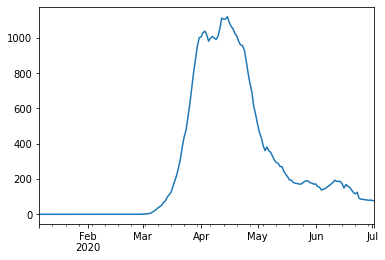

In [135]:
df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                        measure:df_geo[rmeasure][country]})
df_pred[df_pred[measure].notnull()][measure].plot()

The `cumul`column gets the cumulative cases. Using these, we divide the current by the cumulative cases. According to Gumbel this should have a logarithmic form, so using a logarithmic scale it should approach linearity.

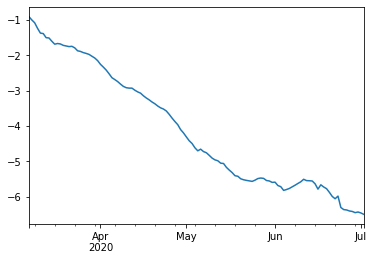

In [136]:
df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].loc[:].cumsum()
np.log(df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]['gumdiv']).plot()

To prevent errors we only use values above 0 and take the logarithm. Then we cut off the range to remove noise at the beginning and end of the curve and filter out days with number of cases below the minimum.

In [137]:
from scipy.stats import linregress

def fitres(bounds):
    """Try to fit a line according to interval, returning error of fit"""
    global df_pred
    
    lower = bounds[0]
    upper = bounds[0] + bounds[1]
    
    df_fit = df_pred[(df_pred['daynum'] >= lower) &
                     (df_pred['daynum'] <= upper) &
                     (df_pred[measure] > mincases)]
    
    days = len(df_fit)
    
    # Only try fitting if we have at least 5 days left.
    if days > 4:
        slope, intercept, rvalue, pvalue, stderr = linregress(df_fit[['daynum', 'linear']])
        rsquared = rvalue ** 2
        error = 1 - rsquared * days / len(df_pred)
        print('From {:6.3f} to {:6.3f} rsquared {:5.3f} interval {:5.3f} error {:5.3f} for {:3.0f} days'.format(
            lower, upper, rsquared, bounds[1], error, days))
        return(error)
    else:
        return np.nan

In [138]:
from scipy.optimize import differential_evolution

df_pred = df_pred[df_pred['gumdiv'] > 0]
df_pred['linear'] = np.log(df_pred['gumdiv'])

daymin = df_pred['daynum'].min()
daymax = df_pred['daynum'].max()
days = daymax - daymin

#optim = basinhopping(fitres, [[daymin, daymax], [0, days]])
optim = differential_evolution(fitres, [(daymin, daymax), (0, days)], strategy='best1bin', workers=-1)
print(optim)

/home/zwieteri/.local/lib/python3.8/site-packages/scipy/optimize/_differentialevolution.py:492: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  warnings.warn("differential_evolution: the 'workers' keyword has"


From 89.751 to 189.769 rsquared 0.927 interval 100.018 error 0.301 for  95 days
From 113.613 to 152.039 rsquared 0.924 interval 38.426 error 0.714 for  39 days
From 87.114 to 167.950 rsquared 0.935 interval 80.835 error 0.406 for  80 days
From 157.287 to 251.655 rsquared 0.825 interval 94.369 error 0.823 for  27 days
From 79.542 to 170.899 rsquared 0.944 interval 91.358 error 0.318 for  91 days
From 73.034 to 105.384 rsquared 0.960 interval 32.350 error 0.756 for  32 days
From 138.481 to 148.721 rsquared 0.226 interval 10.240 error 0.982 for  10 days
From 169.891 to 221.425 rsquared 0.883 interval 51.534 error 0.895 for  15 days
From 95.713 to 218.109 rsquared 0.917 interval 122.396 error 0.352 for  89 days
From 70.810 to 116.861 rsquared 0.984 interval 46.051 error 0.641 for  46 days
From 179.810 to 239.517 rsquared 0.772 interval 59.707 error 0.969 for   5 days
From 172.876 to 193.864 rsquared 0.783 interval 20.987 error 0.925 for  12 days
From 136.353 to 214.713 rsquared 0.752 inter

From 168.073 to 262.943 rsquared 0.903 interval 94.870 error 0.885 for  16 days
From 81.565 to 200.594 rsquared 0.940 interval 119.029 error 0.232 for 103 days
From 123.335 to 163.275 rsquared 0.833 interval 39.940 error 0.736 for  40 days
From 154.780 to 218.076 rsquared 0.717 interval 63.296 error 0.829 for  30 days
From 86.199 to 161.202 rsquared 0.966 interval 75.003 error 0.425 for  75 days
From 93.866 to 117.131 rsquared 0.988 interval 23.265 error 0.812 for  24 days
From 132.300 to 186.394 rsquared 0.804 interval 54.094 error 0.668 for  52 days
From 111.328 to 135.599 rsquared 0.975 interval 24.271 error 0.814 for  24 days
From 120.615 to 222.117 rsquared 0.880 interval 101.503 error 0.553 for  64 days
From 124.013 to 138.051 rsquared 0.977 interval 14.038 error 0.891 for  14 days
From 149.199 to 263.976 rsquared 0.715 interval 114.776 error 0.801 for  35 days
From 100.699 to 179.779 rsquared 0.892 interval 79.079 error 0.441 for  79 days
From 101.135 to 189.754 rsquared 0.900 i

From 111.060 to 149.816 rsquared 0.948 interval 38.755 error 0.714 for  38 days
From 117.109 to 230.514 rsquared 0.877 interval 113.405 error 0.534 for  67 days
From 101.216 to 107.065 rsquared 0.958 interval 5.849 error 0.954 for   6 days
From 115.146 to 213.885 rsquared 0.874 interval 98.739 error 0.521 for  69 days
From 99.464 to 208.473 rsquared 0.906 interval 109.009 error 0.389 for  85 days
From 113.893 to 128.737 rsquared 0.985 interval 14.844 error 0.883 for  15 days
From 96.835 to 106.586 rsquared 0.957 interval 9.752 error 0.924 for  10 days
From 111.122 to 126.772 rsquared 0.990 interval 15.650 error 0.882 for  15 days
From 106.245 to 206.626 rsquared 0.887 interval 100.380 error 0.451 for  78 days
From 101.787 to 200.152 rsquared 0.900 interval 98.365 error 0.407 for  83 days
From 90.590 to 199.155 rsquared 0.926 interval 108.564 error 0.309 for  94 days
From 97.145 to 128.125 rsquared 0.969 interval 30.980 error 0.762 for  31 days
From 122.071 to 246.207 rsquared 0.877 int

From 86.478 to 156.409 rsquared 0.977 interval 69.931 error 0.457 for  70 days
From 94.368 to 102.972 rsquared 0.969 interval 8.605 error 0.938 for   8 days
From 90.710 to 173.708 rsquared 0.915 interval 82.998 error 0.397 for  83 days
From 87.030 to 121.222 rsquared 0.985 interval 34.192 error 0.734 for  34 days
From 97.175 to 106.217 rsquared 0.953 interval 9.042 error 0.932 for   9 days
From 85.470 to 97.961 rsquared 0.972 interval 12.490 error 0.907 for  12 days
From 100.176 to 110.264 rsquared 0.965 interval 10.089 error 0.923 for  10 days
From 86.478 to 195.487 rsquared 0.932 interval 109.009 error 0.275 for  98 days
From 109.656 to 228.686 rsquared 0.879 interval 119.029 error 0.477 for  75 days
From 94.898 to 115.868 rsquared 0.990 interval 20.970 error 0.835 for  21 days
From 95.146 to 201.453 rsquared 0.917 interval 106.307 error 0.352 for  89 days
From 95.611 to 134.136 rsquared 0.981 interval 38.525 error 0.696 for  39 days
From 108.103 to 154.547 rsquared 0.936 interval 46

From 91.565 to 125.466 rsquared 0.973 interval 33.900 error 0.737 for  34 days
From 84.986 to 194.075 rsquared 0.935 interval 109.089 error 0.258 for 100 days
From 105.360 to 211.583 rsquared 0.889 interval 106.223 error 0.443 for  79 days
From 98.269 to 127.659 rsquared 0.966 interval 29.390 error 0.778 for  29 days
From 100.122 to 135.251 rsquared 0.985 interval 35.129 error 0.726 for  35 days
From 100.979 to 197.518 rsquared 0.903 interval 96.539 error 0.398 for  84 days
From 99.696 to 128.213 rsquared 0.971 interval 28.516 error 0.777 for  29 days
From 159.828 to 238.811 rsquared 0.898 interval 78.982 error 0.822 for  25 days
From 95.146 to 121.256 rsquared 0.971 interval 26.110 error 0.800 for  26 days
From 89.180 to 101.718 rsquared 0.989 interval 12.538 error 0.906 for  12 days
From 107.199 to 229.596 rsquared 0.884 interval 122.396 error 0.460 for  77 days
From 90.451 to 100.345 rsquared 0.991 interval 9.895 error 0.921 for  10 days
From 93.894 to 120.632 rsquared 0.980 interva

From 97.587 to 139.333 rsquared 0.987 interval 41.746 error 0.671 for  42 days
From 111.495 to 188.857 rsquared 0.875 interval 77.362 error 0.493 for  73 days
From 109.138 to 167.074 rsquared 0.845 interval 57.936 error 0.611 for  58 days
From 91.841 to 182.444 rsquared 0.923 interval 90.603 error 0.334 for  91 days
From 84.986 to 171.447 rsquared 0.931 interval 86.462 error 0.357 for  87 days
From 103.655 to 109.124 rsquared 0.991 interval 5.470 error 0.953 for   6 days
From 102.821 to 110.564 rsquared 0.996 interval 7.743 error 0.937 for   8 days
From 108.453 to 130.757 rsquared 0.984 interval 22.304 error 0.828 for  22 days
From 101.670 to 152.952 rsquared 0.963 interval 51.282 error 0.610 for  51 days
From 111.719 to 208.258 rsquared 0.875 interval 96.539 error 0.493 for  73 days
From 105.325 to 210.924 rsquared 0.889 interval 105.598 error 0.443 for  79 days
From 113.129 to 166.196 rsquared 0.826 interval 53.067 error 0.652 for  53 days
From 99.528 to 131.107 rsquared 0.978 interv

From 178.600 to 187.253 rsquared 0.849 interval 8.653 error 0.960 for   6 days
From 108.248 to 120.455 rsquared 0.969 interval 12.208 error 0.908 for  12 days
From 156.141 to 242.431 rsquared 0.781 interval 86.289 error 0.826 for  28 days
From 106.085 to 171.061 rsquared 0.848 interval 64.977 error 0.562 for  65 days
From 106.331 to 194.143 rsquared 0.887 interval 87.812 error 0.451 for  78 days
From 101.432 to 195.232 rsquared 0.900 interval 93.800 error 0.407 for  83 days
From 105.364 to 183.687 rsquared 0.886 interval 78.323 error 0.451 for  78 days
From 96.326 to 212.239 rsquared 0.914 interval 115.913 error 0.361 for  88 days
From 95.180 to 151.518 rsquared 0.975 interval 56.338 error 0.567 for  56 days
From 103.613 to 157.115 rsquared 0.948 interval 53.502 error 0.594 for  54 days
From 105.364 to 210.963 rsquared 0.889 interval 105.598 error 0.443 for  79 days
From 103.651 to 175.840 rsquared 0.866 interval 72.189 error 0.505 for  72 days
From 94.977 to 161.794 rsquared 0.954 int

From 100.249 to 121.218 rsquared 0.970 interval 20.970 error 0.838 for  21 days
From 95.878 to 211.791 rsquared 0.917 interval 115.913 error 0.352 for  89 days
From 129.621 to 175.411 rsquared 0.742 interval 45.790 error 0.729 for  46 days
From 107.873 to 206.030 rsquared 0.884 interval 98.157 error 0.460 for  77 days
From 93.058 to 204.806 rsquared 0.921 interval 111.747 error 0.335 for  91 days
From 92.694 to 127.618 rsquared 0.972 interval 34.924 error 0.730 for  35 days
From 66.137 to 76.023 rsquared 0.973 interval 9.886 error 0.923 for  10 days
From 96.852 to 193.391 rsquared 0.914 interval 96.539 error 0.361 for  88 days
From 109.211 to 214.809 rsquared 0.879 interval 105.598 error 0.477 for  75 days
From 111.917 to 159.442 rsquared 0.915 interval 47.525 error 0.651 for  48 days
From 105.626 to 124.309 rsquared 0.975 interval 18.683 error 0.853 for  19 days
From 100.932 to 203.518 rsquared 0.903 interval 102.586 error 0.398 for  84 days
From 86.478 to 94.538 rsquared 0.975 interv

From 98.853 to 220.001 rsquared 0.909 interval 121.147 error 0.380 for  86 days
From 104.123 to 192.599 rsquared 0.892 interval 88.476 error 0.434 for  80 days
From 91.238 to 103.277 rsquared 0.954 interval 12.039 error 0.909 for  12 days
From 158.079 to 168.715 rsquared 0.000 interval 10.636 error 1.000 for  10 days
From 102.444 to 114.731 rsquared 0.998 interval 12.288 error 0.905 for  12 days
From 106.024 to 118.487 rsquared 0.982 interval 12.462 error 0.906 for  12 days
From 102.496 to 193.540 rsquared 0.897 interval 91.044 error 0.416 for  82 days
From 159.940 to 170.254 rsquared 0.209 interval 10.315 error 0.982 for  11 days
From 86.265 to 208.615 rsquared 0.932 interval 122.350 error 0.275 for  98 days
From 94.960 to 207.995 rsquared 0.919 interval 113.035 error 0.344 for  90 days
From 86.418 to 91.715 rsquared 0.977 interval 5.297 error 0.961 for   5 days
From 95.200 to 156.639 rsquared 0.967 interval 61.439 error 0.532 for  61 days
From 103.144 to 173.048 rsquared 0.865 interv

From 110.851 to 126.353 rsquared 0.987 interval 15.503 error 0.875 for  16 days
From 108.036 to 193.646 rsquared 0.882 interval 85.609 error 0.468 for  76 days
From 109.635 to 202.609 rsquared 0.879 interval 92.974 error 0.477 for  75 days
From 109.984 to 122.262 rsquared 0.973 interval 12.279 error 0.900 for  13 days
From 86.893 to 91.355 rsquared 0.977 interval 4.462 error 0.961 for   5 days
From 90.710 to 104.155 rsquared 0.953 interval 13.445 error 0.894 for  14 days
From 89.342 to 167.665 rsquared 0.931 interval 78.323 error 0.424 for  78 days
From 84.632 to 181.171 rsquared 0.934 interval 96.539 error 0.281 for  97 days
From 109.267 to 212.216 rsquared 0.879 interval 102.949 error 0.477 for  75 days
From 110.608 to 226.131 rsquared 0.877 interval 115.523 error 0.485 for  74 days
From 97.291 to 132.372 rsquared 0.978 interval 35.081 error 0.728 for  35 days
From 107.051 to 221.195 rsquared 0.884 interval 114.144 error 0.460 for  77 days
From 115.769 to 176.996 rsquared 0.823 inter

From 90.389 to 97.555 rsquared 0.996 interval 7.165 error 0.945 for   7 days
From 105.909 to 178.935 rsquared 0.870 interval 73.026 error 0.496 for  73 days
From 102.691 to 186.123 rsquared 0.897 interval 83.432 error 0.416 for  82 days
From 99.123 to 105.088 rsquared 0.903 interval 5.965 error 0.957 for   6 days
From 101.135 to 153.829 rsquared 0.959 interval 52.694 error 0.604 for  52 days
From 106.357 to 215.445 rsquared 0.887 interval 109.089 error 0.451 for  78 days
From 72.799 to 88.790 rsquared 0.959 interval 15.991 error 0.878 for  16 days
From 95.279 to 194.214 rsquared 0.917 interval 98.935 error 0.352 for  89 days
From 111.851 to 204.103 rsquared 0.875 interval 92.252 error 0.493 for  73 days
From 86.265 to 107.383 rsquared 0.971 interval 21.118 error 0.838 for  21 days
From 94.754 to 101.762 rsquared 0.986 interval 7.008 error 0.945 for   7 days
From 98.293 to 161.771 rsquared 0.945 interval 63.478 error 0.528 for  63 days
From 118.262 to 156.055 rsquared 0.916 interval 37.

From 95.072 to 194.914 rsquared 0.917 interval 99.843 error 0.352 for  89 days
From 97.096 to 126.942 rsquared 0.962 interval 29.847 error 0.779 for  29 days
From 105.786 to 113.648 rsquared 0.998 interval 7.862 error 0.937 for   8 days
From 103.724 to 202.458 rsquared 0.894 interval 98.734 error 0.425 for  81 days
From 100.331 to 106.007 rsquared 0.917 interval 5.676 error 0.956 for   6 days
From 90.452 to 199.461 rsquared 0.926 interval 109.009 error 0.309 for  94 days
From 108.937 to 134.547 rsquared 0.983 interval 25.610 error 0.797 for  26 days
From 84.416 to 203.445 rsquared 0.935 interval 119.029 error 0.258 for 100 days
From 110.752 to 116.530 rsquared 0.980 interval 5.777 error 0.953 for   6 days
From 87.154 to 120.524 rsquared 0.985 interval 33.370 error 0.742 for  33 days
From 176.718 to 261.169 rsquared 0.934 interval 84.451 error 0.941 for   8 days
From 99.178 to 133.820 rsquared 0.982 interval 34.642 error 0.735 for  34 days
From 82.922 to 132.852 rsquared 0.988 interval 

From 108.340 to 148.699 rsquared 0.965 interval 40.358 error 0.694 for  40 days
From 98.421 to 128.622 rsquared 0.969 interval 30.200 error 0.769 for  30 days
From 107.657 to 215.621 rsquared 0.884 interval 107.964 error 0.460 for  77 days
From 102.992 to 186.755 rsquared 0.897 interval 83.763 error 0.416 for  82 days
From 103.835 to 154.246 rsquared 0.952 interval 50.411 error 0.615 for  51 days
From 92.553 to 215.621 rsquared 0.923 interval 123.069 error 0.326 for  92 days
From 94.578 to 100.284 rsquared 0.988 interval 5.706 error 0.953 for   6 days
From 104.145 to 114.077 rsquared 0.997 interval 9.931 error 0.921 for  10 days
From 89.778 to 122.828 rsquared 0.981 interval 33.050 error 0.743 for  33 days
From 92.177 to 103.154 rsquared 0.945 interval 10.977 error 0.917 for  11 days
From 96.938 to 108.769 rsquared 0.972 interval 11.832 error 0.907 for  12 days
From 177.767 to 183.975 rsquared 0.859 interval 6.208 error 0.959 for   6 days
From 93.936 to 205.354 rsquared 0.921 interval 

From 97.910 to 218.540 rsquared 0.912 interval 120.630 error 0.370 for  87 days
From 90.943 to 139.853 rsquared 0.989 interval 48.910 error 0.615 for  49 days
From 94.535 to 105.471 rsquared 0.946 interval 10.937 error 0.917 for  11 days
From 90.437 to 140.450 rsquared 0.990 interval 50.014 error 0.607 for  50 days
From 92.180 to 98.447 rsquared 0.983 interval 6.267 error 0.953 for   6 days
From 92.993 to 189.532 rsquared 0.923 interval 96.539 error 0.326 for  92 days
From 106.328 to 114.187 rsquared 0.997 interval 7.859 error 0.937 for   8 days
From 104.001 to 126.067 rsquared 0.977 interval 22.065 error 0.829 for  22 days
From 117.696 to 241.862 rsquared 0.877 interval 124.165 error 0.534 for  67 days
From 115.715 to 232.235 rsquared 0.874 interval 116.520 error 0.521 for  69 days
From 98.230 to 108.978 rsquared 0.956 interval 10.748 error 0.924 for  10 days
From 73.393 to 86.854 rsquared 0.927 interval 13.460 error 0.904 for  13 days
From 70.447 to 79.899 rsquared 0.921 interval 9.4

From 81.384 to 151.295 rsquared 0.987 interval 69.912 error 0.452 for  70 days
From 91.539 to 99.363 rsquared 0.989 interval 7.823 error 0.937 for   8 days
From 116.493 to 222.052 rsquared 0.876 interval 105.559 error 0.527 for  68 days
From 95.974 to 103.107 rsquared 0.936 interval 7.132 error 0.941 for   8 days
From 86.478 to 105.086 rsquared 0.973 interval 18.608 error 0.853 for  19 days
From 113.632 to 158.763 rsquared 0.913 interval 45.131 error 0.674 for  45 days
From 105.671 to 116.501 rsquared 0.996 interval 10.830 error 0.913 for  11 days
From 106.295 to 178.508 rsquared 0.866 interval 72.213 error 0.505 for  72 days
From 104.259 to 221.159 rsquared 0.892 interval 116.900 error 0.434 for  80 days
From 94.407 to 201.427 rsquared 0.919 interval 107.019 error 0.344 for  90 days
From 99.395 to 110.213 rsquared 0.959 interval 10.818 error 0.916 for  11 days
From 96.812 to 101.432 rsquared 0.991 interval 4.620 error 0.961 for   5 days
From 103.643 to 133.636 rsquared 0.986 interval 

From 103.182 to 113.537 rsquared 0.998 interval 10.355 error 0.921 for  10 days
From 98.407 to 213.370 rsquared 0.909 interval 114.963 error 0.380 for  86 days
From 91.839 to 161.258 rsquared 0.959 interval 69.419 error 0.467 for  70 days
From 103.689 to 124.512 rsquared 0.974 interval 20.823 error 0.838 for  21 days
From 103.863 to 120.954 rsquared 0.979 interval 17.091 error 0.868 for  17 days
From 97.884 to 117.525 rsquared 0.984 interval 19.641 error 0.844 for  20 days
From 73.393 to 168.442 rsquared 0.958 interval 95.048 error 0.278 for  95 days
From 86.697 to 170.515 rsquared 0.929 interval 83.818 error 0.381 for  84 days
From 95.599 to 189.524 rsquared 0.917 interval 93.926 error 0.352 for  89 days
From 118.110 to 240.853 rsquared 0.878 interval 122.744 error 0.540 for  66 days
From 93.746 to 100.834 rsquared 0.983 interval 7.088 error 0.945 for   7 days
From 88.705 to 143.549 rsquared 0.992 interval 54.844 error 0.567 for  55 days
From 97.879 to 209.298 rsquared 0.912 interval 

From 99.160 to 123.598 rsquared 0.963 interval 24.439 error 0.817 for  24 days
From 90.357 to 100.349 rsquared 0.991 interval 9.992 error 0.921 for  10 days
From 110.049 to 131.336 rsquared 0.983 interval 21.287 error 0.836 for  21 days
From 86.265 to 190.772 rsquared 0.932 interval 104.507 error 0.275 for  98 days
From 108.239 to 121.631 rsquared 0.970 interval 13.392 error 0.900 for  13 days
From 89.689 to 97.489 rsquared 0.997 interval 7.800 error 0.937 for   8 days
From 90.740 to 105.438 rsquared 0.950 interval 14.698 error 0.887 for  15 days
From 96.786 to 206.308 rsquared 0.914 interval 109.523 error 0.361 for  88 days
From 104.799 to 152.154 rsquared 0.956 interval 47.355 error 0.636 for  48 days
From 70.447 to 78.721 rsquared 0.921 interval 8.274 error 0.942 for   8 days
From 73.393 to 93.710 rsquared 0.943 interval 20.317 error 0.850 for  20 days
From 122.866 to 227.557 rsquared 0.877 interval 104.690 error 0.569 for  62 days
From 86.697 to 176.279 rsquared 0.924 interval 89.5

From 88.319 to 106.085 rsquared 0.959 interval 17.766 error 0.863 for  18 days
From 100.826 to 198.429 rsquared 0.903 interval 97.602 error 0.398 for  84 days
From 102.666 to 107.617 rsquared 0.988 interval 4.952 error 0.961 for   5 days
From 98.698 to 207.707 rsquared 0.909 interval 109.009 error 0.380 for  86 days
From 83.529 to 125.897 rsquared 0.984 interval 42.368 error 0.672 for  42 days
From 116.223 to 238.619 rsquared 0.876 interval 122.396 error 0.527 for  68 days
From 108.586 to 218.806 rsquared 0.882 interval 110.219 error 0.468 for  76 days
From 91.522 to 101.852 rsquared 0.986 interval 10.330 error 0.922 for  10 days
From 100.837 to 108.959 rsquared 0.942 interval 8.122 error 0.940 for   8 days
From 104.503 to 110.626 rsquared 0.995 interval 6.123 error 0.953 for   6 days
From 88.400 to 146.062 rsquared 0.991 interval 57.662 error 0.544 for  58 days
From 91.569 to 209.460 rsquared 0.925 interval 117.891 error 0.318 for  93 days
From 104.514 to 117.121 rsquared 0.992 interv

From 96.539 to 105.359 rsquared 0.944 interval 8.821 error 0.933 for   9 days
From 93.968 to 163.286 rsquared 0.944 interval 69.318 error 0.476 for  70 days
From 90.027 to 176.523 rsquared 0.916 interval 86.496 error 0.375 for  86 days
From 113.561 to 179.320 rsquared 0.847 interval 65.758 error 0.557 for  66 days
From 109.560 to 119.573 rsquared 0.972 interval 10.013 error 0.923 for  10 days
From 101.296 to 175.944 rsquared 0.875 interval 74.649 error 0.486 for  74 days
From 84.141 to 152.258 rsquared 0.984 interval 68.117 error 0.469 for  68 days
From 73.393 to 88.781 rsquared 0.952 interval 15.387 error 0.887 for  15 days
From 104.119 to 154.988 rsquared 0.949 interval 50.869 error 0.623 for  50 days
From 103.727 to 111.244 rsquared 0.996 interval 7.517 error 0.937 for   8 days
From 76.893 to 95.220 rsquared 0.929 interval 18.328 error 0.860 for  19 days
From 100.032 to 220.662 rsquared 0.903 interval 120.630 error 0.398 for  84 days
From 94.527 to 102.476 rsquared 0.969 interval 7.

From 108.056 to 205.816 rsquared 0.882 interval 97.760 error 0.468 for  76 days
From 103.581 to 128.459 rsquared 0.981 interval 24.877 error 0.805 for  25 days
From 105.176 to 221.090 rsquared 0.889 interval 115.913 error 0.443 for  79 days
From 103.959 to 213.373 rsquared 0.894 interval 109.414 error 0.425 for  81 days
From 111.521 to 220.404 rsquared 0.875 interval 108.884 error 0.493 for  73 days
From 104.157 to 144.410 rsquared 0.988 interval 40.253 error 0.687 for  40 days
From 90.740 to 97.358 rsquared 0.996 interval 6.618 error 0.945 for   7 days
From 109.128 to 128.294 rsquared 0.985 interval 19.165 error 0.852 for  19 days
From 95.463 to 186.765 rsquared 0.917 interval 91.301 error 0.352 for  89 days
From 103.877 to 110.784 rsquared 0.994 interval 6.907 error 0.945 for   7 days
From 101.493 to 118.519 rsquared 0.987 interval 17.026 error 0.867 for  17 days
From 93.676 to 172.611 rsquared 0.907 interval 78.935 error 0.431 for  79 days
From 90.279 to 99.030 rsquared 0.991 interv

From 110.611 to 199.055 rsquared 0.877 interval 88.444 error 0.485 for  74 days
From 104.937 to 217.377 rsquared 0.892 interval 112.440 error 0.434 for  80 days
From 80.657 to 199.844 rsquared 0.942 interval 119.187 error 0.223 for 104 days
From 104.455 to 115.638 rsquared 0.997 interval 11.183 error 0.913 for  11 days
From 98.060 to 213.846 rsquared 0.909 interval 115.786 error 0.380 for  86 days
From 98.999 to 110.185 rsquared 0.966 interval 11.185 error 0.908 for  12 days
From 111.838 to 189.095 rsquared 0.875 interval 77.257 error 0.493 for  73 days
From 108.046 to 221.593 rsquared 0.882 interval 113.546 error 0.468 for  76 days
From 98.652 to 107.081 rsquared 0.954 interval 8.429 error 0.932 for   9 days
From 104.097 to 123.596 rsquared 0.973 interval 19.499 error 0.853 for  19 days
From 87.732 to 95.620 rsquared 0.988 interval 7.889 error 0.937 for   8 days
From 85.791 to 196.106 rsquared 0.934 interval 110.315 error 0.267 for  99 days
From 85.143 to 91.086 rsquared 0.960 interva

From 97.594 to 207.217 rsquared 0.912 interval 109.623 error 0.370 for  87 days
From 100.372 to 115.790 rsquared 0.988 interval 15.417 error 0.882 for  15 days
From 96.396 to 200.903 rsquared 0.914 interval 104.507 error 0.361 for  88 days
From 93.196 to 106.160 rsquared 0.944 interval 12.964 error 0.903 for  13 days
From 99.495 to 146.925 rsquared 0.986 interval 47.430 error 0.632 for  47 days
From 80.657 to 172.549 rsquared 0.938 interval 91.891 error 0.315 for  92 days
From 114.194 to 232.837 rsquared 0.873 interval 118.643 error 0.515 for  70 days
From 81.565 to 110.800 rsquared 0.984 interval 29.236 error 0.774 for  29 days
From 96.135 to 218.595 rsquared 0.914 interval 122.460 error 0.361 for  88 days
From 87.423 to 93.003 rsquared 0.981 interval 5.581 error 0.953 for   6 days
From 86.697 to 91.024 rsquared 0.977 interval 4.327 error 0.961 for   5 days
From 99.533 to 182.622 rsquared 0.903 interval 83.088 error 0.405 for  83 days
From 113.709 to 212.280 rsquared 0.873 interval 98

From 103.609 to 188.377 rsquared 0.894 interval 84.767 error 0.425 for  81 days
From 108.583 to 211.565 rsquared 0.882 interval 102.983 error 0.468 for  76 days
From 90.780 to 99.038 rsquared 0.991 interval 8.258 error 0.929 for   9 days
From 91.569 to 167.686 rsquared 0.926 interval 76.117 error 0.441 for  76 days
From 91.237 to 103.757 rsquared 0.954 interval 12.520 error 0.909 for  12 days
From 93.535 to 211.450 rsquared 0.921 interval 117.915 error 0.335 for  91 days
From 101.135 to 199.816 rsquared 0.900 interval 98.681 error 0.407 for  83 days
From 105.530 to 173.675 rsquared 0.854 interval 68.144 error 0.539 for  68 days
From 101.494 to 211.809 rsquared 0.900 interval 110.315 error 0.407 for  83 days
From 110.833 to 126.354 rsquared 0.987 interval 15.520 error 0.875 for  16 days
From 106.313 to 158.632 rsquared 0.937 interval 52.319 error 0.613 for  52 days
From 86.265 to 98.167 rsquared 0.987 interval 11.902 error 0.906 for  12 days
From 86.478 to 154.971 rsquared 0.979 interva

From 96.645 to 187.400 rsquared 0.914 interval 90.756 error 0.361 for  88 days
From 100.699 to 184.389 rsquared 0.903 interval 83.690 error 0.398 for  84 days
From 85.423 to 168.564 rsquared 0.938 interval 83.141 error 0.382 for  83 days
From 101.577 to 192.343 rsquared 0.900 interval 90.766 error 0.407 for  83 days
From 96.291 to 102.993 rsquared 0.959 interval 6.702 error 0.954 for   6 days
From 94.711 to 212.626 rsquared 0.919 interval 117.915 error 0.344 for  90 days
From 96.501 to 153.786 rsquared 0.968 interval 57.284 error 0.562 for  57 days
From 88.686 to 98.610 rsquared 0.994 interval 9.924 error 0.921 for  10 days
From 108.783 to 219.098 rsquared 0.882 interval 110.315 error 0.468 for  76 days
From 99.405 to 212.915 rsquared 0.906 interval 113.509 error 0.389 for  85 days
From 99.507 to 138.044 rsquared 0.986 interval 38.538 error 0.695 for  39 days
From 100.910 to 108.389 rsquared 0.942 interval 7.479 error 0.940 for   8 days
From 89.311 to 193.818 rsquared 0.927 interval 10

From 99.398 to 147.927 rsquared 0.983 interval 48.529 error 0.625 for  48 days
From 93.512 to 196.495 rsquared 0.921 interval 102.983 error 0.335 for  91 days
From 92.729 to 111.011 rsquared 0.974 interval 18.283 error 0.853 for  19 days
From 75.130 to 101.665 rsquared 0.941 interval 26.535 error 0.806 for  26 days
From 98.664 to 105.034 rsquared 0.932 interval 6.370 error 0.948 for   7 days
From 85.085 to 159.352 rsquared 0.974 interval 74.267 error 0.428 for  74 days
From 84.986 to 155.262 rsquared 0.980 interval 70.276 error 0.448 for  71 days
From 79.091 to 191.400 rsquared 0.943 interval 112.309 error 0.214 for 105 days
From 103.605 to 217.115 rsquared 0.894 interval 113.509 error 0.425 for  81 days
From 119.330 to 238.351 rsquared 0.880 interval 119.021 error 0.546 for  65 days
From 61.802 to 153.919 rsquared 0.988 interval 92.117 error 0.318 for  87 days
From 89.870 to 175.273 rsquared 0.916 interval 85.404 error 0.375 for  86 days
From 92.306 to 196.812 rsquared 0.923 interval 

From 104.774 to 112.850 rsquared 0.998 interval 8.076 error 0.937 for   8 days
From 97.145 to 110.141 rsquared 0.973 interval 12.996 error 0.900 for  13 days
From 94.926 to 108.071 rsquared 0.970 interval 13.145 error 0.892 for  14 days
From 95.359 to 204.969 rsquared 0.917 interval 109.611 error 0.352 for  89 days
From 81.565 to 107.596 rsquared 0.980 interval 26.032 error 0.798 for  26 days
From 117.974 to 141.019 rsquared 0.977 interval 23.045 error 0.814 for  24 days
From 103.287 to 157.053 rsquared 0.948 interval 53.766 error 0.594 for  54 days
From 111.727 to 117.844 rsquared 0.956 interval 6.117 error 0.954 for   6 days
From 99.478 to 118.362 rsquared 0.979 interval 18.883 error 0.852 for  19 days
From 89.951 to 212.881 rsquared 0.927 interval 122.931 error 0.301 for  95 days
From 102.317 to 127.834 rsquared 0.978 interval 25.517 error 0.806 for  25 days
From 101.449 to 175.574 rsquared 0.875 interval 74.124 error 0.486 for  74 days
From 89.511 to 102.664 rsquared 0.980 interval

From 110.604 to 115.193 rsquared 0.991 interval 4.589 error 0.961 for   5 days
From 86.697 to 120.146 rsquared 0.987 interval 33.449 error 0.734 for  34 days
From 124.614 to 245.244 rsquared 0.868 interval 120.630 error 0.586 for  60 days
From 108.820 to 120.220 rsquared 0.969 interval 11.400 error 0.908 for  12 days
From 89.620 to 104.616 rsquared 0.959 interval 14.996 error 0.886 for  15 days
From 99.856 to 205.503 rsquared 0.906 interval 105.647 error 0.389 for  85 days
From 105.116 to 198.264 rsquared 0.889 interval 93.148 error 0.443 for  79 days
From 105.855 to 186.024 rsquared 0.889 interval 80.169 error 0.443 for  79 days
From 114.718 to 217.542 rsquared 0.873 interval 102.824 error 0.515 for  70 days
From 75.130 to 149.844 rsquared 0.989 interval 74.714 error 0.419 for  74 days
From 104.232 to 113.852 rsquared 0.998 interval 9.620 error 0.929 for   9 days
From 91.239 to 104.233 rsquared 0.948 interval 12.994 error 0.902 for  13 days
From 105.908 to 131.029 rsquared 0.986 inter

From 77.196 to 82.691 rsquared 0.807 interval 5.495 error 0.968 for   5 days
From 100.358 to 119.706 rsquared 0.980 interval 19.349 error 0.852 for  19 days
From 75.130 to 179.415 rsquared 0.948 interval 104.285 error 0.218 for 104 days
From 82.775 to 167.251 rsquared 0.946 interval 84.476 error 0.362 for  85 days
From 89.970 to 97.233 rsquared 0.997 interval 7.263 error 0.937 for   8 days
From 97.483 to 209.792 rsquared 0.912 interval 112.309 error 0.370 for  87 days
From 99.783 to 112.659 rsquared 0.972 interval 12.876 error 0.900 for  13 days
From 99.783 to 112.659 rsquared 0.972 interval 12.876 error 0.900 for  13 days
From 72.654 to 80.877 rsquared 0.874 interval 8.224 error 0.945 for   8 days
From 100.919 to 121.974 rsquared 0.970 interval 21.055 error 0.838 for  21 days
From 86.110 to 187.660 rsquared 0.932 interval 101.551 error 0.275 for  98 days
From 101.350 to 168.850 rsquared 0.887 interval 67.500 error 0.528 for  67 days
From 88.660 to 207.297 rsquared 0.929 interval 118.6

From 107.430 to 124.253 rsquared 0.975 interval 16.823 error 0.868 for  17 days
From 72.654 to 81.093 rsquared 0.882 interval 8.440 error 0.937 for   9 days
From 98.087 to 201.422 rsquared 0.909 interval 103.335 error 0.380 for  86 days
From 103.150 to 139.994 rsquared 0.989 interval 36.844 error 0.717 for  36 days
From 100.021 to 105.195 rsquared 0.856 interval 5.174 error 0.966 for   5 days
From 102.181 to 108.852 rsquared 0.991 interval 6.671 error 0.953 for   6 days
From 82.396 to 145.548 rsquared 0.993 interval 63.152 error 0.503 for  63 days
From 111.378 to 166.114 rsquared 0.839 interval 54.736 error 0.634 for  55 days
From 87.625 to 150.167 rsquared 0.985 interval 62.542 error 0.508 for  63 days
From 89.971 to 173.524 rsquared 0.917 interval 83.553 error 0.388 for  84 days
From 105.790 to 115.773 rsquared 0.996 interval 9.983 error 0.921 for  10 days
From 107.317 to 112.518 rsquared 0.999 interval 5.201 error 0.960 for   5 days
From 99.319 to 108.412 rsquared 0.941 interval 9.0

From 106.524 to 167.408 rsquared 0.863 interval 60.884 error 0.582 for  61 days
From 79.577 to 183.616 rsquared 0.943 interval 104.039 error 0.222 for 104 days
From 111.348 to 233.745 rsquared 0.875 interval 122.396 error 0.493 for  73 days
From 127.100 to 135.961 rsquared 0.976 interval 8.860 error 0.938 for   8 days
From 112.345 to 227.626 rsquared 0.874 interval 115.281 error 0.501 for  72 days
From 113.881 to 125.166 rsquared 0.998 interval 11.285 error 0.905 for  12 days
From 93.694 to 98.244 rsquared 0.972 interval 4.550 error 0.961 for   5 days
From 105.872 to 116.527 rsquared 0.996 interval 10.655 error 0.913 for  11 days
From 107.422 to 205.971 rsquared 0.884 interval 98.549 error 0.460 for  77 days
From 102.033 to 172.796 rsquared 0.869 interval 70.762 error 0.517 for  70 days
From 123.994 to 131.836 rsquared 0.917 interval 7.842 error 0.942 for   8 days
From 108.668 to 138.774 rsquared 0.983 interval 30.106 error 0.766 for  30 days
From 101.967 to 106.257 rsquared 0.950 inte

From 101.919 to 189.309 rsquared 0.900 interval 87.390 error 0.407 for  83 days
From 104.139 to 192.815 rsquared 0.892 interval 88.676 error 0.434 for  80 days
From 93.804 to 99.871 rsquared 0.978 interval 6.067 error 0.953 for   6 days
From 102.961 to 113.105 rsquared 0.998 interval 10.145 error 0.913 for  11 days
From 101.330 to 209.091 rsquared 0.900 interval 107.761 error 0.407 for  83 days
From 107.699 to 115.790 rsquared 0.996 interval 8.092 error 0.937 for   8 days
From 97.644 to 219.765 rsquared 0.912 interval 122.121 error 0.370 for  87 days
From 91.036 to 100.405 rsquared 0.989 interval 9.369 error 0.929 for   9 days
From 101.703 to 109.329 rsquared 0.977 interval 7.626 error 0.938 for   8 days
From 61.802 to 144.706 rsquared 0.990 interval 82.904 error 0.387 for  78 days
From 97.107 to 104.218 rsquared 0.902 interval 7.112 error 0.950 for   7 days
From 95.767 to 200.972 rsquared 0.917 interval 105.205 error 0.352 for  89 days
From 175.425 to 288.934 rsquared 0.928 interval 1

From 104.559 to 113.510 rsquared 0.998 interval 8.950 error 0.929 for   9 days
From 106.286 to 129.870 rsquared 0.983 interval 23.585 error 0.821 for  23 days
From 109.566 to 119.154 rsquared 0.972 interval 9.587 error 0.923 for  10 days
From 103.976 to 120.023 rsquared 0.979 interval 16.048 error 0.868 for  17 days
From 91.664 to 147.197 rsquared 0.988 interval 55.533 error 0.561 for  56 days
From 99.903 to 110.694 rsquared 0.959 interval 10.791 error 0.916 for  11 days
From 110.181 to 119.827 rsquared 0.972 interval 9.646 error 0.931 for   9 days
From 97.400 to 212.122 rsquared 0.912 interval 114.722 error 0.370 for  87 days
From 101.808 to 224.204 rsquared 0.900 interval 122.396 error 0.407 for  83 days
From 88.049 to 151.651 rsquared 0.982 interval 63.602 error 0.509 for  63 days
From 105.174 to 208.509 rsquared 0.889 interval 103.335 error 0.443 for  79 days
From 96.226 to 135.218 rsquared 0.982 interval 38.992 error 0.696 for  39 days
From 100.568 to 109.686 rsquared 0.956 interv

From 95.408 to 108.633 rsquared 0.976 interval 13.225 error 0.899 for  13 days
From 104.123 to 226.519 rsquared 0.892 interval 122.396 error 0.434 for  80 days
From 127.228 to 193.736 rsquared 0.849 interval 66.507 error 0.616 for  57 days
From 99.114 to 200.091 rsquared 0.906 interval 100.977 error 0.389 for  85 days
From 97.428 to 179.578 rsquared 0.903 interval 82.150 error 0.412 for  82 days
From 88.001 to 197.010 rsquared 0.929 interval 109.009 error 0.292 for  96 days
From 108.211 to 122.587 rsquared 0.971 interval 14.376 error 0.892 for  14 days
From 100.468 to 111.057 rsquared 0.973 interval 10.589 error 0.915 for  11 days
From 95.744 to 104.229 rsquared 0.943 interval 8.485 error 0.933 for   9 days
From 105.460 to 115.548 rsquared 0.996 interval 10.088 error 0.921 for  10 days
From 99.035 to 104.609 rsquared 0.867 interval 5.574 error 0.966 for   5 days
From 116.049 to 237.092 rsquared 0.876 interval 121.043 error 0.527 for  68 days
From 108.682 to 117.872 rsquared 0.980 inter

From 76.580 to 156.960 rsquared 0.984 interval 80.380 error 0.375 for  80 days
From 102.935 to 218.216 rsquared 0.897 interval 115.281 error 0.416 for  82 days
From 104.161 to 216.715 rsquared 0.892 interval 112.554 error 0.434 for  80 days
From 103.172 to 111.995 rsquared 0.996 interval 8.822 error 0.937 for   8 days
From 77.968 to 90.080 rsquared 0.972 interval 12.112 error 0.900 for  13 days
From 84.358 to 193.429 rsquared 0.935 interval 109.071 error 0.258 for 100 days
From 105.895 to 227.996 rsquared 0.889 interval 122.102 error 0.443 for  79 days
From 116.193 to 198.930 rsquared 0.876 interval 82.737 error 0.527 for  68 days
From 75.899 to 126.257 rsquared 0.980 interval 50.358 error 0.603 for  51 days
From 97.536 to 108.754 rsquared 0.966 interval 11.218 error 0.916 for  11 days
From 88.485 to 200.982 rsquared 0.929 interval 112.497 error 0.292 for  96 days
From 95.461 to 103.617 rsquared 0.936 interval 8.156 error 0.941 for   8 days
From 105.841 to 128.597 rsquared 0.982 interv

From 97.120 to 102.064 rsquared 0.934 interval 4.944 error 0.963 for   5 days
From 103.523 to 110.289 rsquared 0.994 interval 6.767 error 0.945 for   7 days
From 117.534 to 230.031 rsquared 0.877 interval 112.497 error 0.534 for  67 days
From 99.653 to 193.971 rsquared 0.906 interval 94.319 error 0.389 for  85 days
From 73.826 to 150.649 rsquared 0.988 interval 76.823 error 0.396 for  77 days
From 106.772 to 187.875 rsquared 0.887 interval 81.102 error 0.451 for  78 days
From 100.628 to 108.399 rsquared 0.942 interval 7.770 error 0.940 for   8 days
From 105.531 to 224.168 rsquared 0.889 interval 118.638 error 0.443 for  79 days
From 96.944 to 215.964 rsquared 0.914 interval 119.021 error 0.361 for  88 days
From 91.192 to 107.274 rsquared 0.952 interval 16.082 error 0.879 for  16 days
From 90.093 to 125.689 rsquared 0.975 interval 35.596 error 0.729 for  35 days
From 102.218 to 107.083 rsquared 0.988 interval 4.865 error 0.961 for   5 days
From 90.226 to 159.921 rsquared 0.968 interval 

From 110.531 to 217.942 rsquared 0.877 interval 107.412 error 0.485 for  74 days
From 89.851 to 98.292 rsquared 0.995 interval 8.441 error 0.929 for   9 days
From 101.701 to 220.344 rsquared 0.900 interval 118.643 error 0.407 for  83 days
From 108.817 to 149.606 rsquared 0.958 interval 40.790 error 0.688 for  41 days
From 110.239 to 115.686 rsquared 0.991 interval 5.447 error 0.961 for   5 days
From 102.339 to 186.871 rsquared 0.897 interval 84.531 error 0.416 for  82 days
From 82.869 to 144.493 rsquared 0.993 interval 61.624 error 0.511 for  62 days
From 107.476 to 221.072 rsquared 0.884 interval 113.596 error 0.460 for  77 days
From 78.388 to 86.320 rsquared 0.908 interval 7.932 error 0.942 for   8 days
From 93.918 to 99.607 rsquared 0.978 interval 5.689 error 0.953 for   6 days
From 99.358 to 199.124 rsquared 0.906 interval 99.766 error 0.389 for  85 days
From 80.364 to 175.833 rsquared 0.936 interval 95.470 error 0.294 for  95 days
From 98.469 to 220.424 rsquared 0.909 interval 121

From 76.438 to 195.856 rsquared 0.948 interval 119.418 error 0.188 for 108 days
From 100.452 to 195.462 rsquared 0.903 interval 95.010 error 0.398 for  84 days
From 86.232 to 190.104 rsquared 0.932 interval 103.872 error 0.275 for  98 days
From 82.869 to 95.296 rsquared 0.947 interval 12.427 error 0.902 for  13 days
From 91.299 to 191.348 rsquared 0.925 interval 100.049 error 0.318 for  93 days
From 105.899 to 229.660 rsquared 0.889 interval 123.761 error 0.443 for  79 days
From 103.157 to 130.860 rsquared 0.984 interval 27.703 error 0.789 for  27 days
From 72.068 to 194.188 rsquared 0.953 interval 122.121 error 0.153 for 112 days
From 92.946 to 142.504 rsquared 0.990 interval 49.558 error 0.607 for  50 days
From 95.037 to 102.153 rsquared 0.974 interval 7.116 error 0.946 for   7 days
From 114.906 to 219.985 rsquared 0.873 interval 105.079 error 0.515 for  70 days
From 90.141 to 206.054 rsquared 0.926 interval 115.913 error 0.309 for  94 days
From 108.874 to 114.192 rsquared 0.994 inte

From 111.071 to 197.302 rsquared 0.875 interval 86.231 error 0.493 for  73 days
From 71.101 to 91.433 rsquared 0.966 interval 20.331 error 0.847 for  20 days
From 104.545 to 110.103 rsquared 0.995 interval 5.558 error 0.953 for   6 days
From 72.654 to 84.143 rsquared 0.905 interval 11.489 error 0.914 for  12 days
From 107.974 to 147.234 rsquared 0.974 interval 39.260 error 0.691 for  40 days
From 102.982 to 154.041 rsquared 0.955 interval 51.059 error 0.606 for  52 days
From 102.689 to 109.338 rsquared 0.994 interval 6.650 error 0.945 for   7 days
From 110.185 to 214.692 rsquared 0.877 interval 104.507 error 0.485 for  74 days
From 97.553 to 207.868 rsquared 0.912 interval 110.315 error 0.370 for  87 days
From 103.678 to 184.759 rsquared 0.894 interval 81.081 error 0.425 for  81 days
From 107.038 to 112.742 rsquared 0.999 interval 5.704 error 0.960 for   5 days
From 99.003 to 162.863 rsquared 0.935 interval 63.860 error 0.532 for  63 days
From 101.861 to 148.564 rsquared 0.978 interval

From 101.177 to 106.548 rsquared 0.950 interval 5.371 error 0.962 for   5 days
From 100.764 to 169.119 rsquared 0.887 interval 68.355 error 0.514 for  69 days
From 94.116 to 104.582 rsquared 0.939 interval 10.466 error 0.926 for  10 days
From 107.631 to 176.458 rsquared 0.852 interval 68.826 error 0.533 for  69 days
From 108.422 to 142.216 rsquared 0.985 interval 33.793 error 0.734 for  34 days
From 94.409 to 102.715 rsquared 0.969 interval 8.306 error 0.938 for   8 days
From 102.410 to 155.884 rsquared 0.953 interval 53.474 error 0.599 for  53 days
From 85.997 to 92.321 rsquared 0.941 interval 6.324 error 0.948 for   7 days
From 75.899 to 83.590 rsquared 0.883 interval 7.691 error 0.944 for   8 days
From 93.435 to 104.526 rsquared 0.935 interval 11.091 error 0.918 for  11 days
From 98.678 to 106.018 rsquared 0.954 interval 7.340 error 0.939 for   8 days
From 126.883 to 162.577 rsquared 0.833 interval 35.693 error 0.762 for  36 days
From 99.750 to 210.065 rsquared 0.906 interval 110.31

From 103.316 to 205.347 rsquared 0.894 interval 102.031 error 0.425 for  81 days
From 94.727 to 109.768 rsquared 0.976 interval 15.041 error 0.884 for  15 days
From 76.580 to 129.717 rsquared 0.983 interval 53.137 error 0.586 for  53 days
From 105.102 to 114.598 rsquared 0.996 interval 9.497 error 0.929 for   9 days
From 102.558 to 165.188 rsquared 0.898 interval 62.630 error 0.551 for  63 days
From 97.046 to 216.592 rsquared 0.912 interval 119.545 error 0.370 for  87 days
From 92.881 to 98.005 rsquared 0.983 interval 5.124 error 0.953 for   6 days
From 107.347 to 226.484 rsquared 0.884 interval 119.137 error 0.460 for  77 days
From 106.570 to 227.201 rsquared 0.887 interval 120.630 error 0.451 for  78 days
From 108.844 to 113.574 rsquared 0.999 interval 4.730 error 0.960 for   5 days
From 83.244 to 159.806 rsquared 0.976 interval 76.562 error 0.412 for  76 days
From 101.527 to 167.147 rsquared 0.890 interval 65.620 error 0.534 for  66 days
From 94.736 to 108.458 rsquared 0.970 interva

From 102.843 to 215.152 rsquared 0.897 interval 112.309 error 0.416 for  82 days
From 96.794 to 105.257 rsquared 0.944 interval 8.463 error 0.933 for   9 days
From 152.939 to 226.068 rsquared 0.707 interval 73.130 error 0.820 for  32 days
From 116.566 to 226.881 rsquared 0.876 interval 110.315 error 0.527 for  68 days
From 93.848 to 198.355 rsquared 0.921 interval 104.507 error 0.335 for  91 days
From 73.321 to 79.344 rsquared 0.785 interval 6.023 error 0.963 for   6 days
From 95.862 to 109.602 rsquared 0.980 interval 13.740 error 0.891 for  14 days
From 125.954 to 224.507 rsquared 0.862 interval 98.553 error 0.596 for  59 days
From 109.101 to 126.284 rsquared 0.984 interval 17.183 error 0.867 for  17 days
From 91.621 to 154.781 rsquared 0.974 interval 63.160 error 0.513 for  63 days
From 91.790 to 157.751 rsquared 0.971 interval 65.961 error 0.491 for  66 days
From 99.052 to 147.027 rsquared 0.983 interval 47.975 error 0.625 for  48 days
From 105.475 to 174.808 rsquared 0.856 interval

From 105.463 to 219.482 rsquared 0.889 interval 114.019 error 0.443 for  79 days
From 97.667 to 107.332 rsquared 0.961 interval 9.664 error 0.924 for  10 days
From 108.006 to 132.823 rsquared 0.985 interval 24.817 error 0.812 for  24 days
From 71.166 to 79.182 rsquared 0.887 interval 8.016 error 0.944 for   8 days
From 99.841 to 220.471 rsquared 0.906 interval 120.630 error 0.389 for  85 days
From 73.762 to 171.483 rsquared 0.951 interval 97.721 error 0.260 for  98 days
From 107.158 to 166.127 rsquared 0.864 interval 58.969 error 0.595 for  59 days
From 104.602 to 172.643 rsquared 0.858 interval 68.041 error 0.537 for  68 days
From 76.438 to 88.439 rsquared 0.962 interval 12.002 error 0.908 for  12 days
From 174.835 to 244.284 rsquared 0.625 interval 69.449 error 0.950 for  10 days
From 172.648 to 220.021 rsquared 0.783 interval 47.372 error 0.925 for  12 days
From 79.430 to 85.789 rsquared 0.865 interval 6.359 error 0.959 for   6 days
From 77.196 to 149.192 rsquared 0.989 interval 71.

From 101.072 to 113.610 rsquared 0.992 interval 12.538 error 0.906 for  12 days
From 82.869 to 138.524 rsquared 0.992 interval 55.655 error 0.559 for  56 days
From 102.438 to 113.846 rsquared 0.998 interval 11.408 error 0.913 for  11 days
From 100.735 to 106.912 rsquared 0.917 interval 6.177 error 0.956 for   6 days
From 105.930 to 121.404 rsquared 0.974 interval 15.474 error 0.876 for  16 days
From 106.480 to 171.565 rsquared 0.848 interval 65.085 error 0.562 for  65 days
From 97.594 to 102.246 rsquared 0.934 interval 4.652 error 0.963 for   5 days
From 94.565 to 106.210 rsquared 0.953 interval 11.645 error 0.909 for  12 days
From 79.821 to 148.570 rsquared 0.991 interval 68.749 error 0.457 for  69 days
From 103.989 to 141.882 rsquared 0.989 interval 37.893 error 0.702 for  38 days
From 90.215 to 208.602 rsquared 0.926 interval 118.386 error 0.309 for  94 days
From 97.755 to 111.383 rsquared 0.977 interval 13.627 error 0.891 for  14 days
From 114.313 to 202.954 rsquared 0.873 interval

From 93.917 to 110.332 rsquared 0.974 interval 16.415 error 0.869 for  17 days
From 114.536 to 203.869 rsquared 0.873 interval 89.334 error 0.515 for  70 days
From 103.495 to 215.992 rsquared 0.894 interval 112.497 error 0.425 for  81 days
From 101.237 to 217.150 rsquared 0.900 interval 115.913 error 0.407 for  83 days
From 96.749 to 110.025 rsquared 0.978 interval 13.277 error 0.891 for  14 days
From 100.622 to 203.645 rsquared 0.903 interval 103.023 error 0.398 for  84 days
From 94.844 to 111.364 rsquared 0.983 interval 16.520 error 0.867 for  17 days
From 109.546 to 168.437 rsquared 0.843 interval 58.891 error 0.605 for  59 days
From 106.150 to 229.521 rsquared 0.887 interval 123.371 error 0.451 for  78 days
From 99.641 to 162.217 rsquared 0.935 interval 62.576 error 0.532 for  63 days
From 98.844 to 143.284 rsquared 0.989 interval 44.440 error 0.647 for  45 days
From 105.004 to 190.440 rsquared 0.889 interval 85.436 error 0.443 for  79 days
From 109.420 to 174.300 rsquared 0.836 in

From 74.479 to 172.700 rsquared 0.949 interval 98.220 error 0.262 for  98 days
From 105.845 to 126.326 rsquared 0.978 interval 20.482 error 0.837 for  21 days
From 103.430 to 215.983 rsquared 0.894 interval 112.553 error 0.425 for  81 days
From 100.571 to 217.308 rsquared 0.903 interval 116.738 error 0.398 for  84 days
From 107.882 to 135.424 rsquared 0.983 interval 27.542 error 0.782 for  28 days
From 98.846 to 107.691 rsquared 0.954 interval 8.845 error 0.932 for   9 days
From 97.297 to 102.856 rsquared 0.934 interval 5.560 error 0.963 for   5 days
From 95.736 to 177.140 rsquared 0.905 interval 81.404 error 0.411 for  82 days
From 76.580 to 198.512 rsquared 0.948 interval 121.932 error 0.188 for 108 days
From 93.549 to 104.029 rsquared 0.935 interval 10.480 error 0.918 for  11 days
From 103.082 to 210.769 rsquared 0.894 interval 107.687 error 0.425 for  81 days
From 100.467 to 123.744 rsquared 0.966 interval 23.277 error 0.824 for  23 days
From 101.944 to 161.948 rsquared 0.936 inter

From 111.472 to 211.940 rsquared 0.875 interval 100.468 error 0.493 for  73 days
From 73.393 to 156.301 rsquared 0.984 interval 82.908 error 0.352 for  83 days
From 96.970 to 111.219 rsquared 0.981 interval 14.249 error 0.883 for  15 days
From 91.400 to 96.798 rsquared 0.994 interval 5.398 error 0.961 for   5 days
From 106.947 to 112.167 rsquared 0.999 interval 5.220 error 0.952 for   6 days
From 107.167 to 132.324 rsquared 0.985 interval 25.157 error 0.805 for  25 days
From 83.183 to 160.002 rsquared 0.973 interval 76.818 error 0.405 for  77 days
From 100.429 to 190.937 rsquared 0.903 interval 90.508 error 0.398 for  84 days
From 98.955 to 120.972 rsquared 0.970 interval 22.017 error 0.831 for  22 days
From 105.299 to 227.254 rsquared 0.889 interval 121.955 error 0.443 for  79 days
From 100.842 to 213.339 rsquared 0.903 interval 112.497 error 0.398 for  84 days
From 98.792 to 117.430 rsquared 0.982 interval 18.639 error 0.852 for  19 days
From 165.879 to 177.164 rsquared 0.888 interva

From 86.963 to 200.982 rsquared 0.932 interval 114.019 error 0.275 for  98 days
From 102.795 to 122.157 rsquared 0.975 interval 19.361 error 0.845 for  20 days
From 105.697 to 170.057 rsquared 0.857 interval 64.361 error 0.558 for  65 days
From 79.129 to 173.128 rsquared 0.939 interval 93.999 error 0.299 for  94 days
From 96.079 to 124.605 rsquared 0.963 interval 28.526 error 0.786 for  28 days
From 92.485 to 103.987 rsquared 0.945 interval 11.502 error 0.917 for  11 days
From 102.784 to 115.790 rsquared 0.998 interval 13.006 error 0.897 for  13 days
From 96.811 to 205.607 rsquared 0.914 interval 108.796 error 0.361 for  88 days
From 103.851 to 219.764 rsquared 0.894 interval 115.913 error 0.425 for  81 days
From 72.654 to 77.163 rsquared 0.872 interval 4.509 error 0.965 for   5 days
From 119.873 to 185.774 rsquared 0.880 interval 65.900 error 0.546 for  65 days
From 99.628 to 110.869 rsquared 0.959 interval 11.241 error 0.916 for  11 days
From 104.712 to 175.855 rsquared 0.861 interva

From 93.899 to 212.543 rsquared 0.921 interval 118.643 error 0.335 for  91 days
From 74.372 to 113.904 rsquared 0.979 interval 39.532 error 0.697 for  39 days
From 73.762 to 138.814 rsquared 0.987 interval 65.052 error 0.491 for  65 days
From 110.512 to 214.912 rsquared 0.877 interval 104.400 error 0.485 for  74 days
From 106.265 to 151.995 rsquared 0.954 interval 45.730 error 0.659 for  45 days
From 108.160 to 222.179 rsquared 0.882 interval 114.019 error 0.468 for  76 days
From 114.673 to 190.389 rsquared 0.873 interval 75.716 error 0.515 for  70 days
From 107.331 to 222.757 rsquared 0.884 interval 115.426 error 0.460 for  77 days
From 108.250 to 171.428 rsquared 0.836 interval 63.178 error 0.582 for  63 days
From 94.052 to 210.322 rsquared 0.919 interval 116.269 error 0.344 for  90 days
From 102.156 to 210.952 rsquared 0.897 interval 108.796 error 0.416 for  82 days
From 93.095 to 107.842 rsquared 0.953 interval 14.747 error 0.894 for  14 days
From 123.843 to 129.696 rsquared 0.808 

From 103.386 to 110.661 rsquared 0.994 interval 7.275 error 0.945 for   7 days
From 103.797 to 209.962 rsquared 0.894 interval 106.165 error 0.425 for  81 days
From 97.972 to 109.340 rsquared 0.970 interval 11.368 error 0.908 for  12 days
From 72.654 to 77.868 rsquared 0.872 interval 5.214 error 0.965 for   5 days
From 75.851 to 114.526 rsquared 0.982 interval 38.676 error 0.696 for  39 days
From 107.900 to 170.248 rsquared 0.845 interval 62.348 error 0.577 for  63 days
From 108.377 to 217.840 rsquared 0.882 interval 109.462 error 0.468 for  76 days
From 106.375 to 208.407 rsquared 0.887 interval 102.031 error 0.451 for  78 days
From 96.356 to 162.566 rsquared 0.944 interval 66.210 error 0.506 for  66 days
From 95.624 to 199.704 rsquared 0.917 interval 104.081 error 0.352 for  89 days
From 102.819 to 108.483 rsquared 0.991 interval 5.664 error 0.953 for   6 days
From 96.568 to 101.138 rsquared 0.991 interval 4.570 error 0.961 for   5 days
From 102.028 to 122.557 rsquared 0.975 interval

From 75.899 to 80.807 rsquared 0.699 interval 4.908 error 0.972 for   5 days
From 105.138 to 206.622 rsquared 0.889 interval 101.484 error 0.443 for  79 days
From 173.966 to 280.132 rsquared 0.718 interval 106.165 error 0.937 for  11 days
From 96.737 to 102.997 rsquared 0.959 interval 6.260 error 0.954 for   6 days
From 101.064 to 218.963 rsquared 0.900 interval 117.899 error 0.407 for  83 days
From 96.087 to 204.883 rsquared 0.914 interval 108.796 error 0.361 for  88 days
From 102.359 to 212.701 rsquared 0.897 interval 110.342 error 0.416 for  82 days
From 98.622 to 185.943 rsquared 0.909 interval 87.321 error 0.380 for  86 days
From 76.580 to 153.960 rsquared 0.985 interval 77.380 error 0.398 for  77 days
From 74.372 to 84.653 rsquared 0.884 interval 10.282 error 0.930 for  10 days
From 97.749 to 152.815 rsquared 0.970 interval 55.066 error 0.577 for  55 days
From 111.153 to 184.884 rsquared 0.875 interval 73.731 error 0.493 for  73 days
From 81.336 to 160.571 rsquared 0.975 interval

From 110.108 to 218.904 rsquared 0.877 interval 108.796 error 0.485 for  74 days
From 102.690 to 194.447 rsquared 0.897 interval 91.757 error 0.416 for  82 days
From 104.139 to 226.345 rsquared 0.892 interval 122.207 error 0.434 for  80 days
From 91.180 to 170.522 rsquared 0.917 interval 79.343 error 0.425 for  79 days
From 100.528 to 117.988 rsquared 0.986 interval 17.460 error 0.867 for  17 days
From 103.338 to 142.029 rsquared 0.990 interval 38.691 error 0.694 for  39 days
From 108.957 to 175.242 rsquared 0.842 interval 66.284 error 0.552 for  67 days
From 89.607 to 175.512 rsquared 0.916 interval 85.905 error 0.375 for  86 days
From 101.108 to 152.635 rsquared 0.963 interval 51.527 error 0.610 for  51 days
From 102.690 to 225.086 rsquared 0.897 interval 122.396 error 0.416 for  82 days
From 93.992 to 206.235 rsquared 0.921 interval 112.242 error 0.335 for  91 days
From 97.504 to 216.729 rsquared 0.912 interval 119.224 error 0.370 for  87 days
From 95.560 to 105.658 rsquared 0.954 i

From 99.580 to 111.501 rsquared 0.967 interval 11.921 error 0.908 for  12 days
From 99.538 to 106.898 rsquared 0.936 interval 7.360 error 0.948 for   7 days
From 85.171 to 151.166 rsquared 0.984 interval 65.995 error 0.484 for  66 days
From 100.532 to 153.750 rsquared 0.961 interval 53.217 error 0.596 for  53 days
From 100.987 to 113.848 rsquared 0.982 interval 12.861 error 0.899 for  13 days
From 106.960 to 159.664 rsquared 0.932 interval 52.703 error 0.608 for  53 days
From 102.577 to 163.566 rsquared 0.915 interval 60.988 error 0.557 for  61 days
From 101.886 to 177.819 rsquared 0.882 interval 75.932 error 0.468 for  76 days
From 105.250 to 222.579 rsquared 0.889 interval 117.329 error 0.443 for  79 days
From 109.937 to 114.883 rsquared 0.991 interval 4.947 error 0.961 for   5 days
From 103.715 to 224.523 rsquared 0.894 interval 120.808 error 0.425 for  81 days
From 74.479 to 178.190 rsquared 0.949 interval 103.711 error 0.217 for 104 days
From 84.086 to 168.976 rsquared 0.940 inter

From 72.654 to 100.036 rsquared 0.937 interval 27.383 error 0.792 for  28 days
From 74.479 to 90.036 rsquared 0.963 interval 15.557 error 0.878 for  16 days
From 100.040 to 170.864 rsquared 0.883 interval 70.824 error 0.509 for  70 days
From 105.429 to 141.828 rsquared 0.988 interval 36.399 error 0.718 for  36 days
From 103.755 to 222.398 rsquared 0.894 interval 118.643 error 0.425 for  81 days
From 103.903 to 153.011 rsquared 0.954 interval 49.107 error 0.621 for  50 days
From 67.729 to 103.994 rsquared 0.966 interval 36.265 error 0.724 for  36 days
From 101.644 to 221.617 rsquared 0.900 interval 119.973 error 0.407 for  83 days
From 96.841 to 103.832 rsquared 0.907 interval 6.991 error 0.950 for   7 days
From 106.984 to 181.700 rsquared 0.878 interval 74.716 error 0.478 for  75 days
From 118.927 to 164.273 rsquared 0.836 interval 45.346 error 0.695 for  46 days
From 97.798 to 132.062 rsquared 0.978 interval 34.264 error 0.728 for  35 days
From 94.995 to 211.247 rsquared 0.919 interva

From 101.673 to 171.602 rsquared 0.875 interval 69.929 error 0.514 for  70 days
From 93.167 to 215.790 rsquared 0.921 interval 122.623 error 0.335 for  91 days
From 106.502 to 155.523 rsquared 0.941 interval 49.021 error 0.634 for  49 days
From 119.524 to 204.638 rsquared 0.880 interval 85.114 error 0.546 for  65 days
From 102.181 to 171.459 rsquared 0.870 interval 69.278 error 0.524 for  69 days
From 172.604 to 245.155 rsquared 0.783 interval 72.551 error 0.925 for  12 days
From 96.291 to 114.721 rsquared 0.987 interval 18.430 error 0.859 for  18 days
From 104.061 to 218.982 rsquared 0.892 interval 114.922 error 0.434 for  80 days
From 99.978 to 181.915 rsquared 0.901 interval 81.937 error 0.414 for  82 days
From 99.490 to 170.134 rsquared 0.888 interval 70.644 error 0.500 for  71 days
From 108.052 to 199.673 rsquared 0.882 interval 91.621 error 0.468 for  76 days
From 103.665 to 183.253 rsquared 0.892 interval 79.587 error 0.434 for  80 days
From 96.161 to 103.888 rsquared 0.907 inte

From 73.393 to 78.669 rsquared 0.739 interval 5.275 error 0.971 for   5 days
From 77.968 to 121.392 rsquared 0.988 interval 43.423 error 0.655 for  44 days
From 95.732 to 212.470 rsquared 0.917 interval 116.738 error 0.352 for  89 days
From 103.102 to 110.695 rsquared 0.994 interval 7.592 error 0.945 for   7 days
From 90.850 to 95.947 rsquared 0.997 interval 5.097 error 0.960 for   5 days
From 95.229 to 106.039 rsquared 0.963 interval 10.810 error 0.916 for  11 days
From 164.706 to 193.198 rsquared 0.939 interval 28.492 error 0.851 for  20 days
From 75.899 to 86.709 rsquared 0.905 interval 10.810 error 0.921 for  11 days
From 87.112 to 101.879 rsquared 0.993 interval 14.767 error 0.890 for  14 days
From 103.238 to 113.224 rsquared 0.998 interval 9.986 error 0.921 for  10 days
From 93.334 to 170.001 rsquared 0.911 interval 76.667 error 0.443 for  77 days
From 99.205 to 205.370 rsquared 0.906 interval 106.165 error 0.389 for  85 days
From 73.321 to 146.549 rsquared 0.990 interval 73.228 

From 87.591 to 93.038 rsquared 0.981 interval 5.447 error 0.953 for   6 days
From 79.085 to 195.354 rsquared 0.943 interval 116.269 error 0.214 for 105 days
From 101.031 to 223.428 rsquared 0.900 interval 122.396 error 0.407 for  83 days
From 104.592 to 228.559 rsquared 0.892 interval 123.968 error 0.434 for  80 days
From 77.779 to 177.497 rsquared 0.943 interval 99.719 error 0.251 for 100 days
From 98.623 to 103.809 rsquared 0.817 interval 5.186 error 0.968 for   5 days
From 97.033 to 107.605 rsquared 0.961 interval 10.572 error 0.924 for  10 days
From 93.710 to 194.855 rsquared 0.921 interval 101.145 error 0.335 for  91 days
From 93.804 to 136.544 rsquared 0.985 interval 42.740 error 0.664 for  43 days
From 91.166 to 99.832 rsquared 0.989 interval 8.666 error 0.937 for   8 days
From 104.228 to 140.597 rsquared 0.989 interval 36.369 error 0.718 for  36 days
From 88.841 to 101.632 rsquared 0.992 interval 12.790 error 0.898 for  13 days
From 102.375 to 110.354 rsquared 0.996 interval 7.

From 100.568 to 109.978 rsquared 0.956 interval 9.410 error 0.932 for   9 days
From 94.633 to 200.798 rsquared 0.919 interval 106.165 error 0.344 for  90 days
From 112.286 to 119.109 rsquared 0.979 interval 6.823 error 0.946 for   7 days
From 98.313 to 221.135 rsquared 0.909 interval 122.822 error 0.380 for  86 days
From 99.207 to 192.641 rsquared 0.906 interval 93.434 error 0.389 for  85 days
From 109.522 to 171.482 rsquared 0.830 interval 61.960 error 0.592 for  62 days
From 97.056 to 217.547 rsquared 0.912 interval 120.491 error 0.370 for  87 days
From 105.325 to 113.856 rsquared 0.998 interval 8.531 error 0.937 for   8 days
From 98.304 to 220.701 rsquared 0.909 interval 122.396 error 0.380 for  86 days
From 107.801 to 115.953 rsquared 0.996 interval 8.152 error 0.937 for   8 days
From 77.303 to 90.858 rsquared 0.972 interval 13.556 error 0.900 for  13 days
From 102.270 to 109.934 rsquared 0.994 interval 7.664 error 0.945 for   7 days
From 108.645 to 179.054 rsquared 0.863 interval 

From 99.471 to 202.927 rsquared 0.906 interval 103.456 error 0.389 for  85 days
From 64.076 to 71.619 rsquared 0.983 interval 7.544 error 0.961 for   5 days
From 61.802 to 117.143 rsquared 0.987 interval 55.341 error 0.600 for  51 days
From 89.423 to 94.565 rsquared 0.997 interval 5.142 error 0.960 for   5 days
From 96.381 to 103.525 rsquared 0.907 interval 7.143 error 0.950 for   7 days
From 107.545 to 217.879 rsquared 0.884 interval 110.334 error 0.460 for  77 days
From 86.265 to 129.380 rsquared 0.984 interval 43.114 error 0.664 for  43 days
From 130.256 to 242.499 rsquared 0.825 interval 112.242 error 0.647 for  54 days
From 106.206 to 113.756 rsquared 0.999 interval 7.550 error 0.944 for   7 days
From 99.355 to 105.129 rsquared 0.903 interval 5.774 error 0.957 for   6 days
From 94.720 to 165.808 rsquared 0.929 interval 71.088 error 0.477 for  71 days
From 103.194 to 223.135 rsquared 0.894 interval 119.941 error 0.425 for  81 days
From 85.171 to 91.060 rsquared 0.960 interval 5.889

From 72.654 to 139.516 rsquared 0.986 interval 66.862 error 0.475 for  67 days
From 123.830 to 198.627 rsquared 0.873 interval 74.797 error 0.577 for  61 days
From 87.489 to 129.158 rsquared 0.984 interval 41.670 error 0.672 for  42 days
From 110.178 to 228.822 rsquared 0.877 interval 118.643 error 0.485 for  74 days
From 129.134 to 205.672 rsquared 0.833 interval 76.538 error 0.636 for  55 days
From 77.303 to 163.836 rsquared 0.968 interval 86.533 error 0.339 for  86 days
From 105.238 to 112.512 rsquared 0.998 interval 7.274 error 0.945 for   7 days
From 115.207 to 238.578 rsquared 0.874 interval 123.371 error 0.521 for  69 days
From 111.811 to 116.875 rsquared 0.965 interval 5.064 error 0.962 for   5 days
From 90.479 to 212.411 rsquared 0.926 interval 121.932 error 0.309 for  94 days
From 114.781 to 120.351 rsquared 0.996 interval 5.570 error 0.953 for   6 days
From 74.403 to 173.603 rsquared 0.948 interval 99.200 error 0.255 for  99 days
From 95.707 to 217.374 rsquared 0.917 interva

From 97.565 to 199.965 rsquared 0.912 interval 102.400 error 0.370 for  87 days
From 88.238 to 155.415 rsquared 0.976 interval 67.177 error 0.481 for  67 days
From 99.756 to 221.213 rsquared 0.906 interval 121.457 error 0.389 for  85 days
From 111.827 to 116.413 rsquared 0.965 interval 4.586 error 0.962 for   5 days
From 94.863 to 103.496 rsquared 0.937 interval 8.633 error 0.933 for   9 days
From 107.241 to 220.601 rsquared 0.884 interval 113.361 error 0.460 for  77 days
From 90.398 to 152.081 rsquared 0.979 interval 61.683 error 0.518 for  62 days
From 72.654 to 150.068 rsquared 0.988 interval 77.415 error 0.389 for  78 days
From 100.141 to 106.323 rsquared 0.917 interval 6.182 error 0.956 for   6 days
From 93.459 to 121.935 rsquared 0.977 interval 28.475 error 0.783 for  28 days
From 102.128 to 220.766 rsquared 0.897 interval 118.638 error 0.416 for  82 days
From 110.480 to 229.991 rsquared 0.877 interval 119.511 error 0.485 for  74 days
From 74.479 to 86.222 rsquared 0.927 interval

From 98.646 to 196.502 rsquared 0.909 interval 97.856 error 0.380 for  86 days
From 103.804 to 204.829 rsquared 0.894 interval 101.024 error 0.425 for  81 days
From 98.687 to 105.781 rsquared 0.932 interval 7.094 error 0.948 for   7 days
From 100.095 to 108.324 rsquared 0.942 interval 8.228 error 0.940 for   8 days
From 102.206 to 110.631 rsquared 0.996 interval 8.425 error 0.937 for   8 days
From 99.196 to 206.608 rsquared 0.906 interval 107.412 error 0.389 for  85 days
From 106.026 to 150.893 rsquared 0.958 interval 44.866 error 0.665 for  44 days
From 100.709 to 219.532 rsquared 0.903 interval 118.823 error 0.398 for  84 days
From 98.268 to 103.006 rsquared 0.817 interval 4.738 error 0.968 for   5 days
From 105.371 to 115.065 rsquared 0.996 interval 9.695 error 0.921 for  10 days
From 101.505 to 113.165 rsquared 0.992 interval 11.659 error 0.906 for  12 days
From 108.885 to 225.154 rsquared 0.882 interval 116.269 error 0.468 for  76 days
From 98.643 to 109.852 rsquared 0.962 interva

From 101.426 to 166.253 rsquared 0.895 interval 64.827 error 0.538 for  65 days
From 98.399 to 217.037 rsquared 0.909 interval 118.638 error 0.380 for  86 days
From 143.686 to 218.317 rsquared 0.722 interval 74.631 error 0.765 for  41 days
From 97.650 to 147.447 rsquared 0.984 interval 49.797 error 0.609 for  50 days
From 102.938 to 110.251 rsquared 0.996 interval 7.313 error 0.937 for   8 days
From 104.704 to 222.791 rsquared 0.892 interval 118.087 error 0.434 for  80 days
From 101.823 to 170.432 rsquared 0.878 interval 68.609 error 0.519 for  69 days
From 76.580 to 144.641 rsquared 0.991 interval 68.060 error 0.465 for  68 days
From 80.327 to 183.180 rsquared 0.941 interval 102.853 error 0.231 for 103 days
From 98.146 to 103.297 rsquared 0.817 interval 5.151 error 0.968 for   5 days
From 59.658 to 74.368 rsquared 0.965 interval 14.709 error 0.939 for   8 days
From 77.196 to 84.004 rsquared 0.848 interval 6.808 error 0.953 for   7 days
From 74.755 to 93.254 rsquared 0.934 interval 18.

From 76.438 to 85.403 rsquared 0.913 interval 8.965 error 0.935 for   9 days
From 98.755 to 162.973 rsquared 0.938 interval 64.218 error 0.523 for  64 days
From 92.865 to 97.754 rsquared 0.990 interval 4.889 error 0.961 for   5 days
From 94.328 to 211.411 rsquared 0.919 interval 117.083 error 0.344 for  90 days
From 97.971 to 211.818 rsquared 0.912 interval 113.847 error 0.370 for  87 days
From 95.583 to 217.041 rsquared 0.917 interval 121.457 error 0.352 for  89 days
From 100.742 to 120.101 rsquared 0.974 interval 19.359 error 0.845 for  20 days
From 103.482 to 177.536 rsquared 0.874 interval 74.054 error 0.487 for  74 days
From 96.158 to 218.994 rsquared 0.914 interval 122.836 error 0.361 for  88 days
From 100.038 to 107.554 rsquared 0.928 interval 7.515 error 0.948 for   7 days
From 94.035 to 160.056 rsquared 0.959 interval 66.021 error 0.498 for  66 days
From 103.366 to 227.333 rsquared 0.894 interval 123.968 error 0.425 for  81 days
From 95.551 to 109.718 rsquared 0.980 interval 1

From 146.643 to 263.380 rsquared 0.736 interval 116.738 error 0.778 for  38 days
From 77.398 to 182.341 rsquared 0.946 interval 104.943 error 0.212 for 105 days
From 80.375 to 195.115 rsquared 0.942 interval 114.740 error 0.223 for 104 days
From 76.015 to 119.064 rsquared 0.988 interval 43.049 error 0.663 for  43 days
From 80.327 to 135.233 rsquared 0.990 interval 54.906 error 0.568 for  55 days
From 118.892 to 166.908 rsquared 0.806 interval 48.016 error 0.693 for  48 days
From 99.937 to 110.127 rsquared 0.959 interval 10.190 error 0.916 for  11 days
From 103.962 to 210.947 rsquared 0.894 interval 106.985 error 0.425 for  81 days
From 98.836 to 217.659 rsquared 0.909 interval 118.823 error 0.380 for  86 days
From 90.463 to 159.721 rsquared 0.968 interval 69.258 error 0.470 for  69 days
From 88.445 to 210.399 rsquared 0.929 interval 121.955 error 0.292 for  96 days
From 109.882 to 135.944 rsquared 0.980 interval 26.062 error 0.798 for  26 days
From 94.798 to 120.043 rsquared 0.978 inte

From 112.883 to 122.903 rsquared 0.986 interval 10.021 error 0.922 for  10 days
From 90.986 to 97.571 rsquared 0.996 interval 6.586 error 0.945 for   7 days
From 111.641 to 118.659 rsquared 0.962 interval 7.018 error 0.947 for   7 days
From 103.353 to 200.810 rsquared 0.894 interval 97.456 error 0.425 for  81 days
From 99.444 to 111.738 rsquared 0.967 interval 12.293 error 0.908 for  12 days
From 79.821 to 187.126 rsquared 0.943 interval 107.305 error 0.214 for 105 days
From 105.150 to 145.990 rsquared 0.985 interval 40.839 error 0.687 for  40 days
From 100.729 to 225.624 rsquared 0.903 interval 124.895 error 0.398 for  84 days
From 97.285 to 163.284 rsquared 0.933 interval 65.999 error 0.511 for  66 days
From 101.072 to 140.042 rsquared 0.989 interval 38.970 error 0.694 for  39 days
From 91.858 to 101.615 rsquared 0.986 interval 9.758 error 0.922 for  10 days
From 107.958 to 119.876 rsquared 0.977 interval 11.918 error 0.907 for  12 days
From 92.528 to 212.039 rsquared 0.923 interval 

From 111.168 to 124.412 rsquared 0.986 interval 13.244 error 0.898 for  13 days
From 97.258 to 103.397 rsquared 0.863 interval 6.139 error 0.959 for   6 days
From 112.586 to 117.444 rsquared 0.956 interval 4.858 error 0.962 for   5 days
From 111.175 to 145.483 rsquared 0.976 interval 34.307 error 0.737 for  34 days
From 108.621 to 148.612 rsquared 0.965 interval 39.991 error 0.694 for  40 days
From 97.292 to 210.006 rsquared 0.912 interval 112.714 error 0.370 for  87 days
From 92.603 to 97.623 rsquared 0.990 interval 5.020 error 0.961 for   5 days
From 97.324 to 113.923 rsquared 0.982 interval 16.600 error 0.875 for  16 days
From 79.005 to 124.392 rsquared 0.986 interval 45.387 error 0.648 for  45 days
From 73.762 to 198.653 rsquared 0.952 interval 124.892 error 0.161 for 111 days
From 104.310 to 118.318 rsquared 0.988 interval 14.008 error 0.890 for  14 days
From 100.560 to 105.042 rsquared 0.856 interval 4.482 error 0.966 for   5 days
From 76.525 to 193.807 rsquared 0.948 interval 11

From 111.700 to 168.680 rsquared 0.830 interval 56.980 error 0.624 for  57 days
From 71.166 to 84.334 rsquared 0.896 interval 13.168 error 0.908 for  13 days
From 101.942 to 216.337 rsquared 0.900 interval 114.395 error 0.407 for  83 days
From 120.207 to 156.342 rsquared 0.918 interval 36.135 error 0.738 for  36 days
From 100.157 to 108.615 rsquared 0.942 interval 8.458 error 0.940 for   8 days
From 99.563 to 212.091 rsquared 0.906 interval 112.528 error 0.389 for  85 days
From 100.679 to 214.285 rsquared 0.903 interval 113.606 error 0.398 for  84 days
From 99.915 to 107.605 rsquared 0.934 interval 7.690 error 0.941 for   8 days
From 98.483 to 106.544 rsquared 0.954 interval 8.061 error 0.939 for   8 days
From 92.829 to 105.334 rsquared 0.942 interval 12.505 error 0.903 for  13 days
From 104.597 to 210.762 rsquared 0.892 interval 106.165 error 0.434 for  80 days
From 102.475 to 108.067 rsquared 0.991 interval 5.592 error 0.953 for   6 days
From 106.883 to 214.189 rsquared 0.887 interva

From 102.237 to 164.015 rsquared 0.907 interval 61.778 error 0.554 for  62 days
From 70.447 to 141.569 rsquared 0.987 interval 71.122 error 0.444 for  71 days
From 86.265 to 92.121 rsquared 0.958 interval 5.856 error 0.954 for   6 days
From 98.990 to 128.468 rsquared 0.969 interval 29.478 error 0.769 for  30 days
From 101.098 to 186.839 rsquared 0.900 interval 85.741 error 0.407 for  83 days
From 101.679 to 206.762 rsquared 0.900 interval 105.082 error 0.407 for  83 days
From 98.701 to 105.004 rsquared 0.932 interval 6.303 error 0.948 for   7 days
From 129.205 to 190.534 rsquared 0.833 interval 61.329 error 0.636 for  55 days
From 67.729 to 77.889 rsquared 0.950 interval 10.160 error 0.925 for  10 days
From 93.673 to 104.199 rsquared 0.935 interval 10.526 error 0.918 for  11 days
From 109.042 to 128.613 rsquared 0.985 interval 19.571 error 0.852 for  19 days
From 80.018 to 199.242 rsquared 0.942 interval 119.224 error 0.223 for 104 days
From 99.858 to 211.532 rsquared 0.906 interval 11

From 74.403 to 96.363 rsquared 0.914 interval 21.960 error 0.840 for  22 days
From 99.505 to 158.685 rsquared 0.956 interval 59.180 error 0.552 for  59 days
From 96.831 to 104.231 rsquared 0.924 interval 7.399 error 0.941 for   8 days
From 97.505 to 153.967 rsquared 0.967 interval 56.462 error 0.570 for  56 days
From 91.414 to 210.435 rsquared 0.925 interval 119.021 error 0.318 for  93 days
From 120.805 to 217.316 rsquared 0.880 interval 96.510 error 0.553 for  64 days
From 120.280 to 230.917 rsquared 0.880 interval 110.637 error 0.553 for  64 days
From 75.851 to 89.489 rsquared 0.951 interval 13.638 error 0.894 for  14 days
From 103.656 to 181.918 rsquared 0.887 interval 78.262 error 0.451 for  78 days
From 91.022 to 104.757 rsquared 0.948 interval 13.734 error 0.902 for  13 days
From 105.349 to 163.146 rsquared 0.903 interval 57.797 error 0.584 for  58 days
From 99.978 to 214.153 rsquared 0.906 interval 114.175 error 0.389 for  85 days
From 123.803 to 155.681 rsquared 0.905 interval 

From 95.252 to 186.404 rsquared 0.917 interval 91.152 error 0.352 for  89 days
From 101.409 to 106.112 rsquared 0.950 interval 4.703 error 0.962 for   5 days
From 114.263 to 132.477 rsquared 0.970 interval 18.214 error 0.861 for  18 days
From 91.905 to 177.139 rsquared 0.915 interval 85.235 error 0.375 for  86 days
From 88.952 to 95.557 rsquared 0.993 interval 6.605 error 0.945 for   7 days
From 73.762 to 106.295 rsquared 0.964 interval 32.534 error 0.748 for  33 days
From 100.057 to 107.102 rsquared 0.928 interval 7.045 error 0.948 for   7 days
From 101.063 to 213.810 rsquared 0.900 interval 112.747 error 0.407 for  83 days
From 88.234 to 207.056 rsquared 0.929 interval 118.823 error 0.292 for  96 days
From 97.889 to 107.794 rsquared 0.961 interval 9.905 error 0.924 for  10 days
From 98.996 to 218.122 rsquared 0.909 interval 119.126 error 0.380 for  86 days
From 104.972 to 110.327 rsquared 0.995 interval 5.356 error 0.953 for   6 days
From 109.520 to 215.685 rsquared 0.879 interval 10

From 102.332 to 218.245 rsquared 0.897 interval 115.913 error 0.416 for  82 days
From 79.821 to 91.091 rsquared 0.971 interval 11.270 error 0.908 for  12 days
From 151.801 to 166.817 rsquared 0.267 interval 15.015 error 0.968 for  15 days
From 101.484 to 107.788 rsquared 0.958 interval 6.303 error 0.954 for   6 days
From 115.514 to 158.122 rsquared 0.912 interval 42.608 error 0.689 for  43 days
From 112.866 to 119.870 rsquared 0.979 interval 7.004 error 0.946 for   7 days
From 75.851 to 192.962 rsquared 0.949 interval 117.111 error 0.179 for 109 days
From 114.512 to 120.665 rsquared 0.996 interval 6.153 error 0.953 for   6 days
From 99.716 to 164.790 rsquared 0.919 interval 65.075 error 0.526 for  65 days
From 102.482 to 112.009 rsquared 0.998 interval 9.527 error 0.921 for  10 days
From 115.993 to 120.436 rsquared 0.994 interval 4.443 error 0.961 for   5 days
From 112.484 to 121.424 rsquared 0.983 interval 8.941 error 0.930 for   9 days
From 100.514 to 148.666 rsquared 0.979 interval 

From 102.594 to 109.019 rsquared 0.994 interval 6.424 error 0.945 for   7 days
From 94.096 to 103.781 rsquared 0.937 interval 9.684 error 0.933 for   9 days
From 173.789 to 190.457 rsquared 0.718 interval 16.668 error 0.937 for  11 days
From 111.191 to 217.348 rsquared 0.875 interval 106.157 error 0.493 for  73 days
From 73.321 to 78.109 rsquared 0.739 interval 4.787 error 0.971 for   5 days
From 84.388 to 92.054 rsquared 0.937 interval 7.666 error 0.941 for   8 days
From 76.017 to 154.898 rsquared 0.985 interval 78.881 error 0.390 for  78 days
From 94.017 to 105.566 rsquared 0.946 interval 11.549 error 0.917 for  11 days
From 96.899 to 216.410 rsquared 0.914 interval 119.511 error 0.361 for  88 days
From 104.735 to 199.050 rsquared 0.892 interval 94.315 error 0.434 for  80 days
From 99.206 to 185.390 rsquared 0.906 interval 86.183 error 0.389 for  85 days
From 104.759 to 112.447 rsquared 0.998 interval 7.688 error 0.937 for   8 days
From 101.653 to 106.561 rsquared 0.950 interval 4.90

From 102.165 to 145.798 rsquared 0.988 interval 43.633 error 0.663 for  43 days
From 64.076 to 128.258 rsquared 0.982 interval 64.182 error 0.517 for  62 days
From 102.721 to 110.439 rsquared 0.996 interval 7.718 error 0.937 for   8 days
From 96.364 to 105.115 rsquared 0.944 interval 8.752 error 0.933 for   9 days
From 79.093 to 165.147 rsquared 0.958 interval 86.054 error 0.346 for  86 days
From 106.762 to 129.433 rsquared 0.983 interval 22.671 error 0.821 for  23 days
From 92.115 to 99.092 rsquared 0.984 interval 6.977 error 0.945 for   7 days
From 101.174 to 109.024 rsquared 0.977 interval 7.850 error 0.938 for   8 days
From 104.229 to 184.729 rsquared 0.892 interval 80.500 error 0.434 for  80 days
From 103.954 to 111.436 rsquared 0.996 interval 7.483 error 0.937 for   8 days
From 102.721 to 110.439 rsquared 0.996 interval 7.718 error 0.937 for   8 days
From 107.390 to 203.761 rsquared 0.884 interval 96.372 error 0.460 for  77 days
From 82.974 to 167.305 rsquared 0.946 interval 84.3

From 75.512 to 194.150 rsquared 0.949 interval 118.638 error 0.179 for 109 days
From 101.772 to 219.831 rsquared 0.900 interval 118.060 error 0.407 for  83 days
From 76.015 to 88.230 rsquared 0.962 interval 12.215 error 0.908 for  12 days
From 100.124 to 139.085 rsquared 0.988 interval 38.962 error 0.694 for  39 days
From 73.393 to 78.820 rsquared 0.739 interval 5.427 error 0.971 for   5 days
From 103.515 to 218.329 rsquared 0.894 interval 114.814 error 0.425 for  81 days
From 102.136 to 107.437 rsquared 0.988 interval 5.301 error 0.961 for   5 days
From 106.815 to 226.261 rsquared 0.887 interval 119.446 error 0.451 for  78 days
From 102.974 to 110.922 rsquared 0.996 interval 7.948 error 0.937 for   8 days
From 102.081 to 107.164 rsquared 0.988 interval 5.084 error 0.961 for   5 days
From 99.945 to 218.768 rsquared 0.906 interval 118.823 error 0.389 for  85 days
From 74.403 to 105.569 rsquared 0.959 interval 31.166 error 0.764 for  31 days
From 103.223 to 216.829 rsquared 0.894 interva

From 94.287 to 203.976 rsquared 0.919 interval 109.688 error 0.344 for  90 days
From 76.438 to 116.882 rsquared 0.987 interval 40.444 error 0.687 for  40 days
From 95.895 to 214.717 rsquared 0.917 interval 118.823 error 0.352 for  89 days
From 104.261 to 217.867 rsquared 0.892 interval 113.606 error 0.434 for  80 days
From 105.762 to 222.451 rsquared 0.889 interval 116.689 error 0.443 for  79 days
From 86.083 to 158.182 rsquared 0.975 interval 72.099 error 0.443 for  72 days
From 71.101 to 161.474 rsquared 0.979 interval 90.373 error 0.301 for  90 days
From 97.749 to 178.931 rsquared 0.901 interval 81.182 error 0.421 for  81 days
From 79.289 to 92.354 rsquared 0.955 interval 13.064 error 0.902 for  13 days
From 112.820 to 229.089 rsquared 0.874 interval 116.269 error 0.501 for  72 days
From 99.476 to 104.121 rsquared 0.867 interval 4.645 error 0.966 for   5 days
From 99.703 to 215.743 rsquared 0.906 interval 116.040 error 0.389 for  85 days
From 88.859 to 160.069 rsquared 0.967 interva

From 93.294 to 145.339 rsquared 0.990 interval 52.045 error 0.592 for  52 days
From 98.810 to 218.492 rsquared 0.909 interval 119.682 error 0.380 for  86 days
From 94.374 to 151.506 rsquared 0.976 interval 57.132 error 0.558 for  57 days
From 101.185 to 203.299 rsquared 0.900 interval 102.114 error 0.407 for  83 days
From 101.182 to 107.443 rsquared 0.958 interval 6.261 error 0.954 for   6 days
From 99.284 to 120.994 rsquared 0.970 interval 21.710 error 0.838 for  21 days
From 102.152 to 217.294 rsquared 0.897 interval 115.142 error 0.416 for  82 days
From 74.403 to 170.329 rsquared 0.952 interval 95.926 error 0.275 for  96 days
From 110.108 to 197.333 rsquared 0.877 interval 87.226 error 0.485 for  74 days
From 99.825 to 197.887 rsquared 0.906 interval 98.062 error 0.389 for  85 days
From 100.547 to 212.604 rsquared 0.903 interval 112.058 error 0.398 for  84 days
From 164.986 to 172.150 rsquared 0.792 interval 7.164 error 0.950 for   8 days
From 101.539 to 218.228 rsquared 0.900 inter

From 103.585 to 187.634 rsquared 0.894 interval 84.048 error 0.425 for  81 days
From 64.163 to 94.853 rsquared 0.944 interval 30.689 error 0.790 for  28 days
From 126.169 to 188.090 rsquared 0.855 interval 61.921 error 0.606 for  58 days
From 70.447 to 122.570 rsquared 0.983 interval 52.123 error 0.594 for  52 days
From 99.927 to 141.079 rsquared 0.989 interval 41.152 error 0.670 for  42 days
From 100.754 to 107.230 rsquared 0.928 interval 6.476 error 0.948 for   7 days
From 102.219 to 108.930 rsquared 0.991 interval 6.710 error 0.953 for   6 days
From 99.018 to 222.096 rsquared 0.906 interval 123.078 error 0.389 for  85 days
From 98.397 to 220.794 rsquared 0.909 interval 122.397 error 0.380 for  86 days
From 104.931 to 219.015 rsquared 0.892 interval 114.084 error 0.434 for  80 days
From 100.580 to 212.638 rsquared 0.903 interval 112.058 error 0.398 for  84 days
From 94.110 to 104.015 rsquared 0.939 interval 9.905 error 0.926 for  10 days
From 100.552 to 178.608 rsquared 0.889 interva

From 112.565 to 234.497 rsquared 0.874 interval 121.932 error 0.501 for  72 days
From 76.438 to 96.324 rsquared 0.924 interval 19.887 error 0.853 for  20 days
From 101.051 to 192.365 rsquared 0.900 interval 91.314 error 0.407 for  83 days
From 107.694 to 219.751 rsquared 0.884 interval 112.058 error 0.460 for  77 days
From 99.777 to 194.417 rsquared 0.906 interval 94.640 error 0.389 for  85 days
From 98.651 to 103.936 rsquared 0.817 interval 5.285 error 0.968 for   5 days
From 83.349 to 96.141 rsquared 0.943 interval 12.792 error 0.903 for  13 days
From 101.135 to 108.039 rsquared 0.968 interval 6.905 error 0.946 for   7 days
From 103.887 to 144.917 rsquared 0.988 interval 41.030 error 0.678 for  41 days
From 105.412 to 213.839 rsquared 0.889 interval 108.427 error 0.443 for  79 days
From 108.443 to 124.159 rsquared 0.977 interval 15.716 error 0.876 for  16 days
From 104.349 to 181.357 rsquared 0.884 interval 77.009 error 0.460 for  77 days
From 63.825 to 187.953 rsquared 0.960 interva

From 101.484 to 214.231 rsquared 0.900 interval 112.747 error 0.407 for  83 days
From 115.587 to 237.586 rsquared 0.874 interval 122.000 error 0.521 for  69 days
From 71.166 to 148.918 rsquared 0.989 interval 77.752 error 0.396 for  77 days
From 100.457 to 212.699 rsquared 0.903 interval 112.242 error 0.398 for  84 days
From 106.018 to 226.171 rsquared 0.887 interval 120.153 error 0.451 for  78 days
From 108.790 to 225.479 rsquared 0.882 interval 116.689 error 0.468 for  76 days
From 106.983 to 113.235 rsquared 0.999 interval 6.252 error 0.944 for   7 days
From 103.568 to 209.733 rsquared 0.894 interval 106.165 error 0.425 for  81 days
From 102.765 to 110.677 rsquared 0.996 interval 7.912 error 0.937 for   8 days
From 102.033 to 214.583 rsquared 0.897 interval 112.550 error 0.416 for  82 days
From 94.145 to 210.059 rsquared 0.919 interval 115.913 error 0.344 for  90 days
From 61.802 to 96.758 rsquared 0.949 interval 34.956 error 0.774 for  30 days
From 75.851 to 102.760 rsquared 0.947 

From 107.154 to 143.010 rsquared 0.986 interval 35.856 error 0.718 for  36 days
From 167.920 to 292.409 rsquared 0.905 interval 124.490 error 0.878 for  17 days
From 73.482 to 165.678 rsquared 0.965 interval 92.196 error 0.295 for  92 days
From 101.191 to 166.345 rsquared 0.895 interval 65.154 error 0.538 for  65 days
From 106.528 to 138.105 rsquared 0.986 interval 31.577 error 0.750 for  32 days
From 94.069 to 104.027 rsquared 0.939 interval 9.958 error 0.926 for  10 days
From 109.314 to 115.875 rsquared 0.994 interval 6.561 error 0.953 for   6 days
From 110.642 to 135.451 rsquared 0.978 interval 24.810 error 0.806 for  25 days
From 79.821 to 88.199 rsquared 0.954 interval 8.378 error 0.932 for   9 days
From 150.599 to 274.728 rsquared 0.711 interval 124.129 error 0.808 for  34 days
From 110.386 to 223.101 rsquared 0.877 interval 112.714 error 0.485 for  74 days
From 103.600 to 159.315 rsquared 0.942 interval 55.715 error 0.581 for  56 days
From 105.161 to 124.441 rsquared 0.975 inter

From 112.116 to 226.135 rsquared 0.874 interval 114.019 error 0.501 for  72 days
From 89.831 to 113.220 rsquared 0.975 interval 23.389 error 0.814 for  24 days
From 94.465 to 102.501 rsquared 0.969 interval 8.036 error 0.938 for   8 days
From 104.718 to 204.665 rsquared 0.892 interval 99.947 error 0.434 for  80 days
From 99.528 to 144.443 rsquared 0.989 interval 44.915 error 0.647 for  45 days
From 122.920 to 188.026 rsquared 0.877 interval 65.106 error 0.569 for  62 days
From 92.985 to 102.474 rsquared 0.968 interval 9.489 error 0.923 for  10 days
From 103.499 to 223.546 rsquared 0.894 interval 120.047 error 0.425 for  81 days
From 93.181 to 209.451 rsquared 0.921 interval 116.269 error 0.335 for  91 days
From 105.752 to 224.812 rsquared 0.889 interval 119.060 error 0.443 for  79 days
From 102.882 to 182.816 rsquared 0.893 interval 79.935 error 0.433 for  80 days
From 101.739 to 108.591 rsquared 0.968 interval 6.853 error 0.946 for   7 days
From 103.429 to 110.305 rsquared 0.994 inter

From 84.486 to 204.031 rsquared 0.935 interval 119.545 error 0.258 for 100 days
From 76.525 to 158.693 rsquared 0.982 interval 82.167 error 0.361 for  82 days
From 99.317 to 218.542 rsquared 0.906 interval 119.224 error 0.389 for  85 days
From 74.403 to 101.247 rsquared 0.939 interval 26.843 error 0.799 for  27 days
From 99.316 to 111.282 rsquared 0.967 interval 11.966 error 0.908 for  12 days
From 104.555 to 109.306 rsquared 0.991 interval 4.751 error 0.961 for   5 days
From 67.865 to 186.120 rsquared 0.959 interval 118.254 error 0.110 for 117 days
From 86.952 to 208.906 rsquared 0.932 interval 121.955 error 0.275 for  98 days
From 101.242 to 213.989 rsquared 0.900 interval 112.747 error 0.407 for  83 days
From 102.666 to 110.369 rsquared 0.996 interval 7.703 error 0.937 for   8 days
From 94.192 to 210.105 rsquared 0.919 interval 115.913 error 0.344 for  90 days
From 101.905 to 114.256 rsquared 0.993 interval 12.351 error 0.898 for  13 days
From 109.552 to 115.594 rsquared 0.994 inter

From 71.101 to 92.165 rsquared 0.961 interval 21.063 error 0.840 for  21 days
From 74.479 to 80.073 rsquared 0.802 interval 5.594 error 0.962 for   6 days
From 97.793 to 216.841 rsquared 0.912 interval 119.048 error 0.370 for  87 days
From 93.509 to 109.464 rsquared 0.968 interval 15.955 error 0.877 for  16 days
From 100.465 to 105.130 rsquared 0.856 interval 4.666 error 0.966 for   5 days
From 106.226 to 215.452 rsquared 0.887 interval 109.225 error 0.451 for  78 days
From 99.938 to 107.058 rsquared 0.934 interval 7.119 error 0.941 for   8 days
From 105.469 to 112.800 rsquared 0.998 interval 7.331 error 0.945 for   7 days
From 99.839 to 215.549 rsquared 0.906 interval 115.710 error 0.389 for  85 days
From 120.066 to 232.878 rsquared 0.880 interval 112.812 error 0.553 for  64 days
From 98.010 to 104.724 rsquared 0.894 interval 6.714 error 0.957 for   6 days
From 97.478 to 179.956 rsquared 0.903 interval 82.478 error 0.412 for  82 days
From 96.794 to 163.398 rsquared 0.936 interval 66.6

From 105.627 to 184.770 rsquared 0.889 interval 79.142 error 0.443 for  79 days
From 99.609 to 211.852 rsquared 0.906 interval 112.242 error 0.389 for  85 days
From 101.673 to 111.625 rsquared 0.987 interval 9.952 error 0.922 for  10 days
From 91.993 to 96.429 rsquared 0.994 interval 4.436 error 0.961 for   5 days
From 94.538 to 100.304 rsquared 0.988 interval 5.766 error 0.953 for   6 days
From 109.227 to 221.974 rsquared 0.879 interval 112.747 error 0.477 for  75 days
From 99.170 to 107.678 rsquared 0.934 interval 8.509 error 0.941 for   8 days
From 134.764 to 159.583 rsquared 0.814 interval 24.819 error 0.838 for  25 days
From 75.899 to 107.057 rsquared 0.967 interval 31.158 error 0.754 for  32 days
From 102.199 to 109.887 rsquared 0.994 interval 7.688 error 0.945 for   7 days
From 98.944 to 186.778 rsquared 0.909 interval 87.834 error 0.380 for  86 days
From 99.886 to 213.476 rsquared 0.906 interval 113.590 error 0.389 for  85 days
From 79.531 to 182.175 rsquared 0.943 interval 102

From 98.570 to 213.384 rsquared 0.909 interval 114.814 error 0.380 for  86 days
From 94.704 to 139.827 rsquared 0.987 interval 45.123 error 0.648 for  45 days
From 92.986 to 211.720 rsquared 0.923 interval 118.734 error 0.326 for  92 days
From 87.238 to 96.500 rsquared 0.988 interval 9.262 error 0.929 for   9 days
From 105.653 to 217.710 rsquared 0.889 interval 112.058 error 0.443 for  79 days
From 101.021 to 205.583 rsquared 0.900 interval 104.562 error 0.407 for  83 days
From 98.337 to 215.297 rsquared 0.909 interval 116.960 error 0.380 for  86 days
From 75.899 to 113.405 rsquared 0.980 interval 37.506 error 0.704 for  38 days
From 109.284 to 127.134 rsquared 0.984 interval 17.850 error 0.859 for  18 days
From 99.375 to 202.324 rsquared 0.906 interval 102.948 error 0.389 for  85 days
From 101.386 to 214.992 rsquared 0.900 interval 113.606 error 0.407 for  83 days
From 104.290 to 210.455 rsquared 0.892 interval 106.165 error 0.434 for  80 days
From 98.117 to 107.824 rsquared 0.954 int

From 76.580 to 81.560 rsquared 0.973 interval 4.980 error 0.961 for   5 days
From 112.926 to 232.151 rsquared 0.874 interval 119.224 error 0.501 for  72 days
From 73.861 to 79.101 rsquared 0.785 interval 5.240 error 0.963 for   6 days
From 101.756 to 191.734 rsquared 0.900 interval 89.979 error 0.407 for  83 days
From 100.056 to 129.053 rsquared 0.977 interval 28.997 error 0.775 for  29 days
From 99.370 to 106.011 rsquared 0.936 interval 6.640 error 0.948 for   7 days
From 102.603 to 171.674 rsquared 0.870 interval 69.071 error 0.524 for  69 days
From 108.444 to 167.763 rsquared 0.851 interval 59.319 error 0.601 for  59 days
From 108.564 to 225.524 rsquared 0.882 interval 116.960 error 0.468 for  76 days
From 65.151 to 171.316 rsquared 0.960 interval 106.165 error 0.200 for 105 days
From 101.202 to 208.064 rsquared 0.900 interval 106.862 error 0.407 for  83 days
From 101.135 to 115.384 rsquared 0.995 interval 14.249 error 0.889 for  14 days
From 102.299 to 108.714 rsquared 0.991 interv

From 109.295 to 223.664 rsquared 0.879 interval 114.369 error 0.477 for  75 days
From 62.967 to 161.722 rsquared 0.982 interval 98.756 error 0.260 for  95 days
From 106.759 to 111.928 rsquared 0.999 interval 5.169 error 0.960 for   5 days
From 100.241 to 150.552 rsquared 0.971 interval 50.311 error 0.615 for  50 days
From 104.729 to 109.366 rsquared 0.991 interval 4.637 error 0.961 for   5 days
From 99.601 to 212.647 rsquared 0.906 interval 113.046 error 0.389 for  85 days
From 102.363 to 108.680 rsquared 0.991 interval 6.317 error 0.953 for   6 days
From 108.019 to 113.314 rsquared 0.999 interval 5.296 error 0.960 for   5 days
From 100.175 to 185.011 rsquared 0.903 interval 84.836 error 0.398 for  84 days
From 97.073 to 123.450 rsquared 0.962 interval 26.377 error 0.801 for  26 days
From 98.199 to 107.328 rsquared 0.954 interval 9.129 error 0.932 for   9 days
From 101.557 to 168.096 rsquared 0.887 interval 66.539 error 0.528 for  67 days
From 76.163 to 165.113 rsquared 0.962 interval 

From 97.554 to 102.248 rsquared 0.934 interval 4.694 error 0.963 for   5 days
From 103.907 to 223.418 rsquared 0.894 interval 119.511 error 0.425 for  81 days
From 76.017 to 123.416 rsquared 0.985 interval 47.399 error 0.633 for  47 days
From 100.266 to 224.018 rsquared 0.903 interval 123.751 error 0.398 for  84 days
From 99.577 to 214.170 rsquared 0.906 interval 114.593 error 0.389 for  85 days
From 99.562 to 104.691 rsquared 0.867 interval 5.130 error 0.966 for   5 days
From 103.444 to 189.116 rsquared 0.894 interval 85.672 error 0.425 for  81 days
From 104.577 to 111.247 rsquared 0.996 interval 6.670 error 0.945 for   7 days
From 95.668 to 118.017 rsquared 0.984 interval 22.349 error 0.820 for  23 days
From 106.122 to 189.410 rsquared 0.887 interval 83.288 error 0.451 for  78 days
From 101.097 to 223.051 rsquared 0.900 interval 121.955 error 0.407 for  83 days
From 96.477 to 210.083 rsquared 0.914 interval 113.606 error 0.361 for  88 days
From 104.395 to 218.414 rsquared 0.892 inter

From 97.754 to 212.348 rsquared 0.912 interval 114.593 error 0.370 for  87 days
From 99.060 to 211.774 rsquared 0.906 interval 112.714 error 0.389 for  85 days
From 102.317 to 146.522 rsquared 0.985 interval 44.205 error 0.656 for  44 days
From 99.804 to 215.006 rsquared 0.906 interval 115.202 error 0.389 for  85 days
From 104.451 to 202.867 rsquared 0.892 interval 98.417 error 0.434 for  80 days
From 105.646 to 226.292 rsquared 0.889 interval 120.646 error 0.443 for  79 days
From 101.435 to 222.718 rsquared 0.900 interval 121.283 error 0.407 for  83 days
From 103.793 to 109.108 rsquared 0.991 interval 5.316 error 0.953 for   6 days
From 70.266 to 167.850 rsquared 0.963 interval 97.584 error 0.259 for  97 days
From 99.762 to 151.425 rsquared 0.969 interval 51.662 error 0.600 for  52 days
From 78.514 to 175.115 rsquared 0.940 interval 96.601 error 0.276 for  97 days
From 109.755 to 130.886 rsquared 0.983 interval 21.131 error 0.836 for  21 days
From 71.101 to 175.102 rsquared 0.951 inte

From 95.027 to 203.947 rsquared 0.917 interval 108.920 error 0.352 for  89 days
From 93.925 to 111.102 rsquared 0.978 interval 17.178 error 0.860 for  18 days
From 71.244 to 187.513 rsquared 0.954 interval 116.269 error 0.144 for 113 days
From 92.634 to 106.859 rsquared 0.943 interval 14.225 error 0.895 for  14 days
From 62.967 to 128.516 rsquared 0.982 interval 65.549 error 0.517 for  62 days
From 67.729 to 98.410 rsquared 0.953 interval 30.681 error 0.766 for  31 days
From 93.779 to 120.803 rsquared 0.980 interval 27.024 error 0.790 for  27 days
From 102.770 to 174.449 rsquared 0.871 interval 71.679 error 0.502 for  72 days
From 111.166 to 191.112 rsquared 0.875 interval 79.946 error 0.493 for  73 days
From 95.124 to 101.320 rsquared 0.994 interval 6.196 error 0.953 for   6 days
From 110.661 to 117.507 rsquared 0.967 interval 6.845 error 0.946 for   7 days
From 76.438 to 185.656 rsquared 0.948 interval 109.218 error 0.188 for 108 days
From 111.868 to 132.330 rsquared 0.980 interval 2

From 92.587 to 99.356 rsquared 0.984 interval 6.770 error 0.945 for   7 days
From 61.802 to 164.245 rsquared 0.974 interval 102.443 error 0.242 for  98 days
From 99.830 to 180.777 rsquared 0.898 interval 80.947 error 0.422 for  81 days
From 111.123 to 124.312 rsquared 0.986 interval 13.189 error 0.898 for  13 days
From 93.641 to 142.914 rsquared 0.989 interval 49.273 error 0.615 for  49 days
From 103.466 to 133.970 rsquared 0.986 interval 30.503 error 0.765 for  30 days
From 106.003 to 114.600 rsquared 0.997 interval 8.597 error 0.937 for   8 days
From 89.927 to 204.619 rsquared 0.927 interval 114.692 error 0.301 for  95 days
From 98.835 to 213.649 rsquared 0.909 interval 114.814 error 0.380 for  86 days
From 92.459 to 205.133 rsquared 0.923 interval 112.674 error 0.326 for  92 days
From 99.115 to 170.552 rsquared 0.888 interval 71.438 error 0.500 for  71 days
From 102.440 to 111.692 rsquared 0.997 interval 9.252 error 0.929 for   9 days
From 103.532 to 196.211 rsquared 0.894 interval 

From 93.122 to 192.114 rsquared 0.921 interval 98.991 error 0.335 for  91 days
From 96.866 to 105.147 rsquared 0.944 interval 8.281 error 0.933 for   9 days
From 107.176 to 114.052 rsquared 0.996 interval 6.876 error 0.945 for   7 days
From 98.310 to 221.669 rsquared 0.909 interval 123.360 error 0.380 for  86 days
From 98.236 to 213.220 rsquared 0.909 interval 114.984 error 0.380 for  86 days
From 177.608 to 221.616 rsquared 0.906 interval 44.008 error 0.950 for   7 days
From 100.529 to 160.193 rsquared 0.945 interval 59.664 error 0.550 for  60 days
From 70.447 to 135.608 rsquared 0.984 interval 65.161 error 0.493 for  65 days
From 95.938 to 100.339 rsquared 0.997 interval 4.401 error 0.960 for   5 days
From 107.929 to 220.128 rsquared 0.884 interval 112.200 error 0.460 for  77 days
From 104.927 to 223.565 rsquared 0.892 interval 118.638 error 0.434 for  80 days
From 104.954 to 110.800 rsquared 0.995 interval 5.846 error 0.953 for   6 days
From 104.028 to 218.842 rsquared 0.892 interva

From 106.398 to 153.578 rsquared 0.945 interval 47.179 error 0.647 for  47 days
From 72.637 to 167.626 rsquared 0.961 interval 94.989 error 0.276 for  95 days
From 106.580 to 220.187 rsquared 0.887 interval 113.606 error 0.451 for  78 days
From 102.781 to 160.149 rsquared 0.939 interval 57.369 error 0.568 for  58 days
From 65.151 to 71.392 rsquared 0.983 interval 6.241 error 0.961 for   5 days
From 101.713 to 108.804 rsquared 0.968 interval 7.091 error 0.946 for   7 days
From 99.794 to 140.862 rsquared 0.988 interval 41.068 error 0.679 for  41 days
From 72.654 to 78.702 rsquared 0.838 interval 6.048 error 0.960 for   6 days
From 109.868 to 119.077 rsquared 0.972 interval 9.209 error 0.923 for  10 days
From 93.788 to 217.916 rsquared 0.921 interval 124.129 error 0.335 for  91 days
From 102.262 to 214.977 rsquared 0.897 interval 112.714 error 0.416 for  82 days
From 91.341 to 108.814 rsquared 0.958 interval 17.474 error 0.871 for  17 days
From 89.949 to 209.637 rsquared 0.927 interval 11

From 107.178 to 146.746 rsquared 0.979 interval 39.568 error 0.697 for  39 days
From 104.389 to 112.856 rsquared 0.998 interval 8.468 error 0.937 for   8 days
From 103.326 to 215.383 rsquared 0.894 interval 112.058 error 0.425 for  81 days
From 109.378 to 234.210 rsquared 0.879 interval 124.831 error 0.477 for  75 days
From 84.561 to 96.181 rsquared 0.955 interval 11.620 error 0.909 for  12 days
From 67.865 to 134.958 rsquared 0.985 interval 67.093 error 0.476 for  67 days
From 167.441 to 255.961 rsquared 0.905 interval 88.521 error 0.878 for  17 days
From 91.349 to 124.616 rsquared 0.975 interval 33.268 error 0.745 for  33 days
From 99.592 to 110.213 rsquared 0.959 interval 10.622 error 0.916 for  11 days
From 106.243 to 113.438 rsquared 0.999 interval 7.196 error 0.944 for   7 days
From 72.654 to 187.505 rsquared 0.953 interval 114.852 error 0.153 for 112 days
From 71.503 to 76.858 rsquared 0.958 interval 5.356 error 0.962 for   5 days
From 93.947 to 101.143 rsquared 0.980 interval 7

From 85.579 to 155.525 rsquared 0.979 interval 69.946 error 0.456 for  70 days
From 76.438 to 142.840 rsquared 0.991 interval 66.403 error 0.481 for  66 days
From 106.084 to 220.741 rsquared 0.887 interval 114.658 error 0.451 for  78 days
From 70.266 to 163.633 rsquared 0.974 interval 93.368 error 0.281 for  93 days
From 100.106 to 106.092 rsquared 0.917 interval 5.986 error 0.956 for   6 days
From 98.657 to 202.524 rsquared 0.909 interval 103.867 error 0.380 for  86 days
From 101.129 to 217.949 rsquared 0.900 interval 116.820 error 0.407 for  83 days
From 105.996 to 217.775 rsquared 0.889 interval 111.780 error 0.443 for  79 days
From 120.439 to 221.448 rsquared 0.880 interval 101.010 error 0.553 for  64 days
From 69.047 to 123.257 rsquared 0.982 interval 54.211 error 0.579 for  54 days
From 94.989 to 157.223 rsquared 0.967 interval 62.235 error 0.516 for  63 days
From 74.479 to 82.871 rsquared 0.844 interval 8.392 error 0.946 for   8 days
From 108.567 to 231.331 rsquared 0.882 interv

From 98.098 to 103.031 rsquared 0.817 interval 4.933 error 0.968 for   5 days
From 95.313 to 100.443 rsquared 0.997 interval 5.130 error 0.960 for   5 days
From 104.898 to 200.961 rsquared 0.892 interval 96.063 error 0.434 for  80 days
From 103.626 to 218.478 rsquared 0.894 interval 114.852 error 0.425 for  81 days
From 78.338 to 151.782 rsquared 0.987 interval 73.444 error 0.428 for  73 days
From 104.916 to 148.626 rsquared 0.973 interval 43.710 error 0.660 for  44 days
From 102.811 to 198.957 rsquared 0.897 interval 96.145 error 0.416 for  82 days
From 109.503 to 198.325 rsquared 0.879 interval 88.822 error 0.477 for  75 days
From 105.602 to 205.078 rsquared 0.889 interval 99.476 error 0.443 for  79 days
From 71.244 to 78.185 rsquared 0.884 interval 6.941 error 0.951 for   7 days
From 104.068 to 223.293 rsquared 0.892 interval 119.224 error 0.434 for  80 days
From 78.338 to 151.782 rsquared 0.987 interval 73.444 error 0.428 for  73 days
From 105.360 to 115.425 rsquared 0.996 interval

From 104.304 to 223.820 rsquared 0.892 interval 119.516 error 0.434 for  80 days
From 89.909 to 95.183 rsquared 0.998 interval 5.275 error 0.952 for   6 days
From 99.529 to 216.349 rsquared 0.906 interval 116.820 error 0.389 for  85 days
From 65.151 to 148.596 rsquared 0.990 interval 83.445 error 0.356 for  82 days
From 69.047 to 123.060 rsquared 0.982 interval 54.014 error 0.579 for  54 days
From 121.467 to 172.777 rsquared 0.783 interval 51.310 error 0.683 for  51 days
From 106.084 to 168.284 rsquared 0.861 interval 62.201 error 0.576 for  62 days
From 96.990 to 151.002 rsquared 0.974 interval 54.011 error 0.575 for  55 days
From 102.100 to 109.144 rsquared 0.994 interval 7.044 error 0.945 for   7 days
From 91.971 to 96.386 rsquared 0.994 interval 4.415 error 0.961 for   5 days
From 93.824 to 116.549 rsquared 0.989 interval 22.725 error 0.820 for  23 days
From 91.082 to 99.044 rsquared 0.989 interval 7.962 error 0.937 for   8 days
From 94.117 to 208.711 rsquared 0.919 interval 114.59

From 98.220 to 193.140 rsquared 0.909 interval 94.920 error 0.380 for  86 days
From 123.109 to 205.404 rsquared 0.873 interval 82.294 error 0.577 for  61 days
From 99.801 to 105.706 rsquared 0.903 interval 5.905 error 0.957 for   6 days
From 104.856 to 111.785 rsquared 0.996 interval 6.929 error 0.945 for   7 days
From 100.371 to 112.962 rsquared 0.978 interval 12.591 error 0.907 for  12 days
From 99.540 to 216.619 rsquared 0.906 interval 117.079 error 0.389 for  85 days
From 121.247 to 238.067 rsquared 0.879 interval 116.820 error 0.561 for  63 days
From 124.361 to 182.367 rsquared 0.854 interval 58.007 error 0.607 for  58 days
From 96.288 to 104.964 rsquared 0.924 interval 8.675 error 0.941 for   8 days
From 106.429 to 114.078 rsquared 0.997 interval 7.649 error 0.937 for   8 days
From 78.538 to 166.621 rsquared 0.956 interval 88.083 error 0.332 for  88 days
From 101.540 to 208.402 rsquared 0.900 interval 106.862 error 0.407 for  83 days
From 70.447 to 90.561 rsquared 0.966 interval 

From 102.814 to 217.408 rsquared 0.897 interval 114.593 error 0.416 for  82 days
From 120.343 to 167.069 rsquared 0.788 interval 46.726 error 0.706 for  47 days
From 76.438 to 85.205 rsquared 0.913 interval 8.768 error 0.935 for   9 days
From 110.586 to 143.766 rsquared 0.981 interval 33.180 error 0.743 for  33 days
From 102.201 to 108.919 rsquared 0.991 interval 6.719 error 0.953 for   6 days
From 97.596 to 148.703 rsquared 0.981 interval 51.107 error 0.603 for  51 days
From 74.403 to 121.749 rsquared 0.984 interval 47.345 error 0.633 for  47 days
From 75.899 to 115.021 rsquared 0.983 interval 39.122 error 0.688 for  40 days
From 99.297 to 216.117 rsquared 0.906 interval 116.820 error 0.389 for  85 days
From 69.047 to 76.156 rsquared 0.968 interval 7.110 error 0.946 for   7 days
From 142.827 to 248.992 rsquared 0.718 interval 106.165 error 0.761 for  42 days
From 105.664 to 165.295 rsquared 0.884 interval 59.631 error 0.579 for  60 days
From 95.173 to 106.756 rsquared 0.963 interval 1

From 97.338 to 212.190 rsquared 0.912 interval 114.852 error 0.370 for  87 days
From 125.771 to 231.323 rsquared 0.862 interval 105.552 error 0.596 for  59 days
From 101.866 to 107.792 rsquared 0.958 interval 5.925 error 0.954 for   6 days
From 70.447 to 193.493 rsquared 0.956 interval 123.046 error 0.135 for 114 days
From 74.407 to 136.553 rsquared 0.986 interval 62.147 error 0.515 for  62 days
From 103.422 to 216.976 rsquared 0.894 interval 113.553 error 0.425 for  81 days
From 100.153 to 222.829 rsquared 0.903 interval 122.677 error 0.398 for  84 days
From 93.385 to 138.486 rsquared 0.986 interval 45.100 error 0.648 for  45 days
From 126.338 to 233.812 rsquared 0.855 interval 107.475 error 0.606 for  58 days
From 101.560 to 171.274 rsquared 0.875 interval 69.713 error 0.514 for  70 days
From 100.510 to 106.600 rsquared 0.917 interval 6.090 error 0.956 for   6 days
From 107.704 to 207.491 rsquared 0.884 interval 99.786 error 0.460 for  77 days
From 67.865 to 170.488 rsquared 0.961 in

From 94.838 to 184.671 rsquared 0.919 interval 89.834 error 0.344 for  90 days
From 113.087 to 131.177 rsquared 0.975 interval 18.090 error 0.861 for  18 days
From 101.818 to 217.731 rsquared 0.900 interval 115.913 error 0.407 for  83 days
From 109.283 to 136.555 rsquared 0.980 interval 27.272 error 0.790 for  27 days
From 100.892 to 106.423 rsquared 0.917 interval 5.531 error 0.956 for   6 days
From 76.017 to 127.384 rsquared 0.982 interval 51.366 error 0.603 for  51 days
From 74.407 to 79.688 rsquared 0.707 interval 5.281 error 0.972 for   5 days
From 106.172 to 135.277 rsquared 0.984 interval 29.105 error 0.773 for  29 days
From 97.633 to 164.023 rsquared 0.926 interval 66.390 error 0.508 for  67 days
From 99.872 to 105.502 rsquared 0.903 interval 5.630 error 0.957 for   6 days
From 104.679 to 229.023 rsquared 0.892 interval 124.345 error 0.434 for  80 days
From 102.059 to 144.870 rsquared 0.989 interval 42.811 error 0.670 for  42 days
From 76.015 to 82.082 rsquared 0.889 interval 6

From 103.404 to 209.569 rsquared 0.894 interval 106.165 error 0.425 for  81 days
From 109.604 to 115.289 rsquared 0.994 interval 5.684 error 0.953 for   6 days
From 95.409 to 188.971 rsquared 0.917 interval 93.562 error 0.352 for  89 days
From 94.569 to 100.754 rsquared 0.988 interval 6.186 error 0.953 for   6 days
From 106.665 to 227.309 rsquared 0.887 interval 120.644 error 0.451 for  78 days
From 103.502 to 160.123 rsquared 0.936 interval 56.621 error 0.576 for  57 days
From 113.711 to 180.359 rsquared 0.853 interval 66.648 error 0.547 for  67 days
From 91.062 to 177.608 rsquared 0.915 interval 86.546 error 0.375 for  86 days
From 97.680 to 220.726 rsquared 0.912 interval 123.046 error 0.370 for  87 days
From 101.725 to 221.413 rsquared 0.900 interval 119.688 error 0.407 for  83 days
From 132.980 to 208.177 rsquared 0.804 interval 75.197 error 0.668 for  52 days
From 74.407 to 82.710 rsquared 0.844 interval 8.303 error 0.946 for   8 days
From 100.743 to 223.419 rsquared 0.903 interv

From 87.082 to 201.933 rsquared 0.930 interval 114.852 error 0.284 for  97 days
From 106.514 to 142.614 rsquared 0.987 interval 36.100 error 0.718 for  36 days
From 116.068 to 163.154 rsquared 0.856 interval 47.086 error 0.681 for  47 days
From 88.103 to 212.232 rsquared 0.929 interval 124.129 error 0.292 for  96 days
From 131.946 to 209.887 rsquared 0.814 interval 77.942 error 0.657 for  53 days
From 103.440 to 156.877 rsquared 0.949 interval 53.437 error 0.601 for  53 days
From 113.751 to 118.472 rsquared 0.989 interval 4.720 error 0.961 for   5 days
From 97.095 to 104.906 rsquared 0.902 interval 7.812 error 0.950 for   7 days
From 102.683 to 156.301 rsquared 0.952 interval 53.618 error 0.592 for  54 days
From 94.011 to 102.316 rsquared 0.969 interval 8.305 error 0.938 for   8 days
From 96.595 to 112.827 rsquared 0.983 interval 16.232 error 0.875 for  16 days
From 95.421 to 107.995 rsquared 0.971 interval 12.574 error 0.908 for  12 days
From 73.787 to 184.097 rsquared 0.952 interval 

From 96.819 to 202.984 rsquared 0.914 interval 106.165 error 0.361 for  88 days
From 88.314 to 150.643 rsquared 0.984 interval 62.329 error 0.516 for  62 days
From 77.880 to 180.298 rsquared 0.945 interval 102.417 error 0.228 for 103 days
From 102.933 to 219.203 rsquared 0.897 interval 116.269 error 0.416 for  82 days
From 116.801 to 125.648 rsquared 0.998 interval 8.847 error 0.929 for   9 days
From 102.407 to 225.171 rsquared 0.897 interval 122.764 error 0.416 for  82 days
From 71.166 to 193.069 rsquared 0.954 interval 121.903 error 0.144 for 113 days
From 67.729 to 169.082 rsquared 0.963 interval 101.352 error 0.221 for 102 days
From 76.015 to 112.330 rsquared 0.982 interval 36.315 error 0.719 for  36 days
From 98.413 to 216.605 rsquared 0.909 interval 118.191 error 0.380 for  86 days
From 97.334 to 213.816 rsquared 0.912 interval 116.481 error 0.370 for  87 days
From 70.297 to 131.285 rsquared 0.981 interval 60.988 error 0.525 for  61 days
From 106.288 to 112.571 rsquared 0.999 int

From 89.293 to 100.131 rsquared 0.993 interval 10.839 error 0.913 for  11 days
From 104.944 to 119.874 rsquared 0.985 interval 14.930 error 0.883 for  15 days
From 78.519 to 83.703 rsquared 0.829 interval 5.183 error 0.967 for   5 days
From 76.580 to 180.052 rsquared 0.947 interval 103.472 error 0.219 for 104 days
From 107.163 to 114.733 rsquared 0.996 interval 7.570 error 0.945 for   7 days
From 112.495 to 223.925 rsquared 0.874 interval 111.430 error 0.501 for  72 days
From 97.199 to 107.447 rsquared 0.961 interval 10.248 error 0.924 for  10 days
From 102.526 to 173.627 rsquared 0.869 interval 71.101 error 0.510 for  71 days
From 111.835 to 118.766 rsquared 0.962 interval 6.930 error 0.947 for   7 days
From 101.135 to 138.791 rsquared 0.988 interval 37.657 error 0.710 for  37 days
From 70.447 to 76.961 rsquared 0.958 interval 6.514 error 0.954 for   6 days
From 106.700 to 122.056 rsquared 0.971 interval 15.356 error 0.877 for  16 days
From 100.546 to 105.881 rsquared 0.856 interval 5

From 97.104 to 218.828 rsquared 0.912 interval 121.724 error 0.370 for  87 days
From 111.387 to 193.306 rsquared 0.875 interval 81.919 error 0.493 for  73 days
From 98.489 to 214.758 rsquared 0.909 interval 116.269 error 0.380 for  86 days
From 103.051 to 217.644 rsquared 0.894 interval 114.593 error 0.425 for  81 days
From 99.571 to 111.706 rsquared 0.967 interval 12.135 error 0.908 for  12 days
From 78.328 to 199.950 rsquared 0.945 interval 121.622 error 0.205 for 106 days
From 96.151 to 208.921 rsquared 0.914 interval 112.770 error 0.361 for  88 days
From 71.166 to 161.320 rsquared 0.979 interval 90.154 error 0.301 for  90 days
From 99.550 to 217.742 rsquared 0.906 interval 118.191 error 0.389 for  85 days
From 91.293 to 210.517 rsquared 0.925 interval 119.224 error 0.318 for  93 days
From 92.919 to 117.152 rsquared 0.987 interval 24.233 error 0.804 for  25 days
From 108.212 to 113.443 rsquared 0.999 interval 5.231 error 0.960 for   5 days
From 98.286 to 106.207 rsquared 0.954 inter

From 102.398 to 130.338 rsquared 0.983 interval 27.940 error 0.781 for  28 days
From 98.379 to 173.768 rsquared 0.888 interval 75.390 error 0.471 for  75 days
From 105.179 to 111.907 rsquared 0.996 interval 6.727 error 0.953 for   6 days
From 97.434 to 219.205 rsquared 0.912 interval 121.772 error 0.370 for  87 days
From 100.227 to 216.140 rsquared 0.903 interval 115.913 error 0.398 for  84 days
From 65.151 to 135.684 rsquared 0.986 interval 70.533 error 0.460 for  69 days
From 120.441 to 243.801 rsquared 0.880 interval 123.360 error 0.553 for  64 days
From 105.415 to 120.943 rsquared 0.976 interval 15.529 error 0.884 for  15 days
From 102.072 to 108.014 rsquared 0.991 interval 5.942 error 0.953 for   6 days
From 108.318 to 117.485 rsquared 0.980 interval 9.167 error 0.930 for   9 days
From 91.866 to 96.596 rsquared 0.994 interval 4.731 error 0.961 for   5 days
From 107.479 to 188.705 rsquared 0.884 interval 81.227 error 0.460 for  77 days
From 101.753 to 116.164 rsquared 0.995 interva

From 176.591 to 266.916 rsquared 0.934 interval 90.325 error 0.941 for   8 days
From 172.662 to 282.550 rsquared 0.783 interval 109.889 error 0.925 for  12 days
From 101.219 to 211.530 rsquared 0.900 interval 110.311 error 0.407 for  83 days
From 90.213 to 104.660 rsquared 0.953 interval 14.447 error 0.894 for  14 days
From 105.892 to 125.660 rsquared 0.976 interval 19.769 error 0.845 for  20 days
From 107.987 to 186.453 rsquared 0.884 interval 78.466 error 0.460 for  77 days
From 115.297 to 121.742 rsquared 0.997 interval 6.445 error 0.953 for   6 days
From 100.364 to 107.679 rsquared 0.928 interval 7.316 error 0.948 for   7 days
From 95.251 to 103.491 rsquared 0.936 interval 8.240 error 0.941 for   8 days
From 104.625 to 113.115 rsquared 0.998 interval 8.490 error 0.929 for   9 days
From 101.462 to 211.376 rsquared 0.900 interval 109.914 error 0.407 for  83 days
From 97.770 to 212.622 rsquared 0.912 interval 114.852 error 0.370 for  87 days
From 77.303 to 100.616 rsquared 0.949 inter

From 102.447 to 111.070 rsquared 0.997 interval 8.623 error 0.929 for   9 days
From 102.930 to 225.976 rsquared 0.897 interval 123.046 error 0.416 for  82 days
From 104.909 to 141.379 rsquared 0.989 interval 36.470 error 0.710 for  37 days
From 71.244 to 160.785 rsquared 0.981 interval 89.541 error 0.307 for  89 days
From 104.259 to 225.881 rsquared 0.892 interval 121.622 error 0.434 for  80 days
From 76.438 to 164.196 rsquared 0.966 interval 87.758 error 0.326 for  88 days
From 100.148 to 107.510 rsquared 0.928 interval 7.362 error 0.948 for   7 days
From 103.060 to 227.659 rsquared 0.894 interval 124.599 error 0.425 for  81 days
From 99.154 to 221.108 rsquared 0.906 interval 121.955 error 0.389 for  85 days
From 70.266 to 127.281 rsquared 0.979 interval 57.016 error 0.557 for  57 days
From 93.667 to 100.033 rsquared 0.983 interval 6.366 error 0.945 for   7 days
From 105.540 to 146.392 rsquared 0.982 interval 40.851 error 0.680 for  41 days
From 105.877 to 193.793 rsquared 0.889 inter

From 100.329 to 112.039 rsquared 0.978 interval 11.710 error 0.907 for  12 days
From 102.589 to 224.211 rsquared 0.897 interval 121.622 error 0.416 for  82 days
From 105.867 to 142.190 rsquared 0.988 interval 36.323 error 0.710 for  37 days
From 93.859 to 101.513 rsquared 0.980 interval 7.654 error 0.938 for   8 days
From 124.330 to 142.113 rsquared 0.986 interval 17.783 error 0.859 for  18 days
From 94.112 to 165.428 rsquared 0.929 interval 71.317 error 0.477 for  71 days
From 100.329 to 215.776 rsquared 0.903 interval 115.447 error 0.398 for  84 days
From 76.015 to 132.977 rsquared 0.985 interval 56.962 error 0.562 for  56 days
From 95.849 to 110.803 rsquared 0.982 interval 14.954 error 0.883 for  15 days
From 70.266 to 162.280 rsquared 0.977 interval 92.014 error 0.287 for  92 days
From 112.134 to 143.705 rsquared 0.978 interval 31.571 error 0.759 for  31 days
From 69.047 to 74.483 rsquared 0.913 interval 5.436 error 0.964 for   5 days
From 99.391 to 175.605 rsquared 0.884 interval 

From 99.660 to 131.797 rsquared 0.978 interval 32.136 error 0.752 for  32 days
From 100.958 to 224.003 rsquared 0.903 interval 123.046 error 0.398 for  84 days
From 76.017 to 175.025 rsquared 0.943 interval 99.008 error 0.259 for  99 days
From 106.386 to 230.985 rsquared 0.887 interval 124.599 error 0.451 for  78 days
From 97.471 to 220.235 rsquared 0.912 interval 122.764 error 0.370 for  87 days
From 106.780 to 210.484 rsquared 0.887 interval 103.704 error 0.451 for  78 days
From 103.336 to 221.527 rsquared 0.894 interval 118.191 error 0.425 for  81 days
From 102.307 to 142.090 rsquared 0.990 interval 39.783 error 0.686 for  40 days
From 120.478 to 150.760 rsquared 0.930 interval 30.283 error 0.779 for  30 days
From 94.536 to 206.156 rsquared 0.919 interval 111.620 error 0.344 for  90 days
From 95.092 to 102.017 rsquared 0.974 interval 6.925 error 0.946 for   7 days
From 107.395 to 170.519 rsquared 0.845 interval 63.124 error 0.577 for  63 days
From 96.815 to 157.990 rsquared 0.964 in

From 105.523 to 149.613 rsquared 0.966 interval 44.090 error 0.663 for  44 days
From 102.537 to 218.806 rsquared 0.897 interval 116.269 error 0.416 for  82 days
From 98.899 to 106.446 rsquared 0.954 interval 7.547 error 0.939 for   8 days
From 62.967 to 86.188 rsquared 0.897 interval 23.221 error 0.858 for  20 days
From 91.059 to 103.178 rsquared 0.954 interval 12.119 error 0.909 for  12 days
From 97.017 to 172.205 rsquared 0.892 interval 75.188 error 0.469 for  75 days
From 140.680 to 242.492 rsquared 0.716 interval 101.812 error 0.750 for  44 days
From 105.371 to 200.682 rsquared 0.889 interval 95.311 error 0.443 for  79 days
From 90.657 to 116.721 rsquared 0.983 interval 26.064 error 0.797 for  26 days
From 113.933 to 121.986 rsquared 0.994 interval 8.053 error 0.937 for   8 days
From 92.555 to 107.594 rsquared 0.951 interval 15.040 error 0.887 for  15 days
From 78.519 to 174.316 rsquared 0.941 interval 95.796 error 0.283 for  96 days
From 108.413 to 232.757 rsquared 0.882 interval 

From 81.541 to 170.874 rsquared 0.940 interval 89.333 error 0.336 for  89 days
From 103.687 to 225.734 rsquared 0.894 interval 122.047 error 0.425 for  81 days
From 106.346 to 229.110 rsquared 0.887 interval 122.764 error 0.451 for  78 days
From 107.893 to 200.592 rsquared 0.884 interval 92.699 error 0.460 for  77 days
From 95.224 to 216.846 rsquared 0.917 interval 121.622 error 0.352 for  89 days
From 108.874 to 116.689 rsquared 0.991 interval 7.815 error 0.937 for   8 days
From 108.212 to 212.565 rsquared 0.882 interval 104.353 error 0.468 for  76 days
From 97.724 to 220.770 rsquared 0.912 interval 123.046 error 0.370 for  87 days
From 98.811 to 128.187 rsquared 0.969 interval 29.376 error 0.769 for  30 days
From 89.163 to 98.328 rsquared 0.995 interval 9.165 error 0.929 for   9 days
From 102.288 to 187.850 rsquared 0.897 interval 85.562 error 0.416 for  82 days
From 79.029 to 160.599 rsquared 0.977 interval 81.570 error 0.372 for  81 days
From 98.122 to 105.726 rsquared 0.932 interv

From 101.565 to 107.935 rsquared 0.958 interval 6.370 error 0.954 for   6 days
From 119.474 to 180.761 rsquared 0.855 interval 61.286 error 0.586 for  61 days
From 94.925 to 213.563 rsquared 0.919 interval 118.638 error 0.344 for  90 days
From 100.835 to 224.194 rsquared 0.903 interval 123.360 error 0.398 for  84 days
From 93.432 to 209.701 rsquared 0.921 interval 116.269 error 0.335 for  91 days
From 98.995 to 143.756 rsquared 0.989 interval 44.761 error 0.647 for  45 days
From 106.784 to 208.200 rsquared 0.887 interval 101.417 error 0.451 for  78 days
From 100.400 to 155.832 rsquared 0.958 interval 55.432 error 0.582 for  55 days
From 98.784 to 220.687 rsquared 0.909 interval 121.903 error 0.380 for  86 days
From 105.117 to 112.941 rsquared 0.998 interval 7.824 error 0.945 for   7 days
From 99.788 to 105.972 rsquared 0.903 interval 6.184 error 0.957 for   6 days
From 59.516 to 170.947 rsquared 0.962 interval 111.430 error 0.206 for 104 days
From 98.474 to 199.756 rsquared 0.909 inter

From 106.112 to 224.303 rsquared 0.887 interval 118.191 error 0.451 for  78 days
From 102.057 to 223.960 rsquared 0.897 interval 121.903 error 0.416 for  82 days
From 100.167 to 143.052 rsquared 0.989 interval 42.885 error 0.662 for  43 days
From 106.185 to 230.529 rsquared 0.887 interval 124.345 error 0.451 for  78 days
From 101.232 to 177.857 rsquared 0.882 interval 76.625 error 0.468 for  76 days
From 103.075 to 201.843 rsquared 0.894 interval 98.768 error 0.425 for  81 days
From 92.429 to 100.013 rsquared 0.986 interval 7.584 error 0.937 for   8 days
From 94.885 to 120.622 rsquared 0.978 interval 25.737 error 0.798 for  26 days
From 89.346 to 100.139 rsquared 0.993 interval 10.793 error 0.913 for  11 days
From 73.774 to 127.320 rsquared 0.979 interval 53.547 error 0.580 for  54 days
From 109.791 to 198.873 rsquared 0.879 interval 89.082 error 0.477 for  75 days
From 96.094 to 220.223 rsquared 0.914 interval 124.129 error 0.361 for  88 days
From 92.429 to 100.013 rsquared 0.986 inte

From 123.120 to 228.550 rsquared 0.873 interval 105.430 error 0.577 for  61 days
From 150.342 to 225.298 rsquared 0.711 interval 74.956 error 0.808 for  34 days
From 98.509 to 221.186 rsquared 0.909 interval 122.677 error 0.380 for  86 days
From 102.159 to 169.282 rsquared 0.877 interval 67.124 error 0.534 for  67 days
From 100.248 to 224.404 rsquared 0.903 interval 124.156 error 0.398 for  84 days
From 105.377 to 117.477 rsquared 0.991 interval 12.100 error 0.906 for  12 days
From 108.604 to 232.628 rsquared 0.882 interval 124.024 error 0.468 for  76 days
From 111.230 to 216.380 rsquared 0.875 interval 105.150 error 0.493 for  73 days
From 108.632 to 113.156 rsquared 0.999 interval 4.524 error 0.960 for   5 days
From 75.374 to 167.048 rsquared 0.957 interval 91.674 error 0.301 for  92 days
From 100.504 to 106.626 rsquared 0.917 interval 6.122 error 0.956 for   6 days
From 76.017 to 164.273 rsquared 0.966 interval 88.255 error 0.326 for  88 days
From 100.248 to 223.293 rsquared 0.903 i

From 102.357 to 111.786 rsquared 0.997 interval 9.429 error 0.929 for   9 days
From 163.203 to 168.380 rsquared 0.763 interval 5.177 error 0.970 for   5 days
From 103.161 to 128.612 rsquared 0.981 interval 25.451 error 0.805 for  25 days
From 102.578 to 225.255 rsquared 0.897 interval 122.677 error 0.416 for  82 days
From 95.616 to 219.673 rsquared 0.917 interval 124.057 error 0.352 for  89 days
From 99.868 to 211.298 rsquared 0.906 interval 111.430 error 0.389 for  85 days
From 99.196 to 212.802 rsquared 0.906 interval 113.606 error 0.389 for  85 days
From 122.644 to 219.008 rsquared 0.877 interval 96.364 error 0.569 for  62 days
From 107.277 to 170.678 rsquared 0.845 interval 63.401 error 0.577 for  63 days
From 106.760 to 204.522 rsquared 0.887 interval 97.762 error 0.451 for  78 days
From 85.013 to 150.353 rsquared 0.986 interval 65.340 error 0.491 for  65 days
From 86.241 to 149.644 rsquared 0.987 interval 63.403 error 0.506 for  63 days
From 102.552 to 203.461 rsquared 0.897 inte

From 76.015 to 82.085 rsquared 0.889 interval 6.070 error 0.958 for   6 days
From 105.059 to 173.487 rsquared 0.854 interval 68.428 error 0.539 for  68 days
From 101.211 to 216.658 rsquared 0.900 interval 115.447 error 0.407 for  83 days
From 103.892 to 222.084 rsquared 0.894 interval 118.191 error 0.425 for  81 days
From 95.040 to 100.375 rsquared 0.997 interval 5.335 error 0.960 for   5 days
From 178.421 to 203.769 rsquared 0.849 interval 25.348 error 0.960 for   6 days
From 101.829 to 109.381 rsquared 0.977 interval 7.551 error 0.938 for   8 days
From 99.459 to 210.890 rsquared 0.906 interval 111.430 error 0.389 for  85 days
From 100.304 to 157.012 rsquared 0.956 interval 56.709 error 0.568 for  57 days
From 96.593 to 103.890 rsquared 0.907 interval 7.297 error 0.950 for   7 days
From 104.811 to 121.163 rsquared 0.975 interval 16.352 error 0.868 for  17 days
From 106.989 to 228.761 rsquared 0.887 interval 121.772 error 0.451 for  78 days
From 72.654 to 97.744 rsquared 0.927 interval

From 129.346 to 152.564 rsquared 0.824 interval 23.218 error 0.850 for  23 days
From 103.472 to 192.818 rsquared 0.894 interval 89.347 error 0.425 for  81 days
From 94.794 to 200.296 rsquared 0.919 interval 105.502 error 0.344 for  90 days
From 113.858 to 141.005 rsquared 0.976 interval 27.147 error 0.783 for  28 days
From 111.211 to 135.924 rsquared 0.975 interval 24.713 error 0.814 for  24 days
From 99.032 to 114.486 rsquared 0.981 interval 15.454 error 0.883 for  15 days
From 99.635 to 111.742 rsquared 0.967 interval 12.107 error 0.908 for  12 days
From 98.361 to 222.418 rsquared 0.909 interval 124.057 error 0.380 for  86 days
From 95.915 to 100.255 rsquared 0.997 interval 4.341 error 0.960 for   5 days
From 101.496 to 145.853 rsquared 0.988 interval 44.358 error 0.655 for  44 days
From 104.694 to 110.663 rsquared 0.995 interval 5.969 error 0.953 for   6 days
From 102.283 to 203.692 rsquared 0.897 interval 101.409 error 0.416 for  82 days
From 94.732 to 197.935 rsquared 0.919 interv

From 122.946 to 132.310 rsquared 0.952 interval 9.363 error 0.924 for  10 days
From 99.635 to 170.383 rsquared 0.888 interval 70.748 error 0.500 for  71 days
From 72.654 to 138.481 rsquared 0.986 interval 65.827 error 0.484 for  66 days
From 168.306 to 213.134 rsquared 0.903 interval 44.829 error 0.885 for  16 days
From 101.374 to 132.810 rsquared 0.985 interval 31.436 error 0.758 for  31 days
From 98.113 to 105.541 rsquared 0.932 interval 7.428 error 0.948 for   7 days
From 159.437 to 282.201 rsquared 0.898 interval 122.764 error 0.822 for  25 days
From 102.951 to 211.723 rsquared 0.897 interval 108.772 error 0.416 for  82 days
From 75.374 to 104.669 rsquared 0.957 interval 29.295 error 0.780 for  29 days
From 100.837 to 105.330 rsquared 0.856 interval 4.493 error 0.966 for   5 days
From 62.967 to 110.467 rsquared 0.981 interval 47.501 error 0.658 for  44 days
From 103.912 to 110.392 rsquared 0.994 interval 6.481 error 0.945 for   7 days
From 79.695 to 165.889 rsquared 0.958 interval 

From 109.189 to 156.971 rsquared 0.930 interval 47.783 error 0.653 for  47 days
From 98.788 to 204.128 rsquared 0.909 interval 105.341 error 0.380 for  86 days
From 106.745 to 111.466 rsquared 0.999 interval 4.721 error 0.960 for   5 days
From 93.353 to 143.591 rsquared 0.990 interval 50.238 error 0.607 for  50 days
From 104.404 to 216.025 rsquared 0.892 interval 111.620 error 0.434 for  80 days
From 101.804 to 164.417 rsquared 0.911 interval 62.613 error 0.544 for  63 days
From 100.766 to 147.089 rsquared 0.983 interval 46.323 error 0.633 for  47 days
From 99.102 to 150.038 rsquared 0.973 interval 50.936 error 0.606 for  51 days
From 96.313 to 103.312 rsquared 0.907 interval 7.000 error 0.950 for   7 days
From 168.389 to 173.888 rsquared 0.968 interval 5.498 error 0.962 for   5 days
From 106.558 to 119.260 rsquared 0.980 interval 12.702 error 0.899 for  13 days
From 100.258 to 172.617 rsquared 0.879 interval 72.359 error 0.498 for  72 days
From 69.047 to 76.846 rsquared 0.968 interval

From 73.762 to 119.363 rsquared 0.985 interval 45.601 error 0.640 for  46 days
From 62.967 to 71.360 rsquared 0.983 interval 8.393 error 0.961 for   5 days
From 94.311 to 122.654 rsquared 0.971 interval 28.343 error 0.784 for  28 days
From 95.084 to 109.622 rsquared 0.980 interval 14.538 error 0.891 for  14 days
From 109.673 to 119.993 rsquared 0.972 interval 10.320 error 0.923 for  10 days
From 99.261 to 113.112 rsquared 0.977 interval 13.851 error 0.891 for  14 days
From 102.307 to 222.533 rsquared 0.897 interval 120.226 error 0.416 for  82 days
From 75.503 to 178.401 rsquared 0.947 interval 102.897 error 0.226 for 103 days
From 99.418 to 156.555 rsquared 0.959 interval 57.137 error 0.566 for  57 days
From 106.105 to 200.408 rsquared 0.887 interval 94.304 error 0.451 for  78 days
From 109.848 to 201.089 rsquared 0.879 interval 91.241 error 0.477 for  75 days
From 103.152 to 193.896 rsquared 0.894 interval 90.744 error 0.425 for  81 days
From 106.461 to 118.949 rsquared 0.982 interval

From 101.059 to 171.957 rsquared 0.875 interval 70.898 error 0.514 for  70 days
From 102.941 to 107.652 rsquared 0.988 interval 4.711 error 0.961 for   5 days
From 115.243 to 125.237 rsquared 0.999 interval 9.995 error 0.921 for  10 days
From 101.798 to 220.436 rsquared 0.900 interval 118.638 error 0.407 for  83 days
From 98.547 to 219.676 rsquared 0.909 interval 121.129 error 0.380 for  86 days
From 102.342 to 191.254 rsquared 0.897 interval 88.912 error 0.416 for  82 days
From 104.300 to 224.871 rsquared 0.892 interval 120.571 error 0.434 for  80 days
From 104.300 to 123.243 rsquared 0.973 interval 18.943 error 0.853 for  19 days
From 106.665 to 228.567 rsquared 0.887 interval 121.903 error 0.451 for  78 days
From 108.688 to 121.291 rsquared 0.970 interval 12.603 error 0.900 for  13 days
From 100.354 to 105.959 rsquared 0.856 interval 5.605 error 0.966 for   5 days
From 102.936 to 111.016 rsquared 0.997 interval 8.080 error 0.929 for   9 days
From 103.661 to 166.400 rsquared 0.886 in

From 107.368 to 183.758 rsquared 0.881 interval 76.390 error 0.469 for  76 days
From 107.266 to 221.849 rsquared 0.884 interval 114.583 error 0.460 for  77 days
From 95.915 to 220.260 rsquared 0.917 interval 124.345 error 0.352 for  89 days
From 175.132 to 297.087 rsquared 0.928 interval 121.955 error 0.934 for   9 days
From 69.047 to 85.190 rsquared 0.917 interval 16.144 error 0.884 for  16 days
From 100.100 to 224.255 rsquared 0.903 interval 124.156 error 0.398 for  84 days
From 103.177 to 127.817 rsquared 0.978 interval 24.639 error 0.814 for  24 days
From 97.915 to 107.620 rsquared 0.961 interval 9.705 error 0.924 for  10 days
From 101.724 to 216.576 rsquared 0.900 interval 114.852 error 0.407 for  83 days
From 101.162 to 111.210 rsquared 0.987 interval 10.048 error 0.922 for  10 days
From 63.825 to 71.229 rsquared 0.983 interval 7.405 error 0.961 for   5 days
From 107.625 to 157.368 rsquared 0.936 interval 49.743 error 0.629 for  50 days
From 103.365 to 184.889 rsquared 0.894 inte

From 60.706 to 170.327 rsquared 0.962 interval 109.621 error 0.206 for 104 days
From 103.948 to 218.800 rsquared 0.894 interval 114.852 error 0.425 for  81 days
From 103.714 to 157.488 rsquared 0.948 interval 53.774 error 0.594 for  54 days
From 83.432 to 155.520 rsquared 0.980 interval 72.088 error 0.440 for  72 days
From 98.394 to 214.664 rsquared 0.909 interval 116.269 error 0.380 for  86 days
From 101.892 to 220.530 rsquared 0.900 interval 118.638 error 0.407 for  83 days
From 98.101 to 220.865 rsquared 0.909 interval 122.764 error 0.380 for  86 days
From 99.109 to 123.594 rsquared 0.963 interval 24.485 error 0.817 for  24 days
From 103.899 to 226.945 rsquared 0.894 interval 123.046 error 0.425 for  81 days
From 104.418 to 165.256 rsquared 0.889 interval 60.838 error 0.570 for  61 days
From 69.512 to 118.072 rsquared 0.986 interval 48.559 error 0.617 for  49 days
From 71.166 to 134.637 rsquared 0.983 interval 63.471 error 0.508 for  63 days
From 105.038 to 220.486 rsquared 0.889 in

From 65.151 to 134.462 rsquared 0.985 interval 69.311 error 0.468 for  68 days
From 100.762 to 107.056 rsquared 0.928 interval 6.294 error 0.948 for   7 days
From 103.416 to 171.365 rsquared 0.865 interval 67.949 error 0.533 for  68 days
From 72.654 to 78.849 rsquared 0.838 interval 6.196 error 0.960 for   6 days
From 93.526 to 216.571 rsquared 0.921 interval 123.046 error 0.335 for  91 days
From 74.596 to 182.288 rsquared 0.950 interval 107.692 error 0.186 for 108 days
From 97.947 to 220.481 rsquared 0.912 interval 122.534 error 0.370 for  87 days
From 104.366 to 160.671 rsquared 0.933 interval 56.305 error 0.585 for  56 days
From 73.774 to 89.727 rsquared 0.960 interval 15.953 error 0.878 for  16 days
From 77.303 to 84.091 rsquared 0.848 interval 6.788 error 0.953 for   7 days
From 98.162 to 104.293 rsquared 0.894 interval 6.131 error 0.957 for   6 days
From 76.017 to 116.651 rsquared 0.987 interval 40.634 error 0.687 for  40 days
From 76.580 to 163.053 rsquared 0.969 interval 86.473

From 162.916 to 230.777 rsquared 0.947 interval 67.861 error 0.835 for  22 days
From 101.821 to 137.566 rsquared 0.988 interval 35.745 error 0.718 for  36 days
From 97.849 to 107.553 rsquared 0.961 interval 9.704 error 0.924 for  10 days
From 110.304 to 129.967 rsquared 0.984 interval 19.664 error 0.852 for  19 days
From 99.556 to 170.886 rsquared 0.888 interval 71.329 error 0.500 for  71 days
From 136.371 to 156.886 rsquared 0.735 interval 20.515 error 0.883 for  20 days
From 99.626 to 203.326 rsquared 0.906 interval 103.700 error 0.389 for  85 days
From 106.551 to 212.383 rsquared 0.887 interval 105.833 error 0.451 for  78 days
From 99.832 to 219.232 rsquared 0.906 interval 119.399 error 0.389 for  85 days
From 100.180 to 207.042 rsquared 0.903 interval 106.862 error 0.398 for  84 days
From 94.892 to 159.187 rsquared 0.963 interval 64.295 error 0.503 for  65 days
From 99.593 to 107.225 rsquared 0.934 interval 7.633 error 0.941 for   8 days
From 106.209 to 155.478 rsquared 0.941 inter

From 93.445 to 100.660 rsquared 0.983 interval 7.215 error 0.945 for   7 days
From 103.282 to 172.017 rsquared 0.864 interval 68.735 error 0.527 for  69 days
From 69.512 to 172.393 rsquared 0.956 interval 102.880 error 0.219 for 103 days
From 100.225 to 130.393 rsquared 0.979 interval 30.167 error 0.767 for  30 days
From 84.464 to 195.894 rsquared 0.935 interval 111.430 error 0.258 for 100 days
From 70.266 to 78.564 rsquared 0.921 interval 8.298 error 0.942 for   8 days
From 107.550 to 112.776 rsquared 0.999 interval 5.226 error 0.960 for   5 days
From 106.146 to 139.665 rsquared 0.987 interval 33.519 error 0.742 for  33 days
From 97.368 to 106.862 rsquared 0.953 interval 9.494 error 0.932 for   9 days
From 123.975 to 239.813 rsquared 0.873 interval 115.837 error 0.577 for  61 days
From 100.516 to 215.368 rsquared 0.903 interval 114.852 error 0.398 for  84 days
From 101.081 to 106.196 rsquared 0.950 interval 5.115 error 0.962 for   5 days
From 97.086 to 220.446 rsquared 0.912 interval 

From 80.505 to 157.719 rsquared 0.981 interval 77.214 error 0.400 for  77 days
From 103.323 to 196.601 rsquared 0.894 interval 93.279 error 0.425 for  81 days
From 102.503 to 109.154 rsquared 0.994 interval 6.651 error 0.945 for   7 days
From 171.044 to 178.845 rsquared 0.864 interval 7.802 error 0.952 for   7 days
From 83.474 to 195.094 rsquared 0.937 interval 111.620 error 0.249 for 101 days
From 99.888 to 108.601 rsquared 0.941 interval 8.712 error 0.933 for   9 days
From 104.017 to 228.362 rsquared 0.892 interval 124.345 error 0.434 for  80 days
From 96.658 to 140.072 rsquared 0.987 interval 43.414 error 0.655 for  44 days
From 93.719 to 102.234 rsquared 0.965 interval 8.515 error 0.931 for   9 days
From 104.697 to 135.393 rsquared 0.986 interval 30.697 error 0.757 for  31 days
From 100.237 to 113.015 rsquared 0.982 interval 12.777 error 0.899 for  13 days
From 96.021 to 142.273 rsquared 0.988 interval 46.252 error 0.639 for  46 days
From 108.306 to 220.648 rsquared 0.882 interval 

From 106.119 to 138.739 rsquared 0.986 interval 32.620 error 0.750 for  32 days
From 104.666 to 176.812 rsquared 0.865 interval 72.146 error 0.505 for  72 days
From 128.847 to 134.944 rsquared 0.978 interval 6.097 error 0.953 for   6 days
From 75.899 to 87.013 rsquared 0.927 interval 11.114 error 0.912 for  12 days
From 71.101 to 152.030 rsquared 0.987 interval 80.928 error 0.366 for  81 days
From 101.135 to 109.716 rsquared 0.977 interval 8.581 error 0.938 for   8 days
From 103.874 to 108.692 rsquared 0.985 interval 4.817 error 0.961 for   5 days
From 107.084 to 205.129 rsquared 0.884 interval 98.045 error 0.460 for  77 days
From 105.837 to 203.953 rsquared 0.889 interval 98.117 error 0.443 for  79 days
From 97.335 to 220.381 rsquared 0.912 interval 123.046 error 0.370 for  87 days
From 97.562 to 212.414 rsquared 0.912 interval 114.852 error 0.370 for  87 days
From 101.057 to 185.889 rsquared 0.900 interval 84.832 error 0.407 for  83 days
From 97.788 to 105.908 rsquared 0.934 interval

From 101.879 to 155.264 rsquared 0.955 interval 53.385 error 0.591 for  54 days
From 98.004 to 107.728 rsquared 0.954 interval 9.724 error 0.932 for   9 days
From 104.144 to 165.041 rsquared 0.889 interval 60.897 error 0.570 for  61 days
From 99.376 to 214.932 rsquared 0.906 interval 115.557 error 0.389 for  85 days
From 90.896 to 96.369 rsquared 0.997 interval 5.473 error 0.953 for   6 days
From 101.685 to 111.794 rsquared 0.987 interval 10.108 error 0.922 for  10 days
From 95.266 to 204.805 rsquared 0.917 interval 109.539 error 0.352 for  89 days
From 107.804 to 112.634 rsquared 0.999 interval 4.831 error 0.960 for   5 days
From 73.762 to 118.882 rsquared 0.985 interval 45.120 error 0.648 for  45 days
From 102.866 to 214.487 rsquared 0.897 interval 111.620 error 0.416 for  82 days
From 102.146 to 200.567 rsquared 0.897 interval 98.421 error 0.416 for  82 days
From 94.706 to 105.494 rsquared 0.946 interval 10.788 error 0.917 for  11 days
From 97.126 to 106.575 rsquared 0.953 interval 

From 61.802 to 175.365 rsquared 0.957 interval 113.563 error 0.172 for 109 days
From 97.213 to 196.110 rsquared 0.912 interval 98.897 error 0.370 for  87 days
From 104.066 to 188.365 rsquared 0.892 interval 84.299 error 0.434 for  80 days
From 105.583 to 183.665 rsquared 0.886 interval 78.081 error 0.451 for  78 days
From 75.374 to 120.312 rsquared 0.986 interval 44.938 error 0.648 for  45 days
From 108.442 to 222.209 rsquared 0.882 interval 113.767 error 0.468 for  76 days
From 104.042 to 211.843 rsquared 0.892 interval 107.801 error 0.434 for  80 days
From 67.182 to 141.267 rsquared 0.988 interval 74.085 error 0.420 for  74 days
From 98.410 to 103.249 rsquared 0.817 interval 4.839 error 0.968 for   5 days
From 104.999 to 126.239 rsquared 0.977 interval 21.240 error 0.829 for  22 days
From 108.789 to 138.731 rsquared 0.983 interval 29.942 error 0.766 for  30 days
From 80.619 to 151.818 rsquared 0.987 interval 71.199 error 0.444 for  71 days
From 74.823 to 128.803 rsquared 0.980 interv

From 105.782 to 156.898 rsquared 0.944 interval 51.116 error 0.618 for  51 days
From 95.376 to 205.986 rsquared 0.917 interval 110.610 error 0.352 for  89 days
From 109.363 to 182.174 rsquared 0.872 interval 72.811 error 0.495 for  73 days
From 107.135 to 142.279 rsquared 0.986 interval 35.144 error 0.726 for  35 days
From 94.563 to 105.575 rsquared 0.946 interval 11.012 error 0.917 for  11 days
From 105.147 to 173.837 rsquared 0.854 interval 68.690 error 0.539 for  68 days
From 110.947 to 226.808 rsquared 0.877 interval 115.861 error 0.485 for  74 days
From 97.949 to 197.908 rsquared 0.912 interval 99.959 error 0.370 for  87 days
From 102.689 to 113.600 rsquared 0.998 interval 10.911 error 0.913 for  11 days
From 96.339 to 171.010 rsquared 0.898 interval 74.670 error 0.466 for  75 days
From 97.648 to 191.851 rsquared 0.912 interval 94.203 error 0.370 for  87 days
From 105.935 to 227.204 rsquared 0.889 interval 121.269 error 0.443 for  79 days
From 74.117 to 173.644 rsquared 0.948 inte

From 100.701 to 105.540 rsquared 0.856 interval 4.839 error 0.966 for   5 days
From 104.086 to 215.706 rsquared 0.892 interval 111.620 error 0.434 for  80 days
From 94.522 to 206.115 rsquared 0.919 interval 111.593 error 0.344 for  90 days
From 98.402 to 103.715 rsquared 0.817 interval 5.312 error 0.968 for   5 days
From 71.101 to 82.192 rsquared 0.860 interval 11.091 error 0.925 for  11 days
From 90.403 to 100.720 rsquared 0.991 interval 10.317 error 0.921 for  10 days
From 98.074 to 213.987 rsquared 0.909 interval 115.913 error 0.380 for  86 days
From 109.124 to 183.553 rsquared 0.876 interval 74.429 error 0.486 for  74 days
From 70.447 to 117.009 rsquared 0.985 interval 46.562 error 0.633 for  47 days
From 94.027 to 102.768 rsquared 0.969 interval 8.740 error 0.938 for   8 days
From 64.163 to 75.975 rsquared 0.968 interval 11.812 error 0.931 for   9 days
From 107.319 to 212.780 rsquared 0.884 interval 105.461 error 0.460 for  77 days
From 104.066 to 111.618 rsquared 0.996 interval 7

From 108.078 to 123.902 rsquared 0.973 interval 15.824 error 0.884 for  15 days
From 106.598 to 205.086 rsquared 0.887 interval 98.488 error 0.451 for  78 days
From 108.485 to 224.059 rsquared 0.882 interval 115.574 error 0.468 for  76 days
From 67.182 to 188.094 rsquared 0.959 interval 120.912 error 0.110 for 117 days
From 104.385 to 193.662 rsquared 0.892 interval 89.277 error 0.434 for  80 days
From 71.990 to 172.817 rsquared 0.953 interval 100.827 error 0.236 for 101 days
From 110.171 to 178.173 rsquared 0.850 interval 68.002 error 0.541 for  68 days
From 101.640 to 110.507 rsquared 0.983 interval 8.867 error 0.930 for   9 days
From 100.238 to 215.685 rsquared 0.903 interval 115.447 error 0.398 for  84 days
From 70.266 to 191.879 rsquared 0.956 interval 121.614 error 0.135 for 114 days
From 103.978 to 175.329 rsquared 0.866 interval 71.351 error 0.505 for  72 days
From 108.745 to 214.200 rsquared 0.882 interval 105.456 error 0.468 for  76 days
From 81.917 to 159.257 rsquared 0.977 

From 101.135 to 143.495 rsquared 0.990 interval 42.361 error 0.670 for  42 days
From 110.657 to 165.241 rsquared 0.856 interval 54.584 error 0.626 for  55 days
From 102.544 to 225.572 rsquared 0.897 interval 123.028 error 0.416 for  82 days
From 97.974 to 105.427 rsquared 0.934 interval 7.453 error 0.941 for   8 days
From 97.927 to 128.578 rsquared 0.969 interval 30.650 error 0.762 for  31 days
From 108.254 to 231.300 rsquared 0.882 interval 123.046 error 0.468 for  76 days
From 99.981 to 207.232 rsquared 0.906 interval 107.252 error 0.389 for  85 days
From 111.683 to 226.599 rsquared 0.875 interval 114.916 error 0.493 for  73 days
From 97.759 to 102.170 rsquared 0.934 interval 4.410 error 0.963 for   5 days
From 102.660 to 194.131 rsquared 0.897 interval 91.471 error 0.416 for  82 days
From 105.437 to 152.625 rsquared 0.953 interval 47.188 error 0.645 for  47 days
From 97.704 to 103.317 rsquared 0.863 interval 5.612 error 0.959 for   6 days
From 95.778 to 217.680 rsquared 0.917 interv

From 103.933 to 180.809 rsquared 0.884 interval 76.877 error 0.460 for  77 days
From 105.455 to 129.948 rsquared 0.983 interval 24.493 error 0.813 for  24 days
From 98.574 to 105.857 rsquared 0.932 interval 7.283 error 0.948 for   7 days
From 101.143 to 215.220 rsquared 0.900 interval 114.076 error 0.407 for  83 days
From 107.860 to 193.280 rsquared 0.884 interval 85.420 error 0.460 for  77 days
From 103.943 to 110.102 rsquared 0.994 interval 6.159 error 0.945 for   7 days
From 101.684 to 119.798 rsquared 0.984 interval 18.115 error 0.859 for  18 days
From 131.890 to 253.661 rsquared 0.814 interval 121.772 error 0.657 for  53 days
From 96.437 to 169.489 rsquared 0.904 interval 73.052 error 0.476 for  73 days
From 133.097 to 139.535 rsquared 0.977 interval 6.438 error 0.953 for   6 days
From 70.447 to 102.954 rsquared 0.953 interval 32.507 error 0.758 for  32 days
From 94.067 to 104.628 rsquared 0.939 interval 10.561 error 0.926 for  10 days
From 91.732 to 109.538 rsquared 0.964 interva

From 136.113 to 213.041 rsquared 0.752 interval 76.928 error 0.714 for  48 days
From 105.799 to 110.047 rsquared 0.996 interval 4.249 error 0.960 for   5 days
From 107.206 to 136.572 rsquared 0.983 interval 29.366 error 0.774 for  29 days
From 103.477 to 207.992 rsquared 0.894 interval 104.515 error 0.425 for  81 days
From 99.320 to 107.556 rsquared 0.934 interval 8.236 error 0.941 for   8 days
From 105.229 to 214.306 rsquared 0.889 interval 109.076 error 0.443 for  79 days
From 104.323 to 226.095 rsquared 0.892 interval 121.772 error 0.434 for  80 days
From 103.062 to 217.913 rsquared 0.894 interval 114.852 error 0.425 for  81 days
From 101.545 to 224.572 rsquared 0.900 interval 123.028 error 0.407 for  83 days
From 107.681 to 113.332 rsquared 0.999 interval 5.651 error 0.952 for   6 days
From 100.275 to 222.809 rsquared 0.903 interval 122.534 error 0.398 for  84 days
From 120.743 to 212.128 rsquared 0.880 interval 91.385 error 0.553 for  64 days
From 105.081 to 176.682 rsquared 0.861

From 114.129 to 238.186 rsquared 0.873 interval 124.057 error 0.515 for  70 days
From 99.910 to 110.274 rsquared 0.959 interval 10.363 error 0.916 for  11 days
From 103.049 to 193.353 rsquared 0.894 interval 90.304 error 0.425 for  81 days
From 98.414 to 106.973 rsquared 0.954 interval 8.559 error 0.939 for   8 days
From 165.102 to 198.585 rsquared 0.931 interval 33.483 error 0.860 for  19 days
From 128.843 to 177.849 rsquared 0.772 interval 49.006 error 0.700 for  49 days
From 99.639 to 104.733 rsquared 0.867 interval 5.094 error 0.966 for   5 days
From 108.391 to 231.418 rsquared 0.882 interval 123.028 error 0.468 for  76 days
From 99.517 to 214.369 rsquared 0.906 interval 114.852 error 0.389 for  85 days
From 84.549 to 207.595 rsquared 0.935 interval 123.045 error 0.258 for 100 days
From 67.729 to 72.035 rsquared 0.952 interval 4.305 error 0.962 for   5 days
From 100.221 to 115.450 rsquared 0.988 interval 15.229 error 0.882 for  15 days
From 70.447 to 76.884 rsquared 0.958 interval 

From 92.583 to 208.030 rsquared 0.923 interval 115.447 error 0.326 for  92 days
From 93.750 to 99.999 rsquared 0.978 interval 6.248 error 0.953 for   6 days
From 98.915 to 111.513 rsquared 0.971 interval 12.598 error 0.900 for  13 days
From 102.054 to 216.526 rsquared 0.897 interval 114.472 error 0.416 for  82 days
From 98.959 to 161.516 rsquared 0.945 interval 62.557 error 0.528 for  63 days
From 100.741 to 199.074 rsquared 0.903 interval 98.333 error 0.398 for  84 days
From 101.831 to 181.253 rsquared 0.894 interval 79.422 error 0.433 for  80 days
From 101.854 to 220.963 rsquared 0.900 interval 119.109 error 0.407 for  83 days
From 104.757 to 207.756 rsquared 0.892 interval 102.999 error 0.434 for  80 days
From 98.551 to 217.188 rsquared 0.909 interval 118.638 error 0.380 for  86 days
From 103.999 to 127.460 rsquared 0.978 interval 23.461 error 0.814 for  24 days
From 109.626 to 216.573 rsquared 0.879 interval 106.947 error 0.477 for  75 days
From 102.649 to 218.869 rsquared 0.897 in

From 68.979 to 165.107 rsquared 0.970 interval 96.128 error 0.253 for  97 days
From 102.512 to 218.425 rsquared 0.897 interval 115.913 error 0.416 for  82 days
From 69.047 to 86.555 rsquared 0.927 interval 17.509 error 0.875 for  17 days
From 96.332 to 107.586 rsquared 0.966 interval 11.254 error 0.916 for  11 days
From 103.422 to 121.764 rsquared 0.976 interval 18.342 error 0.861 for  18 days
From 105.480 to 219.952 rsquared 0.889 interval 114.472 error 0.443 for  79 days
From 106.876 to 229.904 rsquared 0.887 interval 123.028 error 0.451 for  78 days
From 94.740 to 112.250 rsquared 0.985 interval 17.509 error 0.859 for  18 days
From 100.495 to 219.132 rsquared 0.903 interval 118.638 error 0.398 for  84 days
From 99.177 to 107.204 rsquared 0.934 interval 8.027 error 0.941 for   8 days
From 106.513 to 213.460 rsquared 0.887 interval 106.947 error 0.451 for  78 days
From 95.560 to 118.598 rsquared 0.984 interval 23.038 error 0.820 for  23 days
From 97.550 to 113.399 rsquared 0.982 inter

From 134.509 to 211.462 rsquared 0.779 interval 76.953 error 0.691 for  50 days
From 70.447 to 101.560 rsquared 0.949 interval 31.113 error 0.767 for  31 days
From 178.038 to 283.206 rsquared 0.849 interval 105.169 error 0.960 for   6 days
From 102.511 to 115.175 rsquared 0.998 interval 12.664 error 0.897 for  13 days
From 110.416 to 119.879 rsquared 0.972 interval 9.464 error 0.931 for   9 days
From 92.559 to 103.249 rsquared 0.945 interval 10.690 error 0.917 for  11 days
From 95.373 to 105.245 rsquared 0.954 interval 9.872 error 0.924 for  10 days
From 71.166 to 186.584 rsquared 0.954 interval 115.418 error 0.144 for 113 days
From 98.493 to 109.302 rsquared 0.962 interval 10.809 error 0.916 for  11 days
From 103.131 to 224.730 rsquared 0.894 interval 121.599 error 0.425 for  81 days
From 89.900 to 104.503 rsquared 0.959 interval 14.603 error 0.886 for  15 days
From 100.204 to 107.482 rsquared 0.928 interval 7.278 error 0.948 for   7 days
From 111.184 to 130.607 rsquared 0.981 interva

From 101.135 to 218.000 rsquared 0.900 interval 116.865 error 0.407 for  83 days
From 72.654 to 130.749 rsquared 0.980 interval 58.095 error 0.549 for  58 days
From 109.150 to 123.283 rsquared 0.975 interval 14.133 error 0.892 for  14 days
From 98.363 to 106.822 rsquared 0.954 interval 8.459 error 0.939 for   8 days
From 104.306 to 130.624 rsquared 0.984 interval 26.318 error 0.797 for  26 days
From 103.117 to 160.945 rsquared 0.936 interval 57.828 error 0.576 for  57 days
From 65.681 to 108.425 rsquared 0.978 interval 42.744 error 0.674 for  42 days
From 87.063 to 102.420 rsquared 0.987 interval 15.357 error 0.883 for  15 days
From 109.150 to 223.256 rsquared 0.879 interval 114.106 error 0.477 for  75 days
From 107.946 to 125.749 rsquared 0.977 interval 17.803 error 0.860 for  18 days
From 96.155 to 103.195 rsquared 0.907 interval 7.039 error 0.950 for   7 days
From 106.184 to 139.255 rsquared 0.987 interval 33.070 error 0.742 for  33 days
From 103.523 to 211.718 rsquared 0.894 interv

From 97.708 to 108.699 rsquared 0.966 interval 10.990 error 0.916 for  11 days
From 100.230 to 171.011 rsquared 0.880 interval 70.781 error 0.504 for  71 days
From 95.970 to 107.785 rsquared 0.971 interval 11.814 error 0.908 for  12 days
From 111.976 to 223.569 rsquared 0.875 interval 111.593 error 0.493 for  73 days
From 105.475 to 204.866 rsquared 0.889 interval 99.391 error 0.443 for  79 days
From 101.427 to 173.601 rsquared 0.874 interval 72.174 error 0.500 for  72 days
From 102.479 to 211.672 rsquared 0.897 interval 109.192 error 0.416 for  82 days
From 108.718 to 180.120 rsquared 0.867 interval 71.402 error 0.505 for  72 days
From 72.654 to 188.768 rsquared 0.953 interval 116.115 error 0.153 for 112 days
From 101.456 to 210.659 rsquared 0.900 interval 109.202 error 0.407 for  83 days
From 107.159 to 189.002 rsquared 0.884 interval 81.844 error 0.460 for  77 days
From 97.480 to 105.264 rsquared 0.934 interval 7.783 error 0.941 for   8 days
From 102.697 to 164.424 rsquared 0.907 in

From 105.928 to 135.992 rsquared 0.985 interval 30.064 error 0.765 for  30 days
From 96.615 to 201.486 rsquared 0.914 interval 104.870 error 0.361 for  88 days
From 96.170 to 104.726 rsquared 0.924 interval 8.556 error 0.941 for   8 days
From 75.784 to 151.940 rsquared 0.987 interval 76.156 error 0.405 for  76 days
From 100.741 to 212.263 rsquared 0.903 interval 111.522 error 0.398 for  84 days
From 107.137 to 228.753 rsquared 0.884 interval 121.616 error 0.460 for  77 days
From 102.013 to 110.365 rsquared 0.996 interval 8.352 error 0.937 for   8 days
From 107.164 to 161.445 rsquared 0.915 interval 54.281 error 0.608 for  54 days
From 72.654 to 90.328 rsquared 0.970 interval 17.674 error 0.861 for  18 days
From 105.321 to 118.298 rsquared 0.986 interval 12.977 error 0.898 for  13 days
From 178.886 to 302.034 rsquared 0.849 interval 123.148 error 0.960 for   6 days
From 63.825 to 187.596 rsquared 0.960 interval 123.771 error 0.101 for 118 days
From 102.736 to 138.622 rsquared 0.989 inte

From 104.765 to 166.169 rsquared 0.880 interval 61.404 error 0.567 for  62 days
From 100.122 to 136.562 rsquared 0.986 interval 36.440 error 0.718 for  36 days
From 109.302 to 233.647 rsquared 0.879 interval 124.345 error 0.477 for  75 days
From 103.332 to 227.390 rsquared 0.894 interval 124.057 error 0.425 for  81 days
From 175.783 to 269.286 rsquared 0.928 interval 93.503 error 0.934 for   9 days
From 101.473 to 213.066 rsquared 0.900 interval 111.593 error 0.407 for  83 days
From 101.784 to 106.217 rsquared 0.950 interval 4.433 error 0.962 for   5 days
From 101.643 to 106.824 rsquared 0.950 interval 5.181 error 0.962 for   5 days
From 103.231 to 186.311 rsquared 0.894 interval 83.079 error 0.425 for  81 days
From 81.847 to 168.544 rsquared 0.946 interval 86.697 error 0.347 for  87 days
From 108.104 to 231.874 rsquared 0.882 interval 123.771 error 0.468 for  76 days
From 94.726 to 105.550 rsquared 0.946 interval 10.824 error 0.917 for  11 days
From 103.947 to 225.719 rsquared 0.894 i

From 125.042 to 248.087 rsquared 0.862 interval 123.045 error 0.596 for  59 days
From 99.715 to 219.534 rsquared 0.906 interval 119.819 error 0.389 for  85 days
From 92.997 to 101.774 rsquared 0.982 interval 8.777 error 0.930 for   9 days
From 67.729 to 73.235 rsquared 0.967 interval 5.506 error 0.954 for   6 days
From 107.707 to 161.616 rsquared 0.915 interval 53.909 error 0.608 for  54 days
From 106.127 to 227.039 rsquared 0.887 interval 120.912 error 0.451 for  78 days
From 73.196 to 162.182 rsquared 0.975 interval 88.986 error 0.311 for  89 days
From 70.297 to 148.349 rsquared 0.989 interval 78.052 error 0.388 for  78 days
From 168.337 to 173.059 rsquared 0.968 interval 4.722 error 0.962 for   5 days
From 99.396 to 175.047 rsquared 0.884 interval 75.651 error 0.467 for  76 days
From 105.871 to 134.595 rsquared 0.986 interval 28.723 error 0.773 for  29 days
From 160.214 to 249.727 rsquared 0.923 interval 89.513 error 0.824 for  24 days
From 100.880 to 211.814 rsquared 0.903 interval

From 66.416 to 144.139 rsquared 0.990 interval 77.724 error 0.387 for  78 days
From 98.667 to 140.560 rsquared 0.987 interval 41.893 error 0.671 for  42 days
From 67.729 to 74.913 rsquared 0.948 interval 7.184 error 0.947 for   7 days
From 72.239 to 77.532 rsquared 0.872 interval 5.293 error 0.965 for   5 days
From 108.738 to 233.083 rsquared 0.882 interval 124.345 error 0.468 for  76 days
From 102.264 to 110.397 rsquared 0.996 interval 8.133 error 0.937 for   8 days
From 67.182 to 73.345 rsquared 0.967 interval 6.163 error 0.954 for   6 days
From 101.687 to 161.286 rsquared 0.936 interval 59.599 error 0.554 for  60 days
From 103.015 to 162.418 rsquared 0.922 interval 59.403 error 0.568 for  59 days
From 105.583 to 151.939 rsquared 0.957 interval 46.356 error 0.651 for  46 days
From 98.480 to 109.138 rsquared 0.962 interval 10.658 error 0.916 for  11 days
From 97.027 to 104.338 rsquared 0.902 interval 7.311 error 0.950 for   7 days
From 104.138 to 110.600 rsquared 0.995 interval 6.462 

From 109.242 to 230.059 rsquared 0.879 interval 120.817 error 0.477 for  75 days
From 102.828 to 177.457 rsquared 0.878 interval 74.629 error 0.477 for  75 days
From 101.636 to 210.542 rsquared 0.900 interval 108.906 error 0.407 for  83 days
From 97.848 to 102.398 rsquared 0.934 interval 4.550 error 0.963 for   5 days
From 102.300 to 119.394 rsquared 0.987 interval 17.094 error 0.867 for  17 days
From 78.539 to 190.132 rsquared 0.945 interval 111.593 error 0.205 for 106 days
From 103.293 to 189.459 rsquared 0.894 interval 86.167 error 0.425 for  81 days
From 98.979 to 196.263 rsquared 0.909 interval 97.284 error 0.380 for  86 days
From 74.744 to 173.309 rsquared 0.948 interval 98.566 error 0.255 for  99 days
From 124.907 to 208.327 rsquared 0.868 interval 83.420 error 0.586 for  60 days
From 104.849 to 207.949 rsquared 0.892 interval 103.099 error 0.434 for  80 days
From 99.718 to 198.515 rsquared 0.906 interval 98.797 error 0.389 for  85 days
From 97.420 to 108.384 rsquared 0.966 inte

From 95.971 to 195.053 rsquared 0.917 interval 99.082 error 0.352 for  89 days
From 73.006 to 131.128 rsquared 0.982 interval 58.122 error 0.548 for  58 days
From 62.967 to 112.327 rsquared 0.983 interval 49.361 error 0.641 for  46 days
From 94.272 to 101.968 rsquared 0.986 interval 7.696 error 0.945 for   7 days
From 108.243 to 113.081 rsquared 0.999 interval 4.839 error 0.960 for   5 days
From 101.172 to 208.587 rsquared 0.900 interval 107.414 error 0.407 for  83 days
From 96.991 to 106.125 rsquared 0.957 interval 9.134 error 0.924 for  10 days
From 94.785 to 216.603 rsquared 0.919 interval 121.818 error 0.344 for  90 days
From 96.156 to 103.230 rsquared 0.907 interval 7.074 error 0.950 for   7 days
From 100.411 to 111.423 rsquared 0.973 interval 11.012 error 0.915 for  11 days
From 101.135 to 203.181 rsquared 0.900 interval 102.047 error 0.407 for  83 days
From 131.478 to 148.539 rsquared 0.830 interval 17.061 error 0.888 for  17 days
From 107.409 to 231.565 rsquared 0.884 interval 

From 99.890 to 220.710 rsquared 0.906 interval 120.820 error 0.389 for  85 days
From 66.416 to 73.925 rsquared 0.979 interval 7.510 error 0.946 for   7 days
From 93.327 to 100.308 rsquared 0.983 interval 6.981 error 0.945 for   7 days
From 122.624 to 229.571 rsquared 0.877 interval 106.947 error 0.569 for  62 days
From 108.660 to 216.489 rsquared 0.882 interval 107.829 error 0.468 for  76 days
From 119.086 to 234.504 rsquared 0.880 interval 115.418 error 0.546 for  65 days
From 93.573 to 211.093 rsquared 0.921 interval 117.521 error 0.335 for  91 days
From 100.125 to 211.636 rsquared 0.903 interval 111.511 error 0.398 for  84 days
From 95.752 to 170.701 rsquared 0.905 interval 74.949 error 0.462 for  75 days
From 99.565 to 218.551 rsquared 0.906 interval 118.986 error 0.389 for  85 days
From 123.495 to 192.675 rsquared 0.873 interval 69.179 error 0.577 for  61 days
From 101.591 to 217.305 rsquared 0.900 interval 115.714 error 0.407 for  83 days
From 71.101 to 76.930 rsquared 0.958 inte

From 101.328 to 107.696 rsquared 0.958 interval 6.368 error 0.954 for   6 days
From 95.982 to 217.800 rsquared 0.917 interval 121.818 error 0.352 for  89 days
From 107.733 to 143.470 rsquared 0.986 interval 35.737 error 0.718 for  36 days
From 99.905 to 107.691 rsquared 0.934 interval 7.786 error 0.941 for   8 days
From 93.229 to 104.111 rsquared 0.935 interval 10.882 error 0.918 for  11 days
From 101.414 to 166.746 rsquared 0.895 interval 65.332 error 0.538 for  65 days
From 98.057 to 221.103 rsquared 0.909 interval 123.046 error 0.380 for  86 days
From 94.175 to 101.791 rsquared 0.986 interval 7.616 error 0.945 for   7 days
From 105.380 to 209.505 rsquared 0.889 interval 104.126 error 0.443 for  79 days
From 92.993 to 97.500 rsquared 0.990 interval 4.507 error 0.961 for   5 days
From 97.875 to 220.920 rsquared 0.912 interval 123.045 error 0.370 for  87 days
From 98.785 to 106.173 rsquared 0.954 interval 7.387 error 0.939 for   8 days
From 102.205 to 125.103 rsquared 0.974 interval 22

From 94.379 to 101.475 rsquared 0.986 interval 7.097 error 0.945 for   7 days
From 66.978 to 173.915 rsquared 0.958 interval 106.937 error 0.186 for 107 days
From 100.806 to 178.058 rsquared 0.889 interval 77.252 error 0.449 for  78 days
From 103.842 to 197.083 rsquared 0.894 interval 93.241 error 0.425 for  81 days
From 72.654 to 78.657 rsquared 0.838 interval 6.004 error 0.960 for   6 days
From 100.109 to 112.263 rsquared 0.978 interval 12.155 error 0.907 for  12 days
From 106.858 to 119.545 rsquared 0.980 interval 12.687 error 0.899 for  13 days
From 95.419 to 101.833 rsquared 0.994 interval 6.413 error 0.953 for   6 days
From 73.762 to 83.185 rsquared 0.842 interval 9.424 error 0.933 for  10 days
From 101.808 to 225.061 rsquared 0.900 interval 123.253 error 0.407 for  83 days
From 156.276 to 219.090 rsquared 0.781 interval 62.814 error 0.826 for  28 days
From 107.454 to 117.713 rsquared 0.984 interval 10.259 error 0.922 for  10 days
From 90.749 to 212.019 rsquared 0.926 interval 12

From 105.422 to 217.015 rsquared 0.889 interval 111.593 error 0.443 for  79 days
From 123.940 to 198.969 rsquared 0.873 interval 75.030 error 0.577 for  61 days
From 99.171 to 122.675 rsquared 0.964 interval 23.504 error 0.824 for  23 days
From 107.854 to 229.626 rsquared 0.884 interval 121.772 error 0.460 for  77 days
From 93.983 to 113.527 rsquared 0.984 interval 19.545 error 0.844 for  20 days
From 103.031 to 226.058 rsquared 0.894 interval 123.028 error 0.425 for  81 days
From 105.056 to 229.402 rsquared 0.889 interval 124.346 error 0.443 for  79 days
From 100.477 to 224.248 rsquared 0.903 interval 123.771 error 0.398 for  84 days
From 98.766 to 209.700 rsquared 0.909 interval 110.934 error 0.380 for  86 days
From 110.159 to 232.128 rsquared 0.877 interval 121.969 error 0.485 for  74 days
From 102.893 to 109.534 rsquared 0.994 interval 6.641 error 0.945 for   7 days
From 92.460 to 106.503 rsquared 0.943 interval 14.042 error 0.895 for  14 days
From 95.412 to 203.895 rsquared 0.917 

From 73.762 to 79.572 rsquared 0.785 interval 5.810 error 0.963 for   6 days
From 98.147 to 185.800 rsquared 0.909 interval 87.653 error 0.380 for  86 days
From 103.756 to 153.895 rsquared 0.954 interval 50.140 error 0.621 for  50 days
From 108.120 to 161.031 rsquared 0.911 interval 52.911 error 0.617 for  53 days
From 67.865 to 72.024 rsquared 0.952 interval 4.159 error 0.962 for   5 days
From 103.566 to 113.334 rsquared 0.998 interval 9.769 error 0.921 for  10 days
From 72.654 to 80.791 rsquared 0.874 interval 8.137 error 0.945 for   8 days
From 109.114 to 232.313 rsquared 0.879 interval 123.199 error 0.477 for  75 days
From 71.101 to 79.233 rsquared 0.887 interval 8.132 error 0.944 for   8 days
From 102.580 to 225.241 rsquared 0.897 interval 122.660 error 0.416 for  82 days
From 97.084 to 111.994 rsquared 0.977 interval 14.910 error 0.891 for  14 days
From 95.242 to 201.861 rsquared 0.917 interval 106.619 error 0.352 for  89 days
From 97.745 to 163.861 rsquared 0.933 interval 66.116

From 63.350 to 72.922 rsquared 0.971 interval 9.572 error 0.954 for   6 days
From 72.654 to 186.517 rsquared 0.953 interval 113.864 error 0.153 for 112 days
From 97.948 to 208.882 rsquared 0.912 interval 110.934 error 0.370 for  87 days
From 98.549 to 221.577 rsquared 0.909 interval 123.028 error 0.380 for  86 days
From 101.631 to 153.481 rsquared 0.959 interval 51.850 error 0.604 for  52 days
From 70.343 to 75.365 rsquared 0.931 interval 5.022 error 0.963 for   5 days
From 103.817 to 128.716 rsquared 0.981 interval 24.899 error 0.805 for  25 days
From 97.940 to 129.534 rsquared 0.971 interval 31.594 error 0.753 for  32 days
From 103.958 to 217.692 rsquared 0.894 interval 113.734 error 0.425 for  81 days
From 101.347 to 222.582 rsquared 0.900 interval 121.236 error 0.407 for  83 days
From 99.201 to 170.503 rsquared 0.888 interval 71.302 error 0.500 for  71 days
From 106.702 to 224.893 rsquared 0.887 interval 118.191 error 0.451 for  78 days
From 101.395 to 114.097 rsquared 0.993 interv

From 102.449 to 140.837 rsquared 0.990 interval 38.388 error 0.702 for  38 days
From 98.544 to 212.642 rsquared 0.909 interval 114.098 error 0.380 for  86 days
From 81.558 to 151.387 rsquared 0.987 interval 69.829 error 0.452 for  70 days
From 98.815 to 214.233 rsquared 0.909 interval 115.418 error 0.380 for  86 days
From 97.973 to 216.164 rsquared 0.912 interval 118.191 error 0.370 for  87 days
From 65.396 to 127.932 rsquared 0.982 interval 62.536 error 0.525 for  61 days
From 101.346 to 135.766 rsquared 0.986 interval 34.420 error 0.734 for  34 days
From 67.865 to 101.522 rsquared 0.960 interval 33.657 error 0.741 for  34 days
From 94.519 to 206.112 rsquared 0.919 interval 111.593 error 0.344 for  90 days
From 112.672 to 229.706 rsquared 0.874 interval 117.033 error 0.501 for  72 days
From 95.544 to 219.700 rsquared 0.917 interval 124.156 error 0.352 for  89 days
From 97.917 to 108.218 rsquared 0.966 interval 10.300 error 0.916 for  11 days
From 92.669 to 100.195 rsquared 0.986 inter

From 108.815 to 158.844 rsquared 0.930 interval 50.029 error 0.631 for  50 days
From 95.209 to 210.627 rsquared 0.917 interval 115.418 error 0.352 for  89 days
From 107.473 to 113.135 rsquared 0.999 interval 5.662 error 0.952 for   6 days
From 104.880 to 112.506 rsquared 0.998 interval 7.626 error 0.937 for   8 days
From 76.074 to 200.132 rsquared 0.948 interval 124.057 error 0.188 for 108 days
From 68.516 to 138.321 rsquared 0.986 interval 69.805 error 0.452 for  70 days
From 106.969 to 112.631 rsquared 0.999 interval 5.662 error 0.952 for   6 days
From 102.145 to 175.778 rsquared 0.871 interval 73.633 error 0.496 for  73 days
From 119.249 to 175.515 rsquared 0.813 interval 56.266 error 0.639 for  56 days
From 98.112 to 221.883 rsquared 0.909 interval 123.771 error 0.380 for  86 days
From 100.971 to 137.052 rsquared 0.987 interval 36.080 error 0.710 for  37 days
From 99.583 to 224.511 rsquared 0.906 interval 124.928 error 0.389 for  85 days
From 101.541 to 107.503 rsquared 0.958 inter

From 99.369 to 220.638 rsquared 0.906 interval 121.269 error 0.389 for  85 days
From 98.397 to 107.159 rsquared 0.954 interval 8.762 error 0.932 for   9 days
From 105.057 to 191.264 rsquared 0.889 interval 86.207 error 0.443 for  79 days
From 103.116 to 223.144 rsquared 0.894 interval 120.028 error 0.425 for  81 days
From 99.955 to 104.294 rsquared 0.867 interval 4.339 error 0.966 for   5 days
From 126.938 to 202.405 rsquared 0.855 interval 75.467 error 0.606 for  58 days
From 97.303 to 103.797 rsquared 0.863 interval 6.493 error 0.959 for   6 days
From 104.356 to 135.630 rsquared 0.986 interval 31.274 error 0.757 for  31 days
From 75.235 to 80.497 rsquared 0.699 interval 5.262 error 0.972 for   5 days
From 128.562 to 176.405 rsquared 0.762 interval 47.843 error 0.710 for  48 days
From 100.788 to 143.671 rsquared 0.989 interval 42.882 error 0.662 for  43 days
From 99.441 to 111.050 rsquared 0.967 interval 11.609 error 0.908 for  12 days
From 92.354 to 101.435 rsquared 0.982 interval 9.

From 105.006 to 135.823 rsquared 0.985 interval 30.817 error 0.765 for  30 days
From 98.207 to 103.329 rsquared 0.817 interval 5.121 error 0.968 for   5 days
From 97.182 to 193.439 rsquared 0.912 interval 96.257 error 0.370 for  87 days
From 99.052 to 214.965 rsquared 0.906 interval 115.913 error 0.389 for  85 days
From 103.562 to 214.967 rsquared 0.894 interval 111.405 error 0.425 for  81 days
From 102.798 to 205.123 rsquared 0.897 interval 102.325 error 0.416 for  82 days
From 101.274 to 109.506 rsquared 0.977 interval 8.232 error 0.938 for   8 days
From 108.695 to 162.235 rsquared 0.901 interval 53.540 error 0.614 for  54 days
From 70.447 to 89.300 rsquared 0.960 interval 18.853 error 0.855 for  19 days
From 147.347 to 261.081 rsquared 0.731 interval 113.734 error 0.785 for  37 days
From 97.811 to 173.734 rsquared 0.893 interval 75.924 error 0.462 for  76 days
From 93.574 to 102.817 rsquared 0.965 interval 9.243 error 0.931 for   9 days
From 99.382 to 106.791 rsquared 0.936 interval

From 104.630 to 228.687 rsquared 0.892 interval 124.057 error 0.434 for  80 days
From 99.291 to 213.343 rsquared 0.906 interval 114.052 error 0.389 for  85 days
From 100.092 to 106.807 rsquared 0.917 interval 6.715 error 0.956 for   6 days
From 93.375 to 115.956 rsquared 0.988 interval 22.581 error 0.828 for  22 days
From 64.163 to 82.275 rsquared 0.892 interval 18.112 error 0.887 for  16 days
From 104.573 to 110.365 rsquared 0.995 interval 5.792 error 0.953 for   6 days
From 63.825 to 183.127 rsquared 0.959 interval 119.303 error 0.109 for 117 days
From 106.971 to 111.823 rsquared 0.999 interval 4.852 error 0.960 for   5 days
From 94.440 to 99.942 rsquared 0.980 interval 5.502 error 0.961 for   5 days
From 94.543 to 217.588 rsquared 0.919 interval 123.045 error 0.344 for  90 days
From 104.543 to 227.589 rsquared 0.892 interval 123.046 error 0.434 for  80 days
From 98.142 to 166.511 rsquared 0.908 interval 68.369 error 0.510 for  68 days
From 97.508 to 211.607 rsquared 0.912 interval 1

From 98.956 to 109.405 rsquared 0.962 interval 10.450 error 0.916 for  11 days
From 99.116 to 115.651 rsquared 0.984 interval 16.535 error 0.875 for  16 days
From 98.038 to 128.658 rsquared 0.969 interval 30.619 error 0.769 for  30 days
From 93.791 to 101.193 rsquared 0.980 interval 7.402 error 0.938 for   8 days
From 106.027 to 225.925 rsquared 0.887 interval 119.898 error 0.451 for  78 days
From 97.329 to 192.684 rsquared 0.912 interval 95.355 error 0.370 for  87 days
From 100.500 to 151.910 rsquared 0.968 interval 51.410 error 0.608 for  51 days
From 99.052 to 107.768 rsquared 0.934 interval 8.716 error 0.941 for   8 days
From 100.181 to 224.337 rsquared 0.903 interval 124.156 error 0.398 for  84 days
From 96.300 to 125.879 rsquared 0.962 interval 29.579 error 0.779 for  29 days
From 104.119 to 154.764 rsquared 0.949 interval 50.645 error 0.623 for  50 days
From 95.165 to 212.199 rsquared 0.917 interval 117.033 error 0.352 for  89 days
From 70.343 to 113.454 rsquared 0.981 interval 

From 118.197 to 200.643 rsquared 0.878 interval 82.446 error 0.540 for  66 days
From 163.769 to 248.773 rsquared 0.943 interval 85.004 error 0.843 for  21 days
From 104.290 to 136.334 rsquared 0.986 interval 32.044 error 0.749 for  32 days
From 67.182 to 94.904 rsquared 0.947 interval 27.722 error 0.797 for  27 days
From 99.432 to 105.169 rsquared 0.903 interval 5.738 error 0.957 for   6 days
From 103.847 to 109.039 rsquared 0.991 interval 5.192 error 0.953 for   6 days
From 67.865 to 137.237 rsquared 0.986 interval 69.372 error 0.452 for  70 days
From 138.887 to 262.151 rsquared 0.728 interval 123.264 error 0.734 for  46 days
From 95.352 to 106.038 rsquared 0.963 interval 10.686 error 0.916 for  11 days
From 104.323 to 113.912 rsquared 0.998 interval 9.589 error 0.929 for   9 days
From 106.028 to 112.556 rsquared 0.999 interval 6.528 error 0.952 for   6 days
From 101.754 to 113.007 rsquared 0.992 interval 11.253 error 0.906 for  12 days
From 104.242 to 153.718 rsquared 0.951 interval 

From 99.908 to 105.761 rsquared 0.903 interval 5.854 error 0.957 for   6 days
From 105.110 to 175.517 rsquared 0.856 interval 70.407 error 0.524 for  70 days
From 123.791 to 173.632 rsquared 0.780 interval 49.841 error 0.690 for  50 days
From 100.258 to 158.124 rsquared 0.953 interval 57.866 error 0.561 for  58 days
From 107.101 to 114.454 rsquared 0.996 interval 7.353 error 0.945 for   7 days
From 96.824 to 174.973 rsquared 0.897 interval 78.148 error 0.445 for  78 days
From 106.619 to 215.081 rsquared 0.887 interval 108.462 error 0.451 for  78 days
From 97.711 to 108.368 rsquared 0.966 interval 10.657 error 0.916 for  11 days
From 99.436 to 111.054 rsquared 0.967 interval 11.618 error 0.908 for  12 days
From 104.058 to 111.589 rsquared 0.996 interval 7.531 error 0.945 for   7 days
From 101.135 to 107.856 rsquared 0.958 interval 6.721 error 0.954 for   6 days
From 100.287 to 106.923 rsquared 0.917 interval 6.636 error 0.956 for   6 days
From 104.598 to 155.247 rsquared 0.947 interval 

From 160.042 to 167.582 rsquared 0.002 interval 7.540 error 1.000 for   7 days
From 67.729 to 124.001 rsquared 0.983 interval 56.272 error 0.555 for  57 days
From 99.018 to 105.444 rsquared 0.903 interval 6.426 error 0.957 for   6 days
From 102.606 to 173.973 rsquared 0.869 interval 71.367 error 0.510 for  71 days
From 96.074 to 105.542 rsquared 0.944 interval 9.469 error 0.933 for   9 days
From 67.182 to 174.335 rsquared 0.957 interval 107.153 error 0.187 for 107 days
From 70.297 to 76.289 rsquared 0.958 interval 5.992 error 0.954 for   6 days
From 97.884 to 103.487 rsquared 0.863 interval 5.603 error 0.959 for   6 days
From 97.983 to 106.590 rsquared 0.953 interval 8.607 error 0.932 for   9 days
From 105.521 to 193.387 rsquared 0.889 interval 87.866 error 0.443 for  79 days
From 95.932 to 103.393 rsquared 0.936 interval 7.461 error 0.941 for   8 days
From 97.231 to 217.535 rsquared 0.912 interval 120.304 error 0.370 for  87 days
From 103.966 to 114.232 rsquared 0.997 interval 10.266 

From 74.962 to 136.048 rsquared 0.986 interval 61.086 error 0.515 for  62 days
From 69.671 to 184.458 rsquared 0.957 interval 114.787 error 0.127 for 115 days
From 98.444 to 104.504 rsquared 0.894 interval 6.061 error 0.957 for   6 days
From 104.249 to 114.290 rsquared 0.997 interval 10.041 error 0.921 for  10 days
From 94.355 to 103.405 rsquared 0.937 interval 9.050 error 0.933 for   9 days
From 97.116 to 211.214 rsquared 0.912 interval 114.098 error 0.370 for  87 days
From 67.865 to 179.056 rsquared 0.958 interval 111.191 error 0.149 for 112 days
From 99.988 to 109.443 rsquared 0.952 interval 9.455 error 0.924 for  10 days
From 105.131 to 225.029 rsquared 0.889 interval 119.898 error 0.443 for  79 days
From 99.900 to 109.442 rsquared 0.952 interval 9.541 error 0.924 for  10 days
From 102.782 to 225.180 rsquared 0.897 interval 122.398 error 0.416 for  82 days
From 101.815 to 225.586 rsquared 0.900 interval 123.771 error 0.407 for  83 days
From 104.959 to 225.263 rsquared 0.892 interva

From 95.916 to 101.621 rsquared 0.994 interval 5.705 error 0.953 for   6 days
From 98.032 to 154.824 rsquared 0.963 interval 56.792 error 0.572 for  56 days
From 100.510 to 221.423 rsquared 0.903 interval 120.912 error 0.398 for  84 days
From 102.943 to 227.475 rsquared 0.897 interval 124.532 error 0.416 for  82 days
From 116.971 to 193.910 rsquared 0.876 interval 76.939 error 0.527 for  68 days
From 103.238 to 192.073 rsquared 0.894 interval 88.835 error 0.425 for  81 days
From 103.856 to 109.459 rsquared 0.991 interval 5.603 error 0.953 for   6 days
From 101.288 to 106.510 rsquared 0.950 interval 5.221 error 0.962 for   5 days
From 101.928 to 109.684 rsquared 0.977 interval 7.755 error 0.938 for   8 days
From 163.832 to 268.141 rsquared 0.943 interval 104.309 error 0.843 for  21 days
From 99.708 to 213.760 rsquared 0.906 interval 114.052 error 0.389 for  85 days
From 102.224 to 216.317 rsquared 0.897 interval 114.092 error 0.416 for  82 days
From 99.484 to 185.703 rsquared 0.906 inte

From 98.398 to 197.696 rsquared 0.909 interval 99.298 error 0.380 for  86 days
From 101.724 to 221.379 rsquared 0.900 interval 119.655 error 0.407 for  83 days
From 102.066 to 183.214 rsquared 0.895 interval 81.148 error 0.425 for  81 days
From 137.594 to 214.432 rsquared 0.739 interval 76.838 error 0.724 for  47 days
From 103.474 to 219.794 rsquared 0.894 interval 116.321 error 0.425 for  81 days
From 103.674 to 112.000 rsquared 0.997 interval 8.326 error 0.929 for   9 days
From 104.363 to 225.096 rsquared 0.892 interval 120.733 error 0.434 for  80 days
From 123.222 to 200.408 rsquared 0.873 interval 77.186 error 0.577 for  61 days
From 104.964 to 116.464 rsquared 0.997 interval 11.501 error 0.905 for  12 days
From 101.460 to 109.639 rsquared 0.977 interval 8.179 error 0.938 for   8 days
From 104.418 to 228.189 rsquared 0.892 interval 123.771 error 0.434 for  80 days
From 99.643 to 105.922 rsquared 0.903 interval 6.279 error 0.957 for   6 days
From 94.744 to 99.815 rsquared 0.980 inte

From 103.323 to 189.457 rsquared 0.894 interval 86.134 error 0.425 for  81 days
From 67.182 to 150.537 rsquared 0.989 interval 83.355 error 0.349 for  83 days
From 102.722 to 126.164 rsquared 0.975 interval 23.442 error 0.814 for  24 days
From 100.697 to 109.834 rsquared 0.956 interval 9.137 error 0.932 for   9 days
From 95.200 to 102.618 rsquared 0.974 interval 7.418 error 0.946 for   7 days
From 100.358 to 132.124 rsquared 0.982 interval 31.766 error 0.751 for  32 days
From 111.557 to 233.374 rsquared 0.875 interval 121.818 error 0.493 for  73 days
From 104.958 to 163.510 rsquared 0.907 interval 58.551 error 0.575 for  59 days
From 108.898 to 220.491 rsquared 0.882 interval 111.593 error 0.468 for  76 days
From 95.015 to 103.702 rsquared 0.936 interval 8.686 error 0.941 for   8 days
From 93.983 to 216.229 rsquared 0.921 interval 122.246 error 0.335 for  91 days
From 63.979 to 187.750 rsquared 0.960 interval 123.771 error 0.101 for 118 days
From 98.807 to 153.986 rsquared 0.965 interv

From 92.505 to 215.758 rsquared 0.923 interval 123.253 error 0.326 for  92 days
From 96.024 to 101.986 rsquared 0.991 interval 5.962 error 0.961 for   5 days
From 102.921 to 174.458 rsquared 0.871 interval 71.536 error 0.502 for  72 days
From 102.292 to 124.136 rsquared 0.974 interval 21.845 error 0.830 for  22 days
From 98.253 to 120.906 rsquared 0.970 interval 22.653 error 0.831 for  22 days
From 101.993 to 174.986 rsquared 0.876 interval 72.992 error 0.493 for  73 days
From 104.379 to 184.425 rsquared 0.892 interval 80.046 error 0.434 for  80 days
From 98.653 to 105.832 rsquared 0.932 interval 7.180 error 0.948 for   7 days
From 97.370 to 118.539 rsquared 0.981 interval 21.170 error 0.837 for  21 days
From 107.131 to 117.035 rsquared 0.984 interval 9.904 error 0.922 for  10 days
From 104.831 to 158.676 rsquared 0.943 interval 53.845 error 0.596 for  54 days
From 80.303 to 147.803 rsquared 0.992 interval 67.500 error 0.472 for  67 days
From 102.407 to 214.592 rsquared 0.897 interval 

From 100.666 to 209.423 rsquared 0.903 interval 108.757 error 0.398 for  84 days
From 67.397 to 76.388 rsquared 0.965 interval 8.990 error 0.931 for   9 days
From 69.875 to 172.732 rsquared 0.956 interval 102.857 error 0.219 for 103 days
From 103.497 to 200.064 rsquared 0.894 interval 96.567 error 0.425 for  81 days
From 102.627 to 222.239 rsquared 0.897 interval 119.611 error 0.416 for  82 days
From 99.337 to 107.705 rsquared 0.934 interval 8.368 error 0.941 for   8 days
From 94.006 to 112.027 rsquared 0.985 interval 18.021 error 0.859 for  18 days
From 80.174 to 113.613 rsquared 0.987 interval 33.439 error 0.741 for  33 days
From 99.044 to 105.401 rsquared 0.903 interval 6.357 error 0.957 for   6 days
From 106.437 to 166.402 rsquared 0.870 interval 59.965 error 0.586 for  60 days
From 104.296 to 139.864 rsquared 0.988 interval 35.568 error 0.725 for  35 days
From 94.686 to 103.653 rsquared 0.937 interval 8.967 error 0.933 for   9 days
From 104.173 to 182.353 rsquared 0.887 interval 7

From 102.448 to 222.501 rsquared 0.897 interval 120.053 error 0.416 for  82 days
From 71.738 to 78.632 rsquared 0.884 interval 6.894 error 0.951 for   7 days
From 102.974 to 188.172 rsquared 0.897 interval 85.199 error 0.416 for  82 days
From 98.811 to 105.232 rsquared 0.932 interval 6.421 error 0.948 for   7 days
From 67.397 to 130.748 rsquared 0.982 interval 63.351 error 0.509 for  63 days
From 107.611 to 118.589 rsquared 0.978 interval 10.977 error 0.915 for  11 days
From 67.865 to 190.456 rsquared 0.959 interval 122.591 error 0.110 for 117 days
From 98.366 to 219.551 rsquared 0.909 interval 121.185 error 0.380 for  86 days
From 98.743 to 108.354 rsquared 0.956 interval 9.611 error 0.924 for  10 days
From 65.151 to 145.968 rsquared 0.990 interval 80.817 error 0.379 for  79 days
From 96.024 to 174.494 rsquared 0.897 interval 78.470 error 0.445 for  78 days
From 99.796 to 211.981 rsquared 0.906 interval 112.185 error 0.389 for  85 days
From 101.932 to 128.992 rsquared 0.978 interval 2

From 74.786 to 174.946 rsquared 0.948 interval 100.160 error 0.248 for 100 days
From 127.484 to 159.185 rsquared 0.883 interval 31.701 error 0.776 for  32 days
From 107.281 to 178.750 rsquared 0.862 interval 71.469 error 0.514 for  71 days
From 97.687 to 157.837 rsquared 0.962 interval 60.150 error 0.542 for  60 days
From 107.825 to 212.722 rsquared 0.884 interval 104.897 error 0.460 for  77 days
From 91.793 to 98.589 rsquared 0.990 interval 6.796 error 0.945 for   7 days
From 102.250 to 218.754 rsquared 0.897 interval 116.505 error 0.416 for  82 days
From 71.151 to 173.139 rsquared 0.952 interval 101.987 error 0.229 for 102 days
From 101.790 to 212.645 rsquared 0.900 interval 110.855 error 0.407 for  83 days
From 99.372 to 221.190 rsquared 0.906 interval 121.818 error 0.389 for  85 days
From 95.139 to 190.049 rsquared 0.917 interval 94.910 error 0.352 for  89 days
From 104.824 to 181.458 rsquared 0.884 interval 76.633 error 0.460 for  77 days
From 105.525 to 136.690 rsquared 0.986 int

From 106.928 to 150.736 rsquared 0.958 interval 43.807 error 0.665 for  44 days
From 100.959 to 106.627 rsquared 0.917 interval 5.668 error 0.956 for   6 days
From 65.596 to 184.015 rsquared 0.960 interval 118.419 error 0.101 for 118 days
From 102.763 to 166.848 rsquared 0.890 interval 64.085 error 0.548 for  64 days
From 105.594 to 225.647 rsquared 0.889 interval 120.053 error 0.443 for  79 days
From 103.867 to 215.044 rsquared 0.894 interval 111.177 error 0.425 for  81 days
From 70.888 to 182.481 rsquared 0.955 interval 111.593 error 0.151 for 112 days
From 130.586 to 244.678 rsquared 0.825 interval 114.092 error 0.647 for  54 days
From 103.833 to 217.696 rsquared 0.894 interval 113.864 error 0.425 for  81 days
From 101.135 to 219.149 rsquared 0.900 interval 118.015 error 0.407 for  83 days
From 106.505 to 203.458 rsquared 0.887 interval 96.953 error 0.451 for  78 days
From 127.718 to 246.168 rsquared 0.849 interval 118.450 error 0.616 for  57 days
From 104.751 to 225.405 rsquared 0.

From 73.762 to 82.900 rsquared 0.810 interval 9.138 error 0.942 for   9 days
From 97.723 to 209.729 rsquared 0.912 interval 112.006 error 0.370 for  87 days
From 97.652 to 103.167 rsquared 0.863 interval 5.515 error 0.959 for   6 days
From 102.831 to 226.084 rsquared 0.897 interval 123.253 error 0.416 for  82 days
From 105.111 to 224.664 rsquared 0.889 interval 119.553 error 0.443 for  79 days
From 100.930 to 146.065 rsquared 0.986 interval 45.135 error 0.640 for  46 days
From 69.512 to 120.147 rsquared 0.985 interval 50.635 error 0.601 for  51 days
From 106.579 to 218.593 rsquared 0.887 interval 112.014 error 0.451 for  78 days
From 99.388 to 217.807 rsquared 0.906 interval 118.419 error 0.389 for  85 days
From 62.551 to 145.232 rsquared 0.990 interval 82.681 error 0.379 for  79 days
From 93.964 to 168.235 rsquared 0.919 interval 74.271 error 0.453 for  75 days
From 68.516 to 140.974 rsquared 0.987 interval 72.458 error 0.436 for  72 days
From 101.135 to 219.668 rsquared 0.900 interva

From 100.228 to 223.535 rsquared 0.903 interval 123.307 error 0.398 for  84 days
From 102.681 to 213.766 rsquared 0.897 interval 111.085 error 0.416 for  82 days
From 109.680 to 210.232 rsquared 0.879 interval 100.553 error 0.477 for  75 days
From 100.278 to 143.112 rsquared 0.989 interval 42.834 error 0.662 for  43 days
From 66.425 to 169.774 rsquared 0.964 interval 103.350 error 0.212 for 103 days
From 100.695 to 119.697 rsquared 0.980 interval 19.002 error 0.852 for  19 days
From 65.396 to 71.290 rsquared 0.983 interval 5.894 error 0.961 for   5 days
From 105.347 to 223.766 rsquared 0.889 interval 118.419 error 0.443 for  79 days
From 123.643 to 187.472 rsquared 0.873 interval 63.829 error 0.577 for  61 days
From 90.447 to 170.889 rsquared 0.919 interval 80.442 error 0.416 for  80 days
From 123.045 to 185.256 rsquared 0.873 interval 62.211 error 0.577 for  61 days
From 101.135 to 216.839 rsquared 0.900 interval 115.705 error 0.407 for  83 days
From 100.211 to 122.763 rsquared 0.968 

From 83.529 to 167.547 rsquared 0.944 interval 84.018 error 0.371 for  84 days
From 103.434 to 184.127 rsquared 0.894 interval 80.693 error 0.425 for  81 days
From 105.159 to 165.223 rsquared 0.884 interval 60.065 error 0.579 for  60 days
From 101.570 to 132.579 rsquared 0.985 interval 31.008 error 0.758 for  31 days
From 102.549 to 130.092 rsquared 0.983 interval 27.543 error 0.781 for  28 days
From 102.656 to 221.539 rsquared 0.897 interval 118.883 error 0.416 for  82 days
From 102.219 to 197.761 rsquared 0.897 interval 95.542 error 0.416 for  82 days
From 68.516 to 88.552 rsquared 0.914 interval 20.036 error 0.855 for  20 days
From 99.131 to 105.074 rsquared 0.903 interval 5.943 error 0.957 for   6 days
From 99.899 to 199.434 rsquared 0.906 interval 99.536 error 0.389 for  85 days
From 65.151 to 88.971 rsquared 0.902 interval 23.820 error 0.842 for  22 days
From 94.639 to 99.595 rsquared 0.980 interval 4.957 error 0.961 for   5 days
From 102.129 to 144.914 rsquared 0.989 interval 42

From 110.754 to 209.787 rsquared 0.877 interval 99.033 error 0.485 for  74 days
From 100.024 to 214.815 rsquared 0.903 interval 114.791 error 0.398 for  84 days
From 109.312 to 141.260 rsquared 0.984 interval 31.948 error 0.750 for  32 days
From 66.425 to 72.652 rsquared 0.971 interval 6.227 error 0.954 for   6 days
From 103.083 to 112.847 rsquared 0.997 interval 9.764 error 0.929 for   9 days
From 101.514 to 159.379 rsquared 0.947 interval 57.865 error 0.564 for  58 days
From 100.306 to 223.941 rsquared 0.903 interval 123.635 error 0.398 for  84 days
From 96.456 to 141.641 rsquared 0.988 interval 45.185 error 0.647 for  45 days
From 102.079 to 123.007 rsquared 0.973 interval 20.928 error 0.838 for  21 days
From 67.865 to 167.543 rsquared 0.966 interval 99.678 error 0.233 for 100 days
From 105.226 to 111.728 rsquared 0.996 interval 6.502 error 0.953 for   6 days
From 102.842 to 218.078 rsquared 0.897 interval 115.236 error 0.416 for  82 days
From 99.657 to 104.306 rsquared 0.867 interv

From 101.329 to 223.365 rsquared 0.900 interval 122.036 error 0.407 for  83 days
From 81.749 to 152.827 rsquared 0.985 interval 71.078 error 0.445 for  71 days
From 105.240 to 177.027 rsquared 0.866 interval 71.787 error 0.505 for  72 days
From 101.372 to 152.775 rsquared 0.963 interval 51.403 error 0.610 for  51 days
From 110.581 to 128.642 rsquared 0.986 interval 18.061 error 0.859 for  18 days
From 95.781 to 215.376 rsquared 0.917 interval 119.595 error 0.352 for  89 days
From 98.152 to 162.224 rsquared 0.938 interval 64.072 error 0.523 for  64 days
From 101.587 to 109.275 rsquared 0.977 interval 7.688 error 0.938 for   8 days
From 98.386 to 106.858 rsquared 0.954 interval 8.472 error 0.939 for   8 days
From 96.854 to 104.981 rsquared 0.924 interval 8.127 error 0.941 for   8 days
From 101.878 to 196.981 rsquared 0.900 interval 95.103 error 0.407 for  83 days
From 102.423 to 187.593 rsquared 0.897 interval 85.169 error 0.416 for  82 days
From 104.757 to 219.752 rsquared 0.892 interva

From 101.528 to 109.693 rsquared 0.977 interval 8.165 error 0.938 for   8 days
From 101.756 to 107.791 rsquared 0.958 interval 6.036 error 0.954 for   6 days
From 72.605 to 170.303 rsquared 0.955 interval 97.698 error 0.258 for  98 days
From 67.729 to 107.992 rsquared 0.975 interval 40.263 error 0.690 for  40 days
From 65.681 to 108.737 rsquared 0.978 interval 43.056 error 0.674 for  42 days
From 99.689 to 105.693 rsquared 0.903 interval 6.004 error 0.957 for   6 days
From 101.584 to 201.801 rsquared 0.900 interval 100.217 error 0.407 for  83 days
From 95.903 to 105.604 rsquared 0.954 interval 9.701 error 0.924 for  10 days
From 145.121 to 264.019 rsquared 0.734 interval 118.899 error 0.773 for  39 days
From 68.637 to 176.986 rsquared 0.955 interval 108.349 error 0.181 for 108 days
From 105.693 to 187.433 rsquared 0.889 interval 81.740 error 0.443 for  79 days
From 67.397 to 72.131 rsquared 0.952 interval 4.734 error 0.962 for   5 days
From 134.518 to 155.918 rsquared 0.735 interval 21

From 101.551 to 170.685 rsquared 0.878 interval 69.134 error 0.519 for  69 days
From 98.653 to 160.757 rsquared 0.950 interval 62.104 error 0.532 for  62 days
From 82.843 to 158.520 rsquared 0.978 interval 75.677 error 0.410 for  76 days
From 125.926 to 177.081 rsquared 0.803 interval 51.155 error 0.669 for  52 days
From 102.197 to 222.206 rsquared 0.897 interval 120.010 error 0.416 for  82 days
From 102.631 to 154.410 rsquared 0.955 interval 51.779 error 0.606 for  52 days
From 97.304 to 104.769 rsquared 0.902 interval 7.466 error 0.950 for   7 days
From 103.090 to 176.279 rsquared 0.870 interval 73.189 error 0.496 for  73 days
From 102.577 to 194.168 rsquared 0.897 interval 91.591 error 0.416 for  82 days
From 100.278 to 107.022 rsquared 0.928 interval 6.744 error 0.948 for   7 days
From 101.978 to 219.902 rsquared 0.900 interval 117.923 error 0.407 for  83 days
From 63.287 to 169.018 rsquared 0.964 interval 105.732 error 0.212 for 103 days
From 102.308 to 108.649 rsquared 0.991 inte

From 102.724 to 138.775 rsquared 0.989 interval 36.051 error 0.718 for  36 days
From 103.855 to 228.838 rsquared 0.894 interval 124.983 error 0.425 for  81 days
From 102.777 to 126.366 rsquared 0.975 interval 23.589 error 0.814 for  24 days
From 100.988 to 223.579 rsquared 0.903 interval 122.591 error 0.398 for  84 days
From 120.526 to 142.608 rsquared 0.987 interval 22.082 error 0.828 for  22 days
From 98.227 to 216.646 rsquared 0.909 interval 118.419 error 0.380 for  86 days
From 96.499 to 207.139 rsquared 0.914 interval 110.641 error 0.361 for  88 days
From 99.324 to 104.999 rsquared 0.867 interval 5.675 error 0.966 for   5 days
From 106.018 to 226.322 rsquared 0.887 interval 120.304 error 0.451 for  78 days
From 99.660 to 217.051 rsquared 0.906 interval 117.391 error 0.389 for  85 days
From 98.666 to 213.902 rsquared 0.909 interval 115.236 error 0.380 for  86 days
From 102.570 to 162.589 rsquared 0.925 interval 60.019 error 0.559 for  60 days
From 99.357 to 151.513 rsquared 0.969 i

From 100.567 to 207.704 rsquared 0.903 interval 107.137 error 0.398 for  84 days
From 171.861 to 293.897 rsquared 0.827 interval 122.036 error 0.915 for  13 days
From 101.877 to 160.024 rsquared 0.942 interval 58.147 error 0.559 for  59 days
From 74.952 to 79.408 rsquared 0.707 interval 4.456 error 0.972 for   5 days
From 70.932 to 186.167 rsquared 0.956 interval 115.236 error 0.135 for 114 days
From 105.036 to 172.967 rsquared 0.853 interval 67.931 error 0.546 for  67 days
From 98.742 to 218.238 rsquared 0.909 interval 119.496 error 0.380 for  86 days
From 101.391 to 132.979 rsquared 0.985 interval 31.588 error 0.758 for  31 days
From 105.928 to 145.791 rsquared 0.985 interval 39.863 error 0.687 for  40 days
From 101.668 to 157.920 rsquared 0.953 interval 56.252 error 0.576 for  56 days
From 69.832 to 102.039 rsquared 0.957 interval 32.207 error 0.749 for  33 days
From 106.020 to 225.310 rsquared 0.887 interval 119.289 error 0.451 for  78 days
From 103.787 to 108.531 rsquared 0.985 in

From 105.130 to 185.730 rsquared 0.889 interval 80.600 error 0.443 for  79 days
From 95.091 to 219.623 rsquared 0.917 interval 124.532 error 0.352 for  89 days
From 102.837 to 164.901 rsquared 0.907 interval 62.064 error 0.554 for  62 days
From 98.553 to 151.296 rsquared 0.971 interval 52.743 error 0.592 for  53 days
From 95.933 to 161.843 rsquared 0.952 interval 65.910 error 0.501 for  66 days
From 99.533 to 218.582 rsquared 0.906 interval 119.050 error 0.389 for  85 days
From 95.709 to 130.439 rsquared 0.974 interval 34.730 error 0.730 for  35 days
From 103.662 to 225.699 rsquared 0.894 interval 122.036 error 0.425 for  81 days
From 66.416 to 121.380 rsquared 0.987 interval 54.965 error 0.569 for  55 days
From 97.188 to 211.993 rsquared 0.912 interval 114.805 error 0.370 for  87 days
From 102.822 to 225.413 rsquared 0.897 interval 122.591 error 0.416 for  82 days
From 100.850 to 110.177 rsquared 0.965 interval 9.327 error 0.923 for  10 days
From 103.218 to 127.222 rsquared 0.978 inte

From 100.545 to 221.457 rsquared 0.903 interval 120.912 error 0.398 for  84 days
From 93.771 to 207.863 rsquared 0.921 interval 114.092 error 0.335 for  91 days
From 105.119 to 114.936 rsquared 0.996 interval 9.817 error 0.929 for   9 days
From 99.464 to 222.056 rsquared 0.906 interval 122.591 error 0.389 for  85 days
From 96.890 to 218.926 rsquared 0.914 interval 122.036 error 0.361 for  88 days
From 101.060 to 215.112 rsquared 0.900 interval 114.052 error 0.407 for  83 days
From 102.446 to 186.935 rsquared 0.897 interval 84.489 error 0.416 for  82 days
From 94.784 to 215.824 rsquared 0.919 interval 121.040 error 0.344 for  90 days
From 98.383 to 193.129 rsquared 0.909 interval 94.746 error 0.380 for  86 days
From 103.784 to 213.683 rsquared 0.894 interval 109.899 error 0.425 for  81 days
From 93.571 to 103.828 rsquared 0.938 interval 10.257 error 0.926 for  10 days
From 61.802 to 177.799 rsquared 0.958 interval 115.997 error 0.156 for 111 days
From 103.597 to 220.686 rsquared 0.894 i

From 65.396 to 96.025 rsquared 0.949 interval 30.628 error 0.774 for  30 days
From 99.221 to 221.039 rsquared 0.906 interval 121.818 error 0.389 for  85 days
From 94.306 to 214.610 rsquared 0.919 interval 120.304 error 0.344 for  90 days
From 103.783 to 194.394 rsquared 0.894 interval 90.611 error 0.425 for  81 days
From 110.085 to 225.321 rsquared 0.877 interval 115.236 error 0.485 for  74 days
From 100.439 to 172.145 rsquared 0.879 interval 71.706 error 0.498 for  72 days
From 98.650 to 214.563 rsquared 0.909 interval 115.913 error 0.380 for  86 days
From 97.261 to 106.013 rsquared 0.953 interval 8.753 error 0.932 for   9 days
From 98.011 to 222.542 rsquared 0.909 interval 124.532 error 0.380 for  86 days
From 102.323 to 145.319 rsquared 0.988 interval 42.996 error 0.663 for  43 days
From 102.332 to 222.051 rsquared 0.897 interval 119.719 error 0.416 for  82 days
From 103.129 to 129.509 rsquared 0.982 interval 26.380 error 0.797 for  26 days
From 98.875 to 151.876 rsquared 0.971 inte

From 103.202 to 124.993 rsquared 0.974 interval 21.791 error 0.838 for  21 days
From 103.191 to 226.341 rsquared 0.894 interval 123.150 error 0.425 for  81 days
From 106.123 to 113.247 rsquared 0.999 interval 7.124 error 0.944 for   7 days
From 104.956 to 228.474 rsquared 0.892 interval 123.518 error 0.434 for  80 days
From 105.791 to 114.898 rsquared 0.996 interval 9.107 error 0.929 for   9 days
From 67.729 to 74.340 rsquared 0.948 interval 6.611 error 0.947 for   7 days
From 102.043 to 137.479 rsquared 0.988 interval 35.436 error 0.726 for  35 days
From 71.738 to 182.212 rsquared 0.954 interval 110.474 error 0.159 for 111 days
From 102.660 to 185.765 rsquared 0.897 interval 83.105 error 0.416 for  82 days
From 65.396 to 110.683 rsquared 0.981 interval 45.287 error 0.658 for  44 days
From 93.868 to 173.379 rsquared 0.907 interval 79.511 error 0.424 for  80 days
From 98.559 to 221.150 rsquared 0.909 interval 122.591 error 0.380 for  86 days
From 67.182 to 75.354 rsquared 0.955 interval

From 94.860 to 177.212 rsquared 0.908 interval 82.352 error 0.402 for  83 days
From 78.934 to 83.645 rsquared 0.829 interval 4.711 error 0.967 for   5 days
From 128.032 to 246.451 rsquared 0.841 interval 118.419 error 0.626 for  56 days
From 102.337 to 139.692 rsquared 0.989 interval 37.355 error 0.710 for  37 days
From 101.438 to 107.551 rsquared 0.958 interval 6.112 error 0.954 for   6 days
From 102.844 to 224.662 rsquared 0.897 interval 121.818 error 0.416 for  82 days
From 102.233 to 213.826 rsquared 0.897 interval 111.593 error 0.416 for  82 days
From 98.335 to 106.951 rsquared 0.954 interval 8.616 error 0.939 for   8 days
From 104.216 to 219.451 rsquared 0.892 interval 115.236 error 0.434 for  80 days
From 99.035 to 148.856 rsquared 0.980 interval 49.821 error 0.619 for  49 days
From 108.119 to 224.033 rsquared 0.882 interval 115.913 error 0.468 for  76 days
From 98.163 to 186.442 rsquared 0.909 interval 88.278 error 0.380 for  86 days
From 100.697 to 105.222 rsquared 0.856 inter

From 94.125 to 218.656 rsquared 0.919 interval 124.532 error 0.344 for  90 days
From 68.902 to 176.375 rsquared 0.955 interval 107.474 error 0.181 for 108 days
From 106.016 to 200.391 rsquared 0.887 interval 94.374 error 0.451 for  78 days
From 99.877 to 218.776 rsquared 0.906 interval 118.899 error 0.389 for  85 days
From 128.372 to 242.464 rsquared 0.841 interval 114.092 error 0.626 for  56 days
From 104.346 to 226.382 rsquared 0.892 interval 122.036 error 0.434 for  80 days
From 95.250 to 140.902 rsquared 0.987 interval 45.652 error 0.647 for  45 days
From 101.379 to 147.815 rsquared 0.982 interval 46.436 error 0.641 for  46 days
From 103.210 to 123.578 rsquared 0.973 interval 20.368 error 0.846 for  20 days
From 117.503 to 124.629 rsquared 0.997 interval 7.126 error 0.945 for   7 days
From 92.731 to 98.390 rsquared 0.983 interval 5.659 error 0.953 for   6 days
From 104.905 to 125.978 rsquared 0.975 interval 21.073 error 0.838 for  21 days
From 102.665 to 211.818 rsquared 0.897 inte

From 102.220 to 107.725 rsquared 0.988 interval 5.505 error 0.961 for   5 days
From 99.166 to 106.445 rsquared 0.936 interval 7.279 error 0.948 for   7 days
From 117.374 to 240.627 rsquared 0.877 interval 123.253 error 0.534 for  67 days
From 83.988 to 155.794 rsquared 0.980 interval 71.806 error 0.440 for  72 days
From 113.143 to 230.551 rsquared 0.873 interval 117.409 error 0.508 for  71 days
From 105.284 to 202.222 rsquared 0.889 interval 96.938 error 0.443 for  79 days
From 67.397 to 107.323 rsquared 0.975 interval 39.926 error 0.690 for  40 days
From 109.133 to 230.403 rsquared 0.879 interval 121.269 error 0.477 for  75 days
From 104.066 to 177.010 rsquared 0.870 interval 72.944 error 0.496 for  73 days
From 108.219 to 117.512 rsquared 0.980 interval 9.293 error 0.930 for   9 days
From 98.235 to 104.389 rsquared 0.894 interval 6.155 error 0.957 for   6 days
From 103.416 to 227.100 rsquared 0.894 interval 123.684 error 0.425 for  81 days
From 134.728 to 175.408 rsquared 0.663 inter

From 62.967 to 172.771 rsquared 0.959 interval 109.804 error 0.193 for 106 days
From 105.609 to 167.727 rsquared 0.869 interval 62.118 error 0.573 for  62 days
From 98.165 to 217.233 rsquared 0.909 interval 119.068 error 0.380 for  86 days
From 101.972 to 219.895 rsquared 0.900 interval 117.923 error 0.407 for  83 days
From 101.817 to 132.889 rsquared 0.985 interval 31.072 error 0.758 for  31 days
From 98.409 to 150.378 rsquared 0.974 interval 51.969 error 0.598 for  52 days
From 102.744 to 184.437 rsquared 0.897 interval 81.694 error 0.416 for  82 days
From 117.134 to 222.317 rsquared 0.877 interval 105.183 error 0.534 for  67 days
From 116.409 to 198.271 rsquared 0.876 interval 81.862 error 0.527 for  68 days
From 95.697 to 211.611 rsquared 0.917 interval 115.913 error 0.352 for  89 days
From 80.591 to 130.122 rsquared 0.987 interval 49.531 error 0.608 for  50 days
From 99.874 to 109.428 rsquared 0.952 interval 9.554 error 0.924 for  10 days
From 98.300 to 218.604 rsquared 0.909 inte

From 65.263 to 83.219 rsquared 0.884 interval 17.956 error 0.881 for  17 days
From 65.151 to 103.050 rsquared 0.967 interval 37.899 error 0.716 for  37 days
From 67.019 to 74.224 rsquared 0.948 interval 7.204 error 0.947 for   7 days
From 104.337 to 197.035 rsquared 0.892 interval 92.698 error 0.434 for  80 days
From 101.976 to 173.153 rsquared 0.874 interval 71.177 error 0.500 for  72 days
From 94.221 to 124.350 rsquared 0.966 interval 30.130 error 0.770 for  30 days
From 102.794 to 220.203 rsquared 0.897 interval 117.409 error 0.416 for  82 days
From 63.979 to 116.811 rsquared 0.987 interval 52.832 error 0.608 for  50 days
From 93.332 to 211.970 rsquared 0.921 interval 118.638 error 0.335 for  91 days
From 73.247 to 161.663 rsquared 0.978 interval 88.416 error 0.317 for  88 days
From 120.919 to 165.570 rsquared 0.813 interval 44.651 error 0.710 for  45 days
From 74.962 to 80.650 rsquared 0.802 interval 5.688 error 0.962 for   6 days
From 97.382 to 141.652 rsquared 0.988 interval 44.2

From 99.585 to 105.320 rsquared 0.903 interval 5.735 error 0.957 for   6 days
From 99.017 to 222.788 rsquared 0.906 interval 123.771 error 0.389 for  85 days
From 98.298 to 107.021 rsquared 0.954 interval 8.723 error 0.932 for   9 days
From 98.981 to 122.317 rsquared 0.963 interval 23.337 error 0.816 for  24 days
From 69.832 to 159.386 rsquared 0.983 interval 89.554 error 0.298 for  90 days
From 98.867 to 108.029 rsquared 0.956 interval 9.162 error 0.924 for  10 days
From 66.416 to 75.958 rsquared 0.968 interval 9.542 error 0.931 for   9 days
From 100.906 to 109.310 rsquared 0.956 interval 8.404 error 0.932 for   9 days
From 102.379 to 151.644 rsquared 0.964 interval 49.265 error 0.625 for  49 days
From 69.512 to 78.110 rsquared 0.931 interval 8.598 error 0.933 for   9 days
From 95.963 to 182.665 rsquared 0.914 interval 86.701 error 0.369 for  87 days
From 106.866 to 195.781 rsquared 0.887 interval 88.915 error 0.451 for  78 days
From 108.546 to 117.979 rsquared 0.980 interval 9.433 er

From 105.216 to 216.809 rsquared 0.889 interval 111.593 error 0.443 for  79 days
From 104.909 to 209.437 rsquared 0.892 interval 104.528 error 0.434 for  80 days
From 125.967 to 178.797 rsquared 0.813 interval 52.829 error 0.658 for  53 days
From 96.601 to 180.005 rsquared 0.908 interval 83.404 error 0.395 for  84 days
From 109.429 to 226.838 rsquared 0.879 interval 117.409 error 0.477 for  75 days
From 96.873 to 212.786 rsquared 0.914 interval 115.913 error 0.361 for  88 days
From 61.802 to 73.234 rsquared 0.979 interval 11.432 error 0.946 for   7 days
From 102.086 to 223.125 rsquared 0.897 interval 121.039 error 0.416 for  82 days
From 103.975 to 227.746 rsquared 0.894 interval 123.771 error 0.425 for  81 days
From 101.937 to 107.112 rsquared 0.958 interval 5.175 error 0.954 for   6 days
From 104.441 to 112.404 rsquared 0.998 interval 7.963 error 0.937 for   8 days
From 92.842 to 216.095 rsquared 0.923 interval 123.253 error 0.326 for  92 days
From 100.188 to 107.441 rsquared 0.928 i

From 100.633 to 152.172 rsquared 0.965 interval 51.539 error 0.602 for  52 days
From 96.863 to 104.535 rsquared 0.924 interval 7.672 error 0.941 for   8 days
From 101.001 to 145.752 rsquared 0.988 interval 44.751 error 0.655 for  44 days
From 67.729 to 77.634 rsquared 0.950 interval 9.904 error 0.925 for  10 days
From 96.148 to 183.684 rsquared 0.913 interval 87.536 error 0.370 for  87 days
From 99.845 to 104.401 rsquared 0.867 interval 4.555 error 0.966 for   5 days
From 65.396 to 104.086 rsquared 0.970 interval 38.690 error 0.707 for  38 days
From 102.928 to 116.678 rsquared 0.998 interval 13.750 error 0.889 for  14 days
From 107.490 to 130.577 rsquared 0.984 interval 23.087 error 0.820 for  23 days
From 100.694 to 122.099 rsquared 0.968 interval 21.406 error 0.831 for  22 days
From 99.553 to 185.172 rsquared 0.906 interval 85.619 error 0.389 for  85 days
From 102.890 to 109.074 rsquared 0.994 interval 6.184 error 0.945 for   7 days
From 91.534 to 98.031 rsquared 0.990 interval 6.497

From 93.871 to 151.147 rsquared 0.977 interval 57.276 error 0.550 for  58 days
From 124.654 to 234.524 rsquared 0.868 interval 109.870 error 0.586 for  60 days
From 65.263 to 126.949 rsquared 0.982 interval 61.686 error 0.532 for  60 days
From 102.562 to 217.980 rsquared 0.897 interval 115.418 error 0.416 for  82 days
From 75.427 to 155.597 rsquared 0.984 interval 80.171 error 0.375 for  80 days
From 71.738 to 117.366 rsquared 0.984 interval 45.628 error 0.641 for  46 days
From 104.038 to 224.342 rsquared 0.892 interval 120.304 error 0.434 for  80 days
From 100.405 to 168.418 rsquared 0.892 interval 68.013 error 0.519 for  68 days
From 166.309 to 269.545 rsquared 0.919 interval 103.236 error 0.869 for  18 days
From 105.927 to 153.157 rsquared 0.948 interval 47.231 error 0.639 for  48 days
From 97.670 to 222.501 rsquared 0.912 interval 124.831 error 0.370 for  87 days
From 100.855 to 166.525 rsquared 0.900 interval 65.670 error 0.529 for  66 days
From 106.476 to 228.733 rsquared 0.887 i

From 103.939 to 221.664 rsquared 0.894 interval 117.725 error 0.425 for  81 days
From 99.380 to 156.679 rsquared 0.959 interval 57.299 error 0.566 for  57 days
From 102.219 to 134.520 rsquared 0.987 interval 32.301 error 0.749 for  32 days
From 103.756 to 134.740 rsquared 0.987 interval 30.984 error 0.757 for  31 days
From 67.865 to 81.722 rsquared 0.900 interval 13.857 error 0.900 for  14 days
From 104.583 to 226.401 rsquared 0.892 interval 121.818 error 0.434 for  80 days
From 96.722 to 220.311 rsquared 0.914 interval 123.589 error 0.361 for  88 days
From 103.546 to 225.802 rsquared 0.894 interval 122.257 error 0.425 for  81 days
From 67.019 to 184.749 rsquared 0.959 interval 117.730 error 0.110 for 117 days
From 97.265 to 187.772 rsquared 0.912 interval 90.506 error 0.370 for  87 days
From 98.312 to 156.597 rsquared 0.961 interval 58.286 error 0.558 for  58 days
From 110.283 to 206.787 rsquared 0.877 interval 96.504 error 0.485 for  74 days
From 102.439 to 176.865 rsquared 0.874 int

From 103.645 to 191.450 rsquared 0.894 interval 87.805 error 0.425 for  81 days
From 130.056 to 162.247 rsquared 0.786 interval 32.190 error 0.800 for  32 days
From 68.178 to 73.678 rsquared 0.943 interval 5.500 error 0.963 for   5 days
From 64.163 to 143.021 rsquared 0.989 interval 78.858 error 0.395 for  77 days
From 98.885 to 105.091 rsquared 0.932 interval 6.205 error 0.948 for   7 days
From 103.828 to 168.742 rsquared 0.877 interval 64.914 error 0.547 for  65 days
From 137.900 to 260.156 rsquared 0.739 interval 122.257 error 0.724 for  47 days
From 105.480 to 111.324 rsquared 0.996 interval 5.844 error 0.953 for   6 days
From 65.596 to 73.285 rsquared 0.979 interval 7.689 error 0.946 for   7 days
From 65.681 to 149.894 rsquared 0.989 interval 84.213 error 0.348 for  83 days
From 152.907 to 270.831 rsquared 0.707 interval 117.923 error 0.820 for  32 days
From 103.828 to 189.846 rsquared 0.894 interval 86.018 error 0.425 for  81 days
From 103.589 to 212.322 rsquared 0.894 interval 1

From 103.270 to 159.937 rsquared 0.942 interval 56.667 error 0.581 for  56 days
From 108.265 to 222.317 rsquared 0.882 interval 114.052 error 0.468 for  76 days
From 77.077 to 160.323 rsquared 0.978 interval 83.246 error 0.356 for  83 days
From 102.546 to 225.988 rsquared 0.897 interval 123.442 error 0.416 for  82 days
From 104.493 to 116.427 rsquared 0.997 interval 11.934 error 0.905 for  12 days
From 99.506 to 222.097 rsquared 0.906 interval 122.591 error 0.389 for  85 days
From 102.370 to 226.054 rsquared 0.897 interval 123.684 error 0.416 for  82 days
From 71.738 to 81.621 rsquared 0.884 interval 9.883 error 0.930 for  10 days
From 100.990 to 107.372 rsquared 0.928 interval 6.382 error 0.948 for   7 days
From 98.349 to 103.734 rsquared 0.817 interval 5.385 error 0.968 for   5 days
From 102.188 to 222.815 rsquared 0.897 interval 120.628 error 0.416 for  82 days
From 122.090 to 221.298 rsquared 0.877 interval 99.208 error 0.569 for  62 days
From 64.627 to 107.200 rsquared 0.976 inter

From 97.620 to 103.866 rsquared 0.863 interval 6.246 error 0.959 for   6 days
From 100.231 to 212.001 rsquared 0.903 interval 111.770 error 0.398 for  84 days
From 101.003 to 107.360 rsquared 0.958 interval 6.357 error 0.954 for   6 days
From 101.496 to 221.220 rsquared 0.900 interval 119.724 error 0.407 for  83 days
From 67.014 to 190.537 rsquared 0.959 interval 123.523 error 0.110 for 117 days
From 101.219 to 131.622 rsquared 0.983 interval 30.403 error 0.766 for  30 days
From 68.178 to 150.595 rsquared 0.988 interval 82.416 error 0.357 for  82 days
From 111.951 to 235.541 rsquared 0.875 interval 123.589 error 0.493 for  73 days
From 100.012 to 111.358 rsquared 0.973 interval 11.347 error 0.915 for  11 days
From 103.233 to 225.490 rsquared 0.894 interval 122.257 error 0.425 for  81 days
From 98.257 to 103.402 rsquared 0.817 interval 5.144 error 0.968 for   5 days
From 113.052 to 146.361 rsquared 0.968 interval 33.308 error 0.747 for  33 days
From 100.704 to 107.027 rsquared 0.928 int

From 94.273 to 99.319 rsquared 0.980 interval 5.046 error 0.961 for   5 days
From 99.982 to 155.681 rsquared 0.960 interval 55.699 error 0.573 for  56 days
From 105.608 to 214.350 rsquared 0.889 interval 108.742 error 0.443 for  79 days
From 103.444 to 170.273 rsquared 0.868 interval 66.829 error 0.539 for  67 days
From 96.519 to 211.264 rsquared 0.914 interval 114.745 error 0.361 for  88 days
From 135.069 to 184.697 rsquared 0.765 interval 49.628 error 0.702 for  49 days
From 64.647 to 182.309 rsquared 0.959 interval 117.662 error 0.117 for 116 days
From 100.180 to 177.650 rsquared 0.886 interval 77.469 error 0.458 for  77 days
From 96.344 to 141.669 rsquared 0.988 interval 45.324 error 0.647 for  45 days
From 101.826 to 140.147 rsquared 0.989 interval 38.321 error 0.694 for  39 days
From 61.802 to 179.869 rsquared 0.959 interval 118.067 error 0.140 for 113 days
From 96.022 to 166.398 rsquared 0.916 interval 70.376 error 0.491 for  70 days
From 72.654 to 77.155 rsquared 0.872 interval

From 164.189 to 172.107 rsquared 0.792 interval 7.917 error 0.950 for   8 days
From 96.485 to 217.732 rsquared 0.914 interval 121.246 error 0.361 for  88 days
From 98.369 to 125.143 rsquared 0.961 interval 26.774 error 0.794 for  27 days
From 104.930 to 195.999 rsquared 0.892 interval 91.069 error 0.434 for  80 days
From 99.778 to 114.662 rsquared 0.981 interval 14.884 error 0.883 for  15 days
From 103.222 to 108.347 rsquared 0.985 interval 5.124 error 0.961 for   5 days
From 101.601 to 136.722 rsquared 0.987 interval 35.121 error 0.726 for  35 days
From 95.976 to 108.821 rsquared 0.976 interval 12.845 error 0.899 for  13 days
From 111.454 to 117.644 rsquared 0.956 interval 6.190 error 0.954 for   6 days
From 75.374 to 82.401 rsquared 0.826 interval 7.027 error 0.954 for   7 days
From 103.621 to 133.684 rsquared 0.986 interval 30.063 error 0.765 for  30 days
From 62.967 to 181.038 rsquared 0.959 interval 118.072 error 0.124 for 115 days
From 90.791 to 130.947 rsquared 0.981 interval 40

From 100.228 to 218.452 rsquared 0.903 interval 118.224 error 0.398 for  84 days
From 107.018 to 173.726 rsquared 0.844 interval 66.708 error 0.558 for  66 days
From 103.203 to 119.967 rsquared 0.986 interval 16.764 error 0.875 for  16 days
From 74.962 to 197.628 rsquared 0.951 interval 122.666 error 0.170 for 110 days
From 101.583 to 107.654 rsquared 0.958 interval 6.071 error 0.954 for   6 days
From 106.270 to 152.234 rsquared 0.950 interval 45.964 error 0.653 for  46 days
From 91.627 to 96.633 rsquared 0.994 interval 5.006 error 0.961 for   5 days
From 78.204 to 200.240 rsquared 0.945 interval 122.036 error 0.205 for 106 days
From 94.337 to 100.249 rsquared 0.988 interval 5.912 error 0.953 for   6 days
From 78.565 to 184.476 rsquared 0.945 interval 105.911 error 0.205 for 106 days
From 102.116 to 188.245 rsquared 0.897 interval 86.128 error 0.416 for  82 days
From 92.643 to 146.103 rsquared 0.989 interval 53.460 error 0.576 for  54 days
From 98.989 to 107.552 rsquared 0.954 interval

From 137.891 to 185.593 rsquared 0.739 interval 47.702 error 0.724 for  47 days
From 104.255 to 213.104 rsquared 0.892 interval 108.849 error 0.434 for  80 days
From 97.310 to 111.136 rsquared 0.977 interval 13.827 error 0.891 for  14 days
From 107.675 to 221.727 rsquared 0.884 interval 114.052 error 0.460 for  77 days
From 103.721 to 227.405 rsquared 0.894 interval 123.684 error 0.425 for  81 days
From 98.862 to 105.019 rsquared 0.932 interval 6.156 error 0.948 for   7 days
From 93.568 to 117.319 rsquared 0.988 interval 23.751 error 0.812 for  24 days
From 101.135 to 123.377 rsquared 0.970 interval 22.242 error 0.831 for  22 days
From 65.151 to 134.361 rsquared 0.985 interval 69.210 error 0.468 for  68 days
From 99.818 to 220.122 rsquared 0.906 interval 120.304 error 0.389 for  85 days
From 106.213 to 175.614 rsquared 0.852 interval 69.401 error 0.534 for  69 days
From 101.645 to 118.533 rsquared 0.987 interval 16.888 error 0.867 for  17 days
From 104.174 to 228.986 rsquared 0.892 int

From 64.627 to 188.552 rsquared 0.960 interval 123.925 error 0.101 for 118 days
From 97.897 to 216.535 rsquared 0.912 interval 118.638 error 0.370 for  87 days
From 122.840 to 227.196 rsquared 0.877 interval 104.356 error 0.569 for  62 days
From 95.312 to 215.661 rsquared 0.917 interval 120.349 error 0.352 for  89 days
From 97.422 to 221.106 rsquared 0.912 interval 123.684 error 0.370 for  87 days
From 101.515 to 106.528 rsquared 0.950 interval 5.013 error 0.962 for   5 days
From 100.995 to 224.436 rsquared 0.903 interval 123.442 error 0.398 for  84 days
From 99.582 to 126.807 rsquared 0.964 interval 27.225 error 0.793 for  27 days
From 67.536 to 121.526 rsquared 0.986 interval 53.990 error 0.577 for  54 days
From 124.591 to 176.012 rsquared 0.804 interval 51.421 error 0.668 for  52 days
From 99.167 to 216.576 rsquared 0.906 interval 117.409 error 0.389 for  85 days
From 98.583 to 103.076 rsquared 0.817 interval 4.493 error 0.968 for   5 days
From 101.564 to 114.873 rsquared 0.993 inte

From 103.014 to 114.045 rsquared 0.997 interval 11.031 error 0.913 for  11 days
From 99.836 to 220.185 rsquared 0.906 interval 120.349 error 0.389 for  85 days
From 98.820 to 123.045 rsquared 0.961 interval 24.225 error 0.809 for  25 days
From 109.072 to 187.116 rsquared 0.879 interval 78.044 error 0.477 for  75 days
From 98.154 to 220.190 rsquared 0.909 interval 122.036 error 0.380 for  86 days
From 103.217 to 226.901 rsquared 0.894 interval 123.684 error 0.425 for  81 days
From 99.092 to 212.987 rsquared 0.906 interval 113.895 error 0.389 for  85 days
From 70.748 to 104.975 rsquared 0.961 interval 34.227 error 0.741 for  34 days
From 100.874 to 183.053 rsquared 0.901 interval 82.179 error 0.406 for  83 days
From 104.725 to 183.449 rsquared 0.889 interval 78.724 error 0.443 for  79 days
From 101.930 to 215.761 rsquared 0.900 interval 113.831 error 0.407 for  83 days
From 98.891 to 107.811 rsquared 0.954 interval 8.920 error 0.932 for   9 days
From 102.996 to 162.702 rsquared 0.925 int

From 100.114 to 191.561 rsquared 0.903 interval 91.447 error 0.398 for  84 days
From 78.051 to 86.310 rsquared 0.908 interval 8.260 error 0.942 for   8 days
From 104.471 to 172.597 rsquared 0.858 interval 68.127 error 0.537 for  68 days
From 108.032 to 162.736 rsquared 0.901 interval 54.705 error 0.614 for  54 days
From 109.889 to 218.432 rsquared 0.879 interval 108.543 error 0.477 for  75 days
From 134.314 to 230.902 rsquared 0.779 interval 96.588 error 0.691 for  50 days
From 95.559 to 101.990 rsquared 0.994 interval 6.432 error 0.953 for   6 days
From 97.334 to 220.923 rsquared 0.912 interval 123.589 error 0.370 for  87 days
From 101.451 to 177.697 rsquared 0.882 interval 76.246 error 0.468 for  76 days
From 101.586 to 160.731 rsquared 0.942 interval 59.145 error 0.559 for  59 days
From 64.627 to 75.400 rsquared 0.968 interval 10.773 error 0.931 for   9 days
From 108.730 to 213.744 rsquared 0.882 interval 105.013 error 0.468 for  76 days
From 126.587 to 231.164 rsquared 0.855 interv

From 67.397 to 112.454 rsquared 0.982 interval 45.057 error 0.649 for  45 days
From 103.300 to 199.141 rsquared 0.894 interval 95.841 error 0.425 for  81 days
From 97.241 to 219.278 rsquared 0.912 interval 122.036 error 0.370 for  87 days
From 105.659 to 111.488 rsquared 0.996 interval 5.829 error 0.953 for   6 days
From 101.691 to 181.653 rsquared 0.894 interval 79.962 error 0.433 for  80 days
From 101.135 to 155.518 rsquared 0.955 interval 54.384 error 0.591 for  54 days
From 110.489 to 185.319 rsquared 0.877 interval 74.830 error 0.485 for  74 days
From 97.599 to 164.850 rsquared 0.926 interval 67.251 error 0.508 for  67 days
From 103.176 to 223.525 rsquared 0.894 interval 120.349 error 0.425 for  81 days
From 64.627 to 72.131 rsquared 0.971 interval 7.503 error 0.954 for   6 days
From 136.060 to 208.027 rsquared 0.752 interval 71.967 error 0.714 for  48 days
From 131.291 to 220.585 rsquared 0.814 interval 89.295 error 0.657 for  53 days
From 101.518 to 158.618 rsquared 0.951 interv

From 71.972 to 195.030 rsquared 0.954 interval 123.058 error 0.144 for 113 days
From 103.604 to 149.613 rsquared 0.970 interval 46.009 error 0.646 for  46 days
From 98.180 to 103.442 rsquared 0.817 interval 5.262 error 0.968 for   5 days
From 167.394 to 235.863 rsquared 0.905 interval 68.469 error 0.878 for  17 days
From 102.038 to 107.880 rsquared 0.988 interval 5.842 error 0.961 for   5 days
From 127.334 to 244.996 rsquared 0.849 interval 117.662 error 0.616 for  57 days
From 100.455 to 114.834 rsquared 0.986 interval 14.379 error 0.890 for  14 days
From 102.356 to 183.529 rsquared 0.895 interval 81.173 error 0.425 for  81 days
From 96.746 to 102.448 rsquared 0.959 interval 5.702 error 0.954 for   6 days
From 75.374 to 138.849 rsquared 0.988 interval 63.475 error 0.506 for  63 days
From 106.424 to 112.919 rsquared 0.999 interval 6.494 error 0.952 for   6 days
From 63.979 to 109.847 rsquared 0.979 interval 45.867 error 0.666 for  43 days
From 105.523 to 157.381 rsquared 0.942 interval

In [139]:
from scipy.stats import linregress

df_pred = df_pred[(df_pred['daynum'] >= optim.x[0]) &
                  (df_pred['daynum'] <= (optim.x[0] + optim.x[1])) &
                  (df_pred[measure] > mincases)].copy()

slope, intercept, rvalue, pvalue, stderr = linregress(df_pred[['daynum', 'linear']])
df_pred['fitted'] = df_pred['daynum'] * slope + intercept

print('Slope {:1.6f} intercept {:1.3f} R2 {:1.6f} p {:1.6f} stderr {:1.6f}'.format(
    slope, intercept, rvalue ** 2, pvalue, stderr))

df_pred[['linear', 'fitted']].plot()

ValueError: Inputs must not be empty.

We can now try to fit a line to the resulting data. To check the fit, we create a column with the resulting slope and intercept.

From slope and intercept of this line we can calculate beta and mu of the corresponding Gumbel distribution. Because the resulting CDF always ends at 1, we need to scale back to the original data dividing the number of cases in the dataset by the sum of the Gumbel PDF for the same days.

In [119]:
beta = - 1 / slope
mu = beta * (intercept + np.log(beta))

df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

final = df_pred['scale'].mean()

print('Gumbel beta {:1.3f} with mu {:1.0f} for {:1.0f}'.format(beta, mu, final))

Gumbel beta 41.776 with mu 163 for 2296723


Finished fitting, now back to the original data! We apply the Gumbel PDF to the original day numbers and scale by the current cases as part of the total.

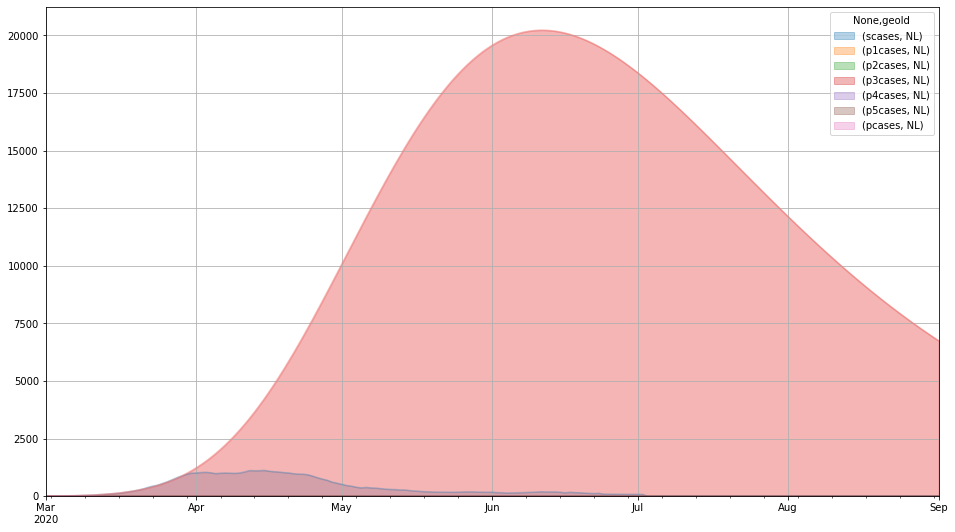

In [120]:
df_geo[(p1measure, country)] = gumpdf(df_geo['daynum'], beta, mu) * final
df_geo[(pmeasure, country)] = df_geo[(p1measure, country)] + df_geo[(p2measure, country)] + df_geo[(p3measure, country)] + df_geo[(p4measure, country)] + df_geo[(p5measure, country)]
df_geo[[(smeasure, country), 
        (p1measure, country), 
        (p2measure, country), 
        (p3measure, country), 
        (p4measure, country), 
        (p5measure, country), 
        (pmeasure, country)]].loc['20200301':'20200901'].plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

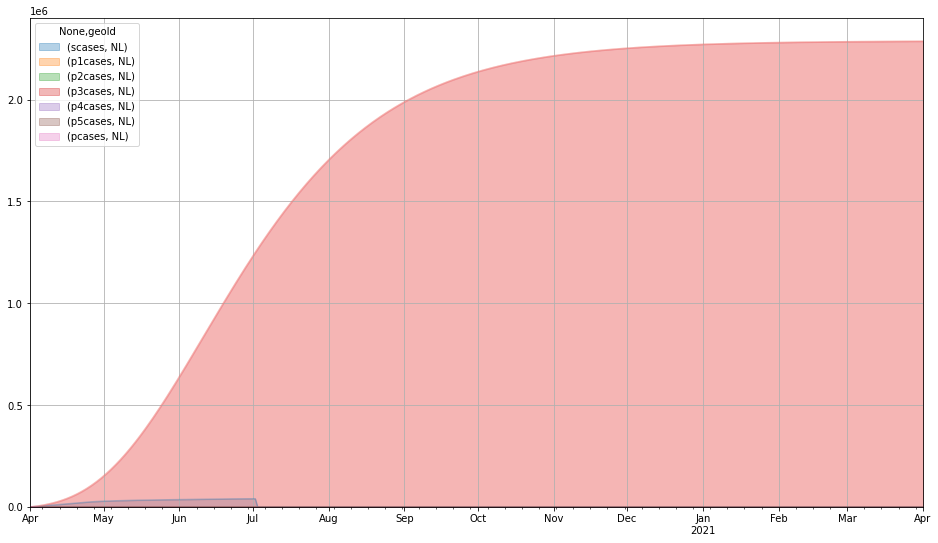

In [121]:
df_geo[[(smeasure, country),
        (p1measure, country),
        (p2measure, country),
        (p3measure, country),
        (p4measure, country),
        (p5measure, country),
        (pmeasure, country)]].loc['20200401':'20210401'].cumsum().plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

We have the estimate for the final number of cases, so the progress would be the current number of cases divided by the final number. This could end up over 100%, if we estimate that the current wave of the outbreak is over and new cases are due to relaxing of measures, increase in testing or other factors.

In [212]:
progress = df_geo[measure][country].sum() / df_geo[pmeasure][country].sum()
print('Currently at {:1.2f}% of {:1.0f}'.format(progress * 100, df_geo[pmeasure][country].sum()))

Currently at 1141.93% of 19937


The peak can be found at the first predicted value that is larger than the next.

In [213]:
peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-03-14


This date should closely match the `mu` of our distribution, in days since the start of the index.

In [214]:
print('Peak by mu at {}'.format(df_geo.loc[df_geo['daynum'] == mu.astype(int)].index[0].date()))

Peak by mu at 2020-03-13


The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [215]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-04-11


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [216]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-02-29


We define the maximum delta as the day in the curve with the sharpest rise.

In [217]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 82 on 2020-03-06


This should match the maximum gradient of the daily data.

In [218]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pmeasure, country)]).max()))

Maximum gradient is 82


Back to the original curve, showing the number of infected concurrently.

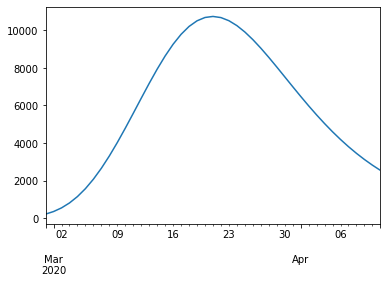

In [219]:
df_geo[pmeasure][country].rolling(14).sum().loc[start:floor].plot()

The top of this curve gives the maximum number of people that are infected at the same time.

In [220]:
print('Maximum infected is {:1.0f}'.format(df_geo[pmeasure][country].rolling(14).sum().max()))

Maximum infected is 10742


If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

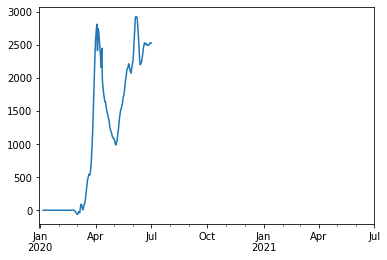

In [221]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).loc[:].plot()

Keep exploring! Stay home, wash your hands, keep your distance.